# Statistics - Inference

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display Ï°∞Ï†ï
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning Ï†úÍ±∞
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import random
import itertools
import numpy as np
import pandas as pd

import pingouin as pg
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_diabetes

## Inference Basics

### (1) Sampling

#### Bootstrap
- Î™®ÏßëÎã®ÏúºÎ°úÎ∂ÄÌÑ∞ ÏñªÏùÄ Î≥µÏõêÏ∂îÏ∂ú ÌëúÎ≥∏

In [5]:
loans_income = pd.read_csv("./Practical_Statictics/data/loans_income.csv").squeeze('columns')

In [6]:
from sklearn.utils import resample

In [7]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -82.9539999999979
std. error: 223.33125897472502


#### Random sampling

In [8]:
fish_5 = np.array([2, 3, 4, 5, 6])
fish_5

array([2, 3, 4, 5, 6])

In [9]:
### Sampling
print(np.random.choice(fish_5, size=1, replace=False))
print(np.random.choice(fish_5, size=3, replace=False))

[3]
[5 6 3]


In [10]:
### Random.seed
# sample Í≥†Ï†ï
np.random.seed(1)
print(np.random.choice(fish_5, size=3, replace=False))
print(np.random.choice(fish_5, size=3, replace=False))

[4 3 6]
[2 4 6]


In [11]:
### Sample mean
np.mean(np.random.choice(fish_5, size=3, replace=False))

4.0

In [12]:
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'G', 'F', 'G', 'F', 'F', 'C', 'C'],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10]})
df.head()

team position  assists  rebounds
0    A        G        5        11
1    A        G        7         8
2    A        F        7        10
3    A        G        8         6
4    B        F        5         6

In [13]:
### DataFrame sampling
df.sample(3)

team position  assists  rebounds
6    B        C        6         6
3    A        G        8         6
0    A        G        5        11

In [14]:
df.sample(frac=0.2) # ÎπÑÏú® ÏßÄÏ†ï

team position  assists  rebounds
1    A        G        7         8
7    B        C        9        10

In [15]:
df.sample(2, axis=1) # column sampling

rebounds team
0        11    A
1         8    A
2        10    A
3         6    A
4         6    B
5         9    B
6         6    B
7        10    B

#### Systemetic sampling
- Ï≤´ Î≤àÏß∏ ÏöîÏÜåÎäî Î¨¥ÏûëÏúÑÎ°ú ÏÑ†Ï†ïÌïú ÌõÑ Î™©Î°ùÏùò Îß§Î≤à kÎ≤àÏß∏ ÏöîÏÜåÎ•º ÌëúÎ≥∏ÏúºÎ°ú ÏÑ†Ï†ïÌïòÎäî ÌëúÏßëÎ∞©Î≤ï
- Î™®ÏßëÎã®Ïùò ÌÅ¨Í∏∞Î•º ÏõêÌïòÎäî ÌëúÎ≥∏Ïùò ÌÅ¨Í∏∞Î°ú ÎÇòÎàÑÏñ¥ ÌëúÏßëÍ∞ÑÍ≤© k Í≥ÑÏÇ∞

In [16]:
n = 3 # sample Ïàò
N = len(df) # Î™®ÏßëÎã® Îç∞Ïù¥ÌÑ∞ Ïàò
K = N//n # Íµ¨Í∞Ñ ÎÇ¥ ÏÉòÌîå Ïàò

idx = df[:K].sample(1).index # first sample
sys_df = pd.DataFrame()
while len(sys_df) < n:
    sys_df = sys_df.append(df.loc[idx, :])
    idx += K
sys_df

team position  assists  rebounds
1    A        G        7         8
3    A        G        8         6
5    B        F        7         9

#### Stratified sampling
- Î™®ÏßëÎã®ÏùÑ Ï§ëÎ≥µÎêòÏßÄ ÏïäÎäî Ï∏µÏúºÎ°ú ÎÇòÎàà Îã§Ïùå Í∞Å Ï∏µÏóêÏÑú ÌëúÎ≥∏ Ï∂îÏ∂ú
    - ÎπÑÎ°ÄÏ∏µÌôîÏ∂îÏ∂ú: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®ÎåÄÎ°ú Ï∂îÏ∂ú
    - Î∂àÎπÑÎ°ÄÏ∏µÌôîÏ∂îÏ∂ú: ÏûÑÏùòÎ°ú Ï†ïÌïú ÌäπÏ†ï ÎπÑÏú®ÎåÄÎ°ú Ï∂îÏ∂ú

##### Proportional

In [17]:
df.groupby('team', group_keys=False).apply(lambda x: x.sample(2))

team position  assists  rebounds
0    A        G        5        11
2    A        F        7        10
5    B        F        7         9
4    B        F        5         6

In [18]:
# define total sample size desired
N = 4

# perform stratified random sampling
df.groupby('team', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

team position  assists  rebounds
0    B        C        6         6
1    A        G        5        11
2    B        F        5         6
3    A        G        8         6

In [19]:
stratum = 'team' # Ï∏µ Í∏∞Ï§Ä Ïª¨Îüº
n = 4 # sampling Í∞úÏàò
prop_val = df[stratum].value_counts()/df[stratum].value_counts().sum() * n

result = pd.DataFrame()
for level in df[stratum].unique():
    tmp_df = df[df[stratum]==level].sample(int(prop_val[level]))
    result = pd.concat([result, tmp_df])
result

team position  assists  rebounds
2    A        F        7        10
3    A        G        8         6
7    B        C        9        10
6    B        C        6         6

##### Non-Proportional

In [20]:
stratum = 'team' # Ï∏µ Í∏∞Ï§Ä Ïª¨Îüº
n = 5 # sampling Í∞úÏàò
prop = {'A': 0.6, 'B': 0.4} # Ï∏µ ÎπÑÏú®

result = pd.DataFrame()
for level in list(prop.keys()):
    tmp_df = df[df[stratum]==level].sample(int(prop[level]*n))
    result = pd.concat([result, tmp_df])
result

team position  assists  rebounds
0    A        G        5        11
1    A        G        7         8
2    A        F        7        10
7    B        C        9        10
5    B        F        7         9

#### Cluster sampling
- ÏßëÎã®ÏùÑ ÏùºÏ∞®Ï†ÅÏúºÎ°ú ÌëúÏßëÌïú Îã§Ïùå, ÏÑ†Ï†ïÎêú Í∞Å ÏßëÎã®ÏóêÏÑú Íµ¨ÏÑ±ÏõêÏùÑ ÌëúÎ≥∏ÏúºÎ°ú Ï∂îÏ∂úÌïòÎäî Îã§Îã®Í≥Ñ ÌëúÏßëÎ∞©Î≤ï

In [21]:
#create DataFrame
df = pd.DataFrame({'tour': np.repeat(np.arange(1,11), 20),
                   'experience': np.random.normal(loc=7, scale=1, size=200)})

# view first six rows of DataFrame
df.head()

tour  experience
0     1    7.533811
1     1    6.908027
2     1    8.913820
3     1    7.330797
4     1    8.141943

In [22]:
# randomly choose 4 tour groups out of the 10
clusters = np.random.choice(np.arange(1,11), size=4, replace=False)

# define sample as all members who belong to one of the 4 tour groups
cluster_sample = df[df['tour'].isin(clusters)]

# view first six rows of sample
cluster_sample.head()

tour  experience
20     2    7.275718
21     2    5.909325
22     2    6.390015
23     2    7.306412
24     2    8.691826

In [23]:
cluster_sample['tour'].value_counts()

10    20
6     20
3     20
2     20
Name: tour, dtype: int64

### (2) Sampling distribution

In [24]:
# Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅ
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([4.07260686, 4.92976198, 4.25742598, 5.07305427, 4.11334015,
       5.38990774, 4.30061502, 5.18260454, 2.33586625, 3.63725795])

In [25]:
np.mean(sampling_norm)

4.329244072082277

In [26]:
# ÌèâÍ∑† 4, ÌëúÏ§ÄÌé∏Ï∞® 0.8Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨
population = stats.norm(loc=4, scale=0.8)

In [27]:
# ÌëúÎ≥∏ÌèâÍ∑† Ïó¨Îü¨ Î≤à Í≥ÑÏÇ∞ÌïòÍ∏∞
sample_mean_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [28]:
# SampleÏùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®
print(np.mean(sample_mean_array), np.std(sample_mean_array, ddof=1))

4.004202422791747 0.2513580850860402


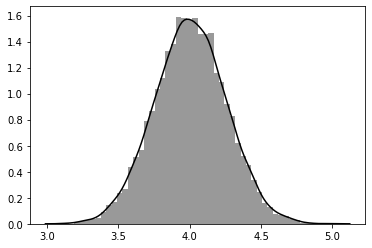

In [29]:
sns.distplot(sample_mean_array, color='black', kde=True)
plt.show()

In [30]:
### Sample sizeÏóê Îî∞Î•∏ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Ïùò Î≥ÄÌôî
size_array = np.arange(start=10, stop=100100, step=100)
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

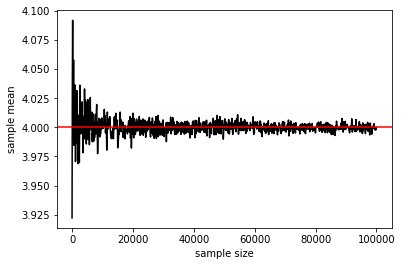

In [31]:
sns.lineplot(x=size_array, y=sample_mean_array_size, color='black')
plt.axhline(4, color='red')
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.show()

In [32]:
# ÌëúÎ≥∏ÌèâÍ∑† Í≥ÑÏÇ∞ Ìï®Ïàò
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [33]:
# 10000Í∞ú ÌëúÎ≥∏ÌèâÍ∑†Ïùò ÌèâÍ∑†
np.random.seed(1)
np.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

In [34]:
# Sample sizeÏôÄ ÌëúÎ≥∏ÌèâÍ∑†
np.random.seed(1)

size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})

size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})

size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})


sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

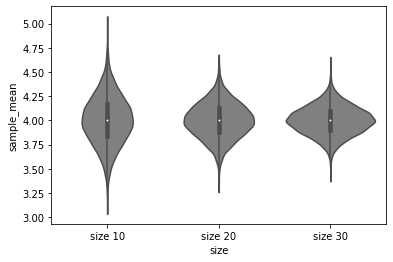

In [35]:
sns.violinplot(x="size", y="sample_mean", data=sim_result, color='gray')
plt.show()

In [36]:
# ÌëúÎ≥∏ÌèâÍ∑†Ïùò ÌëúÏ§ÄÌé∏Ï∞®
size_array = np.arange(start=2, stop=102, step=2)
sample_mean_std_array = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

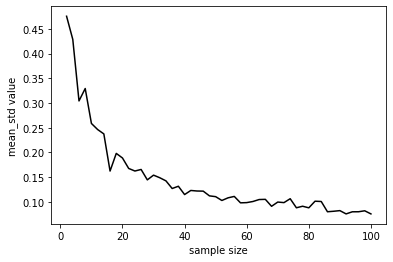

In [37]:
sns.lineplot(x=size_array, y=sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")
plt.show()

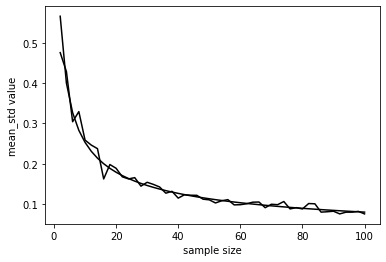

In [38]:
# Standard error
standard_error = 0.8 / np.sqrt(size_array)
sns.lineplot(x=size_array, y=sample_mean_std_array, color='black')
sns.lineplot(x=size_array, y=standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")
plt.show()

In [39]:
# ÌëúÎ≥∏Î∂ÑÏÇ∞Ïùò ÌèâÍ∑† (Unbiased variance)
sample_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=1)
    
np.mean(sample_var_array)

0.6385429863702334

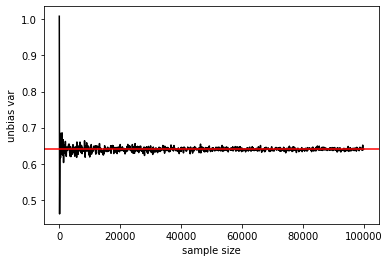

In [40]:
# ÌëúÎ≥∏Î∂ÑÏÇ∞Í≥º Î™®Î∂ÑÏÇ∞Ïùò Í¥ÄÍ≥Ñ
size_array =  np.arange(start=10, stop=100100, step=100)
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)
    
sns.lineplot(x=size_array, y=unbias_var_array_size, color='black')
plt.axhline(0.8**2, color='red')
plt.xlabel("sample size")
plt.ylabel("unbias var")
plt.show()

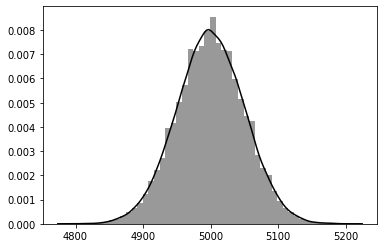

In [41]:
### Central Limit Theorem
# nÏù¥ Ï∂©Î∂ÑÌûà ÌÅ¨Î©¥, ÌëúÎ≥∏ÌèâÍ∑†Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Í≤å ÎêúÎã§
n_size = 10000
n_trial = 50000

coin = np.array([0, 1])
count_coin = np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))

sns.distplot(count_coin, color='black', kde=True)
plt.show()

In [42]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

income  type
43759  26000.0  Data
46518  63000.0  Data
4776   20800.0  Data
28700  70000.0  Data
16657  85000.0  Data

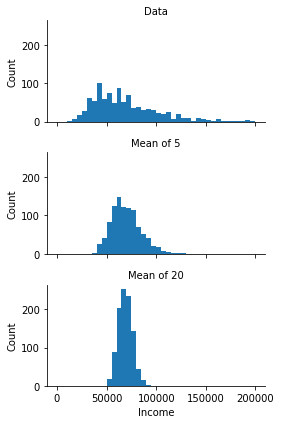

In [43]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## Estimation
- Point estimation
- Interval estimation

In [44]:
fish = pd.read_csv("./stats_for_python/3-7-1-fish_length.csv")["length"]

### (1) Point estimation
- ÌëúÎ≥∏ÏùÑ ÌÜµÌï¥ ÏñªÏùÄ Í∞íÏúºÎ°ú Î™®ÏßëÎã® Í∞íÏùÑ Ï∂îÏ†ï

In [45]:
# mean
mu = np.mean(fish)
mu

4.187039324504525

In [46]:
# variance
sigma_2 = np.var(fish, ddof=1)
sigma_2

0.6803017080832623

### (2) Interval estimation

#### Mean - One Sample

In [47]:
### Ï†ïÍ∑úÎ∂ÑÌè¨Î°ú Íµ¨Í∞ÑÏ∂îÏ†ï: Î™®ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÏïåÎ†§ÏßÑ Í≤ΩÏö∞
# ÌëúÎ≥∏ Í∞úÏàòÍ∞Ä ÏûëÏùÄ Í≤ΩÏö∞ Î™®ÏßëÎã®ÏùÄ Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï ÌïÑÏöî
data = np.random.randint(10, 30, 50)

# create 95% confidence interval for population mean
# sem: standard error of the mean
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

(17.621531444065983, 20.338468555934018)

In [48]:
### TÎ∂ÑÌè¨Î°ú Íµ¨Í∞ÑÏ∂îÏ†ï: Î™®ÌëúÏ§ÄÌé∏Ï∞®Î•º Î™®Î•¥Îäî Í≤ΩÏö∞
df = len(fish) - 1 # Degree of Freedom: n - 1
sigma = np.std(fish, ddof=1)
se = sigma / np.sqrt(len(fish))

# Ïã†Î¢∞Í≥ÑÏàò(alpha), df, ÌëúÎ≥∏ÌèâÍ∑†, ÌëúÏ§ÄÏò§Ï∞®
stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)

(3.5970100568358268, 4.777068592173223)

In [49]:
### ÌëúÎ≥∏ Í∞úÏàòÍ∞Ä Ï†ÅÍ≥†, Î™®ÏßëÎã®Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãå Í≤ΩÏö∞
### Non-parametric: Wilcoxon Signed Rank test's CI
walsh_arrange = list()
for i in range(len(fish)):
    for j in range(len(fish)):
        if i > j:
            continue
        walsh_arrange.append(np.mean([fish[i], fish[j]]))
walsh_arrange = pd.Series(sorted(walsh_arrange))

walsh_arrange.quantile([0.025]).values[0], walsh_arrange.quantile([0.975]).values[0]

(3.436159685730456, 5.486540311835267)

In [50]:
### ÌëúÎ≥∏ÌëúÏ§ÄÌé∏Ï∞®, Ïã†Î¢∞ÎèÑ, ÏÉòÌîå Í∞úÏàòÏóê Îî∞Î•∏ Íµ¨Í∞ÑÏùò Í∏∏Ïù¥ ÎπÑÍµê
# ÌëúÎ≥∏ÌëúÏ§ÄÌé∏Ï∞® * 10
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se2)

(-1.713253352182459, 10.087332001191509)

In [51]:
# ÏÉòÌîå Í∞úÏàò
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

(4.023380308277441, 4.350698340731609)

In [52]:
# Ïã†Î¢∞ÎèÑ
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)

(3.339397914941399, 5.034680734067651)

In [53]:
### Interval estimation Ìï¥ÏÑù
# Ïó¨Îü¨ Î≤à Ï∂îÏ†ï ÏàòÌñâ Ïãú, Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ Î™®ÌèâÍ∑†ÏùÑ Ìè¨Ìï®ÌïòÎäî ÎπÑÏú®
be_included_array = np.zeros(20000, dtype = "bool")

np.random.seed(1)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std / np.sqrt(len(sample))
    interval = stats.t.interval(0.05, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True
        
sum(be_included_array) / len(be_included_array)

0.0501

In [54]:
### Bootstraping for CI
def bootstrap(data, n=1000, func=np.mean, p=0.95):
    sample_size = len(data)
    simulations = [func(np.random.choice(data, size=sample_size, replace=True)) for i in range(n)]
    simulations.sort()
    u_pval = (1+p)/2.
    l_pval = (1-u_pval)
    l_indx = int(np.floor(n*l_pval))
    u_indx = int(np.floor(n*u_pval))
    return (simulations[l_indx], simulations[u_indx])

x = np.array([0.02288081, 0.44170839, 0.10549733, 0.17515196, 0.09449279, 0.07110412, 0.00893079, 0.23485109, 0.14533192, 0.05449631])

# for median, 95% confidence interval, do 
bootstrap(x, 1000, np.median, 0.95)

(0.040017455, 0.190091505)

#### Mean - Two Sample

In [55]:
### ÎèÖÎ¶ΩÏ†ÅÏù∏ Îëê Í∞ú ÏßëÎã®Ïùò Ï∞®Ïù¥ Íµ¨Í∞ÑÏ∂îÏ†ï
# ÌëúÎ≥∏Ïù¥ ÌÅ∞ Í≤ΩÏö∞
data_1 = np.random.randint(10, 30, 50)
data_2 = np.random.randint(15, 30, 50)

stats.norm.interval(alpha=0.95, loc=np.mean(data_1 - data_2), scale=np.var(data_1)/len(data_1) + np.var(data_2)/len(data_2))

(-6.541986667372099, -2.6180133326279007)

In [56]:
### ÌëúÎ≥∏ Í∞úÏàòÍ∞Ä ÏûëÏùÄ Í≤ΩÏö∞
# Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ïÏù¥ ÌïÑÏàò. Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ïÏù¥ ÏóÜÏúºÎ©¥ ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ï ÏÇ¨Ïö©
data_1 = np.random.normal(10, 5, 15)
data_2 = np.random.normal(15, 5, 10)

n_1 = len(data_1)
n_2 = len(data_2)
s_pooled = ((n_1 - 1)*np.var(data_1) + (n_2 - 1)*np.var(data_2)) / (n_1 + n_2 - 2)
mean_diff = np.mean(data_1) - np.mean(data_2)
stats.t.interval(alpha=0.95, df=n_1 + n_2 - 2, loc=mean_diff, scale=np.sqrt(s_pooled)*np.sqrt((1/n_1) + (1/n_2))) # Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÄ Í≤ΩÏö∞
### mean_diff - stats.t.ppf(0.975, df=n_1 + n_2 -2)* np.sqrt(s_pooled)* np.sqrt((1/n_1) + (1/n_2)),
### mean_diff + stats.t.ppf(0.975, df=n_1 + n_2 -2)* np.sqrt(s_pooled)* np.sqrt((1/n_1) + (1/n_2))

(-8.793053457082337, -0.18530532185756687)

In [57]:
### Non-parametric: Mann-whitney test's CI
ct1 = len(data_1)  # items in dataset 1
ct2 = len(data_2)  # items in dataset 2
alpha = 0.05       #95% confidence interval
N = stats.norm.ppf(1 - alpha/2) # percent point function - inverse of cdf

# The confidence interval for the difference between the two population
# medians is derived through these nxm differences.
diffs = sorted([i-j for i in data_1 for j in data_2])

# For an approximate 100(1-a)% confidence interval first calculate K:
k = int(round(ct1*ct2/2 - (N * (ct1*ct2*(ct1+ct2+1)/12)**0.5)))

# The Kth smallest to the Kth largest of the n x m differences 
# ct1 and ct2 should be > ~20
ci = (diffs[k], diffs[len(diffs)-k])
ci

(-8.983909725228083, -0.24407534755221327)

In [58]:
# df = min([n_1, n_2]) Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ÎèÑ Ìï®
df = ((np.var(data_1)/n_1) + (np.var(data_2)/n_2))**2 / (((np.var(data_1)/n_1)**2/(n_1 - 1)) + ((np.var(data_2)/n_2)**2/(n_1 - 1))) 
stats.t.interval(alpha=0.95, df=df, loc=mean_diff, scale=np.sqrt((np.var(data_1)/n_1) + (np.var(data_2)/n_2))) # Î∂ÑÏÇ∞Ïù¥ Îã§Î•∏ Í≤ΩÏö∞ÏóêÎäî Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ Ï°∞Í∏à Îçî ÎÑìÏñ¥Ïßê

(-8.656034979194843, -0.3223237997450594)

#### Propotion - One Sample

In [59]:
### ÌëúÎ≥∏ÎπÑÏú® Íµ¨Í∞ÑÏ∂îÏ†ï
# p-hat = x-bar/n
# ÌëúÏ§ÄÏò§Ï∞®: sqrt(p(1-p)/n) -> pÎ•º p-hatÏúºÎ°ú ÎåÄÏ≤¥ÌïòÏó¨ ÏÇ¨Ïö©
# X ~ B(n, p)Ïù¥ÎØÄÎ°ú, Z = (X - np)/sqrt(np(1-p)) ~ N(0, 1)

p_hat = 41/500
se = np.sqrt((p_hat*(1 - p_hat))/500)
stats.norm.interval(alpha=0.95, loc=p_hat, scale=se)

(0.05795131379112069, 0.10604868620887932)

In [60]:
from statsmodels.stats.proportion import proportion_confint

In [61]:
proportion_confint(41, 500, alpha=0.05, method='normal') # ÎèôÏùºÌïú Í≤∞Í≥º

(0.05795131379112069, 0.10604868620887932)

#### Propotion - Two Sample

In [62]:
### Îëê Í∞ú ÏßëÎã®Ïùò ÎπÑÏú® Ï∞®Ïù¥ Íµ¨Í∞ÑÏ∂îÏ†ï
# Z = (p-hat_1 - p-hat_2)/sqrt(((p_1*(1-p_1))/n_1) + ((p_2*(1-p_2))/n_2)) ~ N(0, 1)
p_1 = 0.6
p_2 = 0.5
n_1 = 10
n_2 = 12

se = np.sqrt(((p_1*(1 - p_1))/n_1) + ((p_2*(1 - p_2))/n_2))
stats.norm.interval(alpha=0.95, loc=np.mean(p_1 - p_2), scale=se)

(-0.3150004864990562, 0.5150004864990562)

#### Variance & Standard Deviation

In [63]:
### Î∂ÑÏÇ∞Í≥º ÌëúÏ§ÄÌé∏Ï∞® Íµ¨Í∞ÑÏ∂îÏ†ï
# Î™®ÏßëÎã®Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï ÌïÑÏàò
# (n-1)(s**2)/sigma**2 ~ chisq(n-1)
# (n-1)(s**2)/chisq(alpha/2)(n-1) < sigma**2 < (n-1)(s**2)/chisq(1-alpha/2)(n-1)
alpha=0.05
n = len(fish)
var = np.var(fish)
interval = ((n - 1) * var)/stats.chi2.ppf(1-(alpha/2), df=n-1), ((n - 1) * var)/stats.chi2.ppf(alpha/2, df=n-1)
interval

(0.28967623922045205, 2.040610747269794)

In [64]:
### Îëê Í∞ú ÏßëÎã®Ïùò Î∂ÑÏÇ∞ÎπÑ Íµ¨Í∞ÑÏ∂îÏ†ï
# Î™®ÏßëÎã®Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï ÌïÑÏàò
alpha=0.05
m = len(data_1)
n = len(data_2)
var1 = np.var(data_1, ddof=1)
var2 = np.var(data_2, ddof=1)

interval = stats.f.ppf(alpha/2, n-1, m-1) * (var1/var2), stats.f.ppf(1-(alpha/2), n-1, m-1) * (var1/var2)
interval

(0.3165371024048256, 3.858197999789888)

#### Correlation

In [65]:
import math

In [66]:
### ÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨Í∞ÑÏ∂îÏ†ï
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

r = pd.DataFrame([data_1, data_2]).T.corr()[0][1]
print(r)
print(r_confidence_interval(r, 0.05, n_1))

0.5144828359271364
(-0.1703134176136683, 0.8641752004452788)


### (3) Estimate sample size
- Ïò§Ï∞®ÌïúÍ≥Ñ: d
- Î™®ÌèâÍ∑† Ï∂îÏ†ïÏùò sample size
    - Z Í≤ÄÏ†ï (Î™®Î∂ÑÏÇ∞ÏùÑ ÏïåÍ≥† ÏûàÍ±∞ÎÇò, ÌëúÎ≥∏Ïù¥ Ï∂©Î∂ÑÌûà ÌÅ∞ Í≤ΩÏö∞): n >= (Z(2/a)*sigma/d)**2
- Î™®ÎπÑÏú® Ï∂îÏ†ïÏùò sample size
    - n >= ((Z(2/a)/d)**2)*p*(1-p)
    - pÎ•º ÏïåÍ≥† ÏûàÍ±∞ÎÇò, Ï∂îÏ†ïÏù¥ Í∞ÄÎä•ÌïòÎã§Î©¥ Ìï¥Îãπ Í∞íÏùÑ Ïì∞Í≥†, Ï∂îÏ†ïÏù¥ Î∂àÍ∞ÄÎä•ÌïòÎã§Î©¥ Í∞ÄÏû• Î≥¥ÏàòÏ†ÅÏúºÎ°ú ÌëúÎ≥∏ Í∞úÏàòÎ•º Ïû°ÏùÑ Ïàò ÏûàÎäî p=0.5 ÏÇ¨Ïö©

In [67]:
### Î™®ÌèâÍ∑† Ï∂îÏ†ï Ïãú ÌëúÎ≥∏ ÌÅ¨Í∏∞
d = 0.75
sigma = 4
alpha = 0.1

math.ceil((stats.norm.ppf(1-(alpha/2))*sigma/d)**2)

77

In [68]:
### Î™®ÎπÑÏú® Ï∂îÏ†ï Ïãú ÌëúÎ≥∏ ÌÅ¨Í∏∞
d = 0.05
alpha = 0.02
p = 0.5 # ÏµúÎåÄ ÌëúÎ≥∏ p

math.ceil(p*(1-p)*(stats.norm.ppf(1-(alpha/2))/d)**2)

542

## Testing
- Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶Ω(Ïó∞Íµ¨)Í∞ÄÏÑ§
- Critical Value, P-value
- Ïú†ÏùòÏàòÏ§Ä (alpha)
- Îã®Ï∏°Í≤ÄÏ†ï/ÏñëÏ∏°Í≤ÄÏ†ï
    - alternative: less, greater(larger) / two-sided
- Ï†ú 1Ï¢Ö Ïò§Î•òÏôÄ Ï†ú 2Ï¢Ö Ïò§Î•ò: 1Ï¢Ö Ïò§Î•òÎ•º Ï£ºÎ°ú Ïª®Ìä∏Î°§
- Power = 1 - beta = 1 - Ï†ú 2Ï¢Ö Ïò§Î•ò
    - Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï¥Ïïº ÌïòÎäî ÏÉÅÌô©Ïùº Îïå, Ïã§Ï†úÎ°ú Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÎäî ÎπÑÏú®
    - Í∞ôÏùÄ alpha ÏàòÏ§ÄÏóêÏÑú, Í≤ÄÏ†ïÏùò Ï†ïÌôïÏÑ± Ï†ïÎèÑ
- Ïã†Î¢∞Íµ¨Í∞ÑÍ≥º ÏñëÏ∏°Í≤ÄÏ†ï
    - Ïã†Î¢∞Íµ¨Í∞Ñ ÏïàÏóê Í≤ÄÏ†ïÌï† Î™®ÏàòÍ∞Ä Îì§Ïñ¥Í∞ÄÎ©¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞ÅÌïòÏßÄ ÏïäÏùå

- Parametric
    - Î™®Ïàò Î∂ÑÌè¨Ïùò Î™®ÏñëÏùÑ Í∞ÄÏ†ï(Ï£ºÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨)ÌïòÍ≥†, Î™®Ïàò Î∂ÑÌè¨Ïùò ÌôïÎ•†Í∞íÏùÑ Ïù¥Ïö©ÌïòÎäî Í≤ÄÏ†ï
- Non-parametric
    - Î™®ÏàòÏùò ÌòïÌÉúÎ•º Í∞ÄÏ†ïÌïòÏßÄ ÏïäÎäî ÌÜµÍ≥ÑÎ°ú, ÏïΩÍ∞ÑÏùò Í≤ÄÏ†ïÎ†• ÏÜêÌï¥Í∞Ä ÏûàÏùå
    - ÏÇ¨Ïö© Î≤îÏúÑ
        - Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞
        - Í∑πÎã®Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞
        - Î™®Ïàò Í≤ÄÏ†ïÏùò Í∞ÄÏ†ïÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞

## Pre-test Analysis
- ÌÜµÍ≥ÑÎ∂ÑÏÑù Ï†Ñ ÏÇ¨Ï†Ñ ÏàòÌñâÌï¥Ïïº ÌïòÎäî test
- Ï†ïÍ∑úÏÑ± ÌôïÏù∏, Îì±Î∂ÑÏÇ∞ÏÑ± ÌôïÏù∏ Îì±
- Î™®Ïàò Í≤ÄÏ†ï/ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏùÑ ÎÇòÎàÑÎäî Í∏∞Ï§ÄÏù¥ Îê®

### (1) Normality

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.<br>

In [69]:
cats = pd.read_csv('./ADP_book_ver01/data/cats.csv')

In [70]:
cats.head()

Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3

#### Shapiro-wilk Test
- 2000Í∞ú Ïù¥ÌïòÏùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï£ºÎ°ú ÏÇ¨Ïö©
- nÏù¥ Îß§Ïö∞ ÏûëÏùÄ Í≤ΩÏö∞ Ï†ïÍ∑úÏÑ±ÏúºÎ°ú ÌåêÎã®ÌïòÎäî Í≤ΩÌñ•Ïù¥ Í∞ïÌïòÎØÄÎ°ú Ï£ºÏùò ÌïÑÏöî

In [71]:
stats.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518789649009705, pvalue=6.730626046191901e-05)

#### Kolmogorov-smirnov (K-S) Test
- 2000Í∞ú Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï£ºÎ°ú ÏÇ¨Ïö©
- Îëê ÏßëÎã®Ïùò Î∂ÑÌè¨ (ÎàÑÏ†ÅÌôïÎ•†) ÎπÑÍµê. Îç∞Ïù¥ÌÑ∞ÏôÄ Normal distribution Ï†úÏãú

In [72]:
stats.kstest(cats['Bwt'], stats.norm.cdf)

KstestResult(statistic=0.9772498680518208, pvalue=5.089961007561737e-237)

#### Anderson-darling Test
- K-S testÏùò Í∞úÏÑ†: Î∂ÑÌè¨Ïùò Íº¨Î¶¨ Î∂ÄÎ∂ÑÏóê Í∞ÄÏ§ëÏπò Î∂ÄÏó¨
- Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞ (5000Í∞ú Ïù¥ÏÉÅ?)

In [73]:
stats.anderson(cats['Bwt'], dist='norm')

AndersonResult(statistic=1.9228438994888393, critical_values=array([0.561, 0.639, 0.767, 0.894, 1.064]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Jarque-Bera Test
- Î∂ÑÌè¨Ïùò ÏôúÎèÑÏôÄ Ï≤®ÎèÑÍ∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌäπÏÑ±ÏùÑ Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏
- ÏôúÎèÑÎ•º ÏÇ¨Ïö©ÌïòÎØÄÎ°ú Ïù¥ÏÉÅÏπòÏóê ÎØºÍ∞êÌï®
- ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ïÏóê Ï£ºÎ°ú ÏÇ¨Ïö©

In [74]:
stats.jarque_bera(cats['Bwt'])

Jarque_beraResult(statistic=8.25725765348072, pvalue=0.01610494636172033)

[Í≤∞Í≥ºÌï¥ÏÑù] <br>
Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎØÄÎ°ú 'Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§'Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§. Ï¶â, cats Îç∞Ïù¥Ïù¥ÌÑ∞Ïùò Bwt Î≥ÄÏàòÎäî Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

#### Empirical Methods
- Î∂ÑÌè¨Î•º ÏãúÍ∞ÅÌôîÌïòÍ±∞ÎÇò, Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌäπÏÑ±(ÏôúÎèÑ, Ï≤®ÎèÑ) Í∞íÏúºÎ°ú ÌåêÎã®

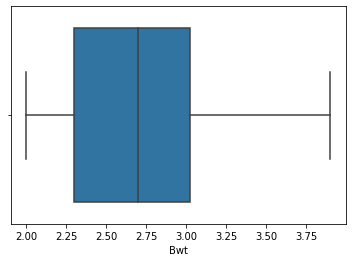

In [75]:
### Boxplot
sns.boxplot(x=cats.Bwt)
plt.show()

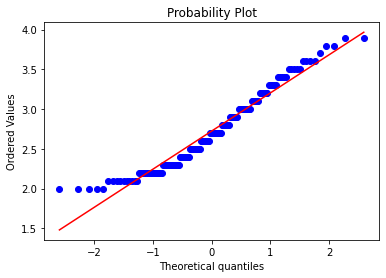

In [76]:
### Q-Q plot
stats.probplot(cats.Bwt, dist="norm", plot=plt)
plt.show()

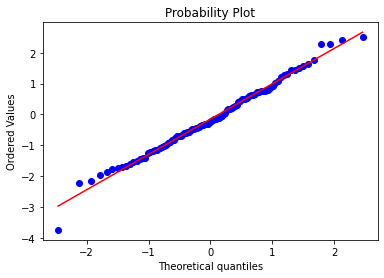

In [77]:
stats.probplot(stats.norm.rvs(size=100), plot=plt)
plt.show()

In [78]:
### Skewness, Kurtosis
# NormalÏùò ÏôúÎèÑ, Ï≤®ÎèÑÎäî 0, 3
cats.Bwt.skew()

0.47862437175650524

In [79]:
cats.Bwt.kurtosis()

-0.6738392606733399

### (2) Equal variance

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
ÏßëÎã® Í∞Ñ Î∂ÑÏÇ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
ÏßëÎã® Í∞Ñ Î∂ÑÏÇ∞ Ï∞®Ïù¥Í∞Ä ÏûàÎã§.<br>

In [80]:
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']

#### Levene test
- Î™®ÏßëÎã®Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãå Í≤ΩÏö∞ÏóêÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå
- ÏßëÎã® ÎÇ¥ Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä Îã¨ÎùºÎèÑ Í∞ÄÎä•
- median Ï≤ôÎèÑÍ∞Ä default -> Brown-Forsythe test

In [81]:
stats.levene(female, male, center='mean')

LeveneResult(statistic=17.20136858946354, pvalue=5.759437452845422e-05)

In [82]:
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

#### Fligner test
- Î™®ÏßëÎã®Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãå Í≤ΩÏö∞ÏóêÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå. (Levene Î≥¥Îã§ Îçî Robust test)

In [83]:
stats.fligner(female, male, center='mean')

FlignerResult(statistic=16.30243520453388, pvalue=5.399451767224576e-05)

In [84]:
stats.fligner(female, male)

FlignerResult(statistic=16.909233669160688, pvalue=3.9210381249178575e-05)

#### Bartlett test
- Ï†ïÍ∑úÏÑ± ÌïÑÏöî. Î™®ÏßëÎã®Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Ïù∏ Í≤ΩÏö∞ Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏùå
- ÏßëÎã® ÎÇ¥ Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä Îã¨ÎùºÎèÑ Í∞ÄÎä•

In [85]:
stats.bartlett(female, male)

BartlettResult(statistic=15.074702450407873, pvalue=0.00010333894088535889)

#### F-test
- Îëê ÏßëÎã® Î∂ÑÏÇ∞Ïùò ÎπÑÏú® Í≤ÄÏ†ï
- Ï†ïÍ∑úÏÑ± ÌïÑÏöî
- Two sample test ÌååÌä∏ Ï∞∏Ï°∞

## Sample tests
- Ìïú Í∞ú, ÎòêÎäî Îëê Í∞ú ÏßëÎã® ÎπÑÍµê

### (1) One sample test
- Ïó∞ÏÜçÌòïÏù∏ Ìïú Í∞ú ÏßëÎã® Í≤ÄÏ†ï
- T-testÎäî Î™®ÏßëÎã®Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ïÏù¥ ÌïÑÏöîÌïòÎ©∞, Ï†ïÍ∑úÏÑ±Ïù¥ Íπ®ÏßÄÎ©¥ ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ï ÏãúÌñâ

#### Binomial probability test
- ÌôïÎ•† ÏãúÌñâÏùò Í≤∞Í≥ºÍ∞Ä Ïú†ÏùòÌïúÏßÄ ÌôïÏù∏

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0)<br>
ÏÇ¨Í±¥Ïùò ÌôïÎ•†ÏùÄ pÏù¥Îã§<br><br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
ÏÇ¨Í±¥Ïùò ÌôïÎ•†ÏùÄ pÍ∞Ä ÏïÑÎãàÎã§<br>

In [86]:
stats.binomtest(k=1, n=10, p=0.5, alternative='two-sided') # ÏÑ±Í≥µÌöüÏàò, ÏãúÌñâÌöüÏàò, ÏÑ±Í≥µÌôïÎ•†

BinomTestResult(k=1, n=10, alternative='two-sided', proportion_estimate=0.1, pvalue=0.021484375)

#### Mean test
- Z-test: Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌûà ÌÅ¨Í±∞ÎÇò Î™®Î∂ÑÏÇ∞ÏùÑ ÏïåÍ≥† ÏûàÎäî Í≤ΩÏö∞
- T-test, Wilcoxon signed rank test (Sign test)

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
ÏßëÎã®Ïùò Ï§ëÏã¨ Ï≤ôÎèÑ(ÌèâÍ∑†, Ï§ëÏïôÍ∞í)Îäî xÏù¥Îã§<br><br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
ÏßëÎã®Ïùò Ï§ëÏã¨ Ï≤ôÎèÑ(ÌèâÍ∑†, Ï§ëÏïôÍ∞í)Îäî xÍ∞Ä ÏïÑÎãàÎã§<br>

In [87]:
cats.head()

Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3

Bwt Ïª¨ÎüºÏùÄ Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤åÎ•º ÏùòÎØ∏ÌïòÍ≥†, HwtÎäî Í≥†ÏñëÏù¥Ïùò Í∏∏Ïù¥Î•º ÏùòÎØ∏ÌïúÎã§. 
catsÏùò Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÎ≥¥Î•º infoÎ°ú ÌôïÏù∏Ìï¥Ï§ÄÎã§. 

In [88]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


shapiro testÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÍ∑úÏÑ±ÏùÑ Í≤ÄÏ†ïÌïúÎã§. Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤åÎ•º Í≤ÄÏ†ïÌïòÎØÄÎ°ú Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤åÎßå Ï∂îÏ∂úÌïòÏó¨ shapiro testÎ•º ÏßÑÌñâÌï¥Ïïº ÌïúÎã§.

In [89]:
mu = 2.6
stats.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518789649009705, pvalue=6.730626046191901e-05)

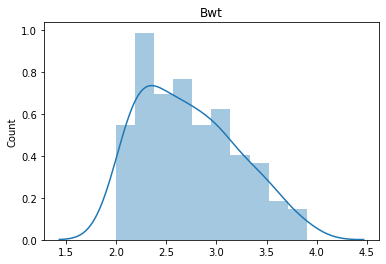

In [90]:
sns.distplot(cats.Bwt.values, bins=10)
plt.title('Bwt')
plt.ylabel('Count')
plt.show()

Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÏúºÎØÄÎ°ú wilcox testÎ•º ÏßÑÌñâÌïúÎã§. 

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
Í≥†ÏñëÏù¥Ïùò ÌèâÍ∑† Î™∏Î¨¥Í≤åÎäî 2.6kgÏù¥Îã§. -> Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤å - 2.6kgÏùò ÌèâÍ∑†ÏùÄ 0Ïù¥Îã§.<br><br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Í≥†ÏñëÏù¥Ïùò ÌèâÍ∑† Î™∏Î¨¥Í≤åÎäî 2.6kgÏù¥ ÏïÑÎãàÎã§ <br>

##### Wilcoxon signed rank test

In [91]:
# ÌèâÍ∑†ÏùÑ ÎπºÏ£ºÎäî Ïù¥Ïú†Îäî, signed rank testÍ∞Ä ÏõêÎûò paired sampleÏö©ÏûÑ.
# sign testÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

H0 Í∏∞Í∞Å. Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóêÏÑú Í≥†ÏñëÏù¥Ïùò ÌèâÍ∑† Î™∏Î¨¥Í≤åÎäî 2.6kgÏù¥ÎùºÍ≥† Ìï† Ïàò ÏóÜÎã§.

##### Z-test

In [92]:
statsmodels.stats.weightstats.ztest(cats['Bwt'], x2=None, value=mu, alternative='two-sided')

(3.0564867998078107, 0.002239473410335702)

##### T-test

In [93]:
stats.ttest_1samp(cats.Bwt, popmean=mu)

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

#### Proportion test
- Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú ÏßëÎã®Ïùò ÎπÑÏú® Í≤ÄÏ†ï

H0: p = p0 (population proportion is equal to hypothesized proportion p0)

H1 (two-tailed): p ‚â† p0 (two-tailed population proportion is not equal to some hypothesized value p0) <br>
H1 (left-tailed): p < p0 (left-tailed population proportion is less than some hypothesized value p0) <br>
H1 (right-tailed): p > p0 (right-tailed population proportion is greater than some hypothesized value p0)

In [94]:
# count: ÏÑ±Í≥µ ÌöüÏàò, nobs: Ï†ÑÏ≤¥ ÏãúÌñâ ÌöüÏàò -> ÌëúÎ≥∏ÎπÑÏú® = count/nobs
# value: Í≤ÄÏ†ïÌï† Î™®ÎπÑÏú®
# returns z-stat, p-value
statsmodels.stats.proportion.proportions_ztest(count=70, nobs=100, value=0.86, alternative='smaller') # smaller, larger, two-side

(-3.4914862437758782, 0.0002401705999909348)

#### Variance test
- Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ïÏù¥ ÌïÑÏàò 

In [95]:
def chi_var_test(x, va0, direction="two-tailed"):
    n = len(x)
    chi_stat = (n - 1) * np.var(x) / va0 
    tmp_p = stats.chi2.cdf(chi_stat, df=n-1)
    
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    
    return chi_stat, p

x = np.random.normal(0, 2, 25)
chi_var_test(x, va0=9)

(9.460306723067513, 0.007125400204493919)

In [96]:
### if not normal
# Squared Ranks test for Variances

### (2) Paired sample test
- Îã®Ïùº Î™®ÏßëÎã®Ïùò Ïñ¥Îñ†Ìïú Ï≤òÎ¶¨ Ï†ÑÌõÑÏóê Îî∞Î•∏ Ï§ëÏã¨ Ï≤ôÎèÑ Ï∞®Ïù¥ ÎπÑÍµê
- Paired T-test, Wilcoxon signed rank test

In [97]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌôïÏù∏
data = {'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4], 'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(data)
data

before  after
0       7      8
1       3      4
2       4      5
3       5      6
4       2      2
5       1      3
6       6      6
7       6      8
8       5      6
9       4      5

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
ÏàòÎ©¥Ï†ú Î≥µÏö© Ï†ÑÍ≥º ÌõÑÏùò ÏàòÎ©¥ÏãúÍ∞Ñ Ï∞®Ïù¥Îäî ÏóÜÎã§. (D=0)<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
ÏàòÎ©¥Ï†ú Î≥µÏö© Ï†ÑÍ≥º ÌõÑÏùò ÏàòÎ©¥ÏãúÍ∞Ñ Ï∞®Ïù¥Îäî ÏûàÎã§. <br>


In [98]:
### Normality test
stats.shapiro(data.before)

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352704644203186)

In [99]:
stats.shapiro(data.after)

ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)

Îëê ÏßëÎã® Îã§ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎØÄÎ°ú, Paired T-testÎ•º ÏßÑÌñâÌïúÎã§.

##### Paired T-test

In [100]:
stats.ttest_rel(data['after'], data['before'], alternative='greater') # H1: D > 0

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [101]:
data.mean()

before    4.3
after     5.3
dtype: float64

[Í≤∞Í≥ºÌï¥ÏÑù]
p-valueÍ∞Ä Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎØÄÎ°ú 'ÏàòÎ©¥ÏòÅÏñëÏ†úÎ•º Î≥µÏö©ÌïòÍ∏∞ Ï†ÑÍ≥º ÌõÑÏùò ÌèâÍ∑† ÏàòÎ©¥ÏãúÍ∞ÑÏùò Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎ©∞, ÏòÅÏñëÏ†úÎ•º Î≥µÏö©Ìïú ÌõÑ ÏàòÎ©¥ÏãúÍ∞ÑÏù¥ ÎäòÏóàÎã§'Îäî Í≤∞Î°†ÏùÑ ÎÇº Ïàò ÏûàÎã§. 

##### Wilcoxon Signed Rank test

In [102]:
# Îëê Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥ Î∞∞Ïó¥ÏùÑ inputÏúºÎ°ú Ìï®
# ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏùò p-valueÍ∞Ä ÎÜíÏùå -> Í≤ÄÏ†ïÎ†•Ïù¥ Îñ®Ïñ¥Ïßê
stats.wilcoxon(data['after']-data['before'], alternative='greater')

WilcoxonResult(statistic=36.0, pvalue=0.00414960799764038)

##### Sign test

In [103]:
# Ordinal data
# Îëê ÏßëÎã®Ïùò ÎåÄÏÜå ÎπÑÍµêÌïòÏó¨, Ïù¥Ìï≠Í≤ÄÏ†ï ÎòêÎäî Ï†ïÍ∑úÍ∑ºÏÇ¨ ÌôúÏö©
# Ï§ëÏïôÍ∞íÍ≥ºÏùò ÎåÄÏÜå ÎπÑÍµêÎ°ú Îã®Ïùº ÌëúÎ≥∏ Í≤ÄÏ†ïÎèÑ ÏàòÌñâ Í∞ÄÎä•
# H0: p = 0.5
# n = ÎèôÎ•†Ïù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞ Ïàò
# z = x - np/sqrt(np(1-p)) ~ N(0, 1)

In [104]:
from statsmodels.stats import descriptivestats

In [105]:
stat, p = descriptivestats.sign_test(data['after']-data['before'], mu0=0)
print("single sample sign test p-value", p) # ÏñëÏ∏° Í≤ÄÏ†ïÎßå Í∞ÄÎä•. H1: p != 0.5

single sample sign test p-value 0.0078125


In [106]:
plus = (data['after'] - data['before'] > 0).sum()
minus = (data['after'] - data['before'] < 0).sum()

stats.binomtest(k=plus, n=plus + minus, p=0.5, alternative='two-sided') # ÏúÑ Í≤∞Í≥ºÏôÄ ÎèôÏùº

BinomTestResult(k=8, n=8, alternative='two-sided', proportion_estimate=1.0, pvalue=0.0078125)

In [107]:
stats.binomtest(k=plus, n=plus + minus, p=0.5, alternative='greater') # H1: p > 0.5. + ÌôïÎ•†Ïù¥ 0.5Î≥¥Îã§ ÌÅ∞Í∞Ä? afterÏùò ÏàòÎ©¥ÏãúÍ∞ÑÏù¥ Îçî Í∏∏Ïñ¥ÏßÄÎäîÏßÄ Í≤ÄÏ†ï

BinomTestResult(k=8, n=8, alternative='greater', proportion_estimate=1.0, pvalue=0.00390625)

In [108]:
### Paired proportion -> McNemer testÎ°ú ÏßÑÌñâÌï† Ïàò ÏûàÏùå

### (3) Independent Two-sample test
- Îëê Í∞úÏùò ÎèÖÎ¶ΩÎêú Î™®ÏßëÎã® ÎπÑÍµê
- ÌëúÎ≥∏ ÌÅ¨Í∏∞Í∞Ä Ï∂©Î∂ÑÌïú Í≤ΩÏö∞, Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú test Í∞ÄÎä•
    - X_bar - Y_bar ~ N(mu_1 - mu_2, ((sigma_1)**2/n_1 + (sigma_2)**2/n_2))
- T-test, Wilcoxon Rank sum test / Mann-Whitney U test
- T-testÏùò Í≤ΩÏö∞ ÏßëÎã® Í∞Ñ Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï Î®ºÏ†Ä ÏàòÌñâ -> equal_var ÌååÎùºÎØ∏ÌÑ∞ ÏûÖÎ†•

#### Mean test

In [109]:
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
ÏïîÏª∑ Í≥†ÏñëÏù¥ÏôÄ ÏàòÏª∑ Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤åÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
ÏïîÏª∑ Í≥†ÏñëÏù¥ÏôÄ ÏàòÏª∑ Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤åÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§. <br>

In [110]:
### Normality test
stats.shapiro(female) # not normal

ShapiroResult(statistic=0.8909613490104675, pvalue=0.00037542960490100086)

In [111]:
stats.shapiro(male)

ShapiroResult(statistic=0.9788323640823364, pvalue=0.11896143108606339)

Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÏãúÌÇ§ÏßÄ Î™ªÌïòÎäî ÏßëÎã®Ïù¥ ÏûàÏúºÎØÄÎ°ú, Wilcoxon Rank sum testÎ•º ÏßÑÌñâÌïúÎã§.

##### Wilcoxon Rank Sum test / Mann-Whitney U-test

In [112]:
stats.ranksums(female, male, alternative='two-sided')

RanksumsResult(statistic=-6.484649068728496, pvalue=8.893855174450822e-11)

In [113]:
stats.mannwhitneyu(female, male, alternative='two-sided')

MannwhitneyuResult(statistic=757.5, pvalue=8.200502234321752e-11)

[Í≤∞Í≥ºÌï¥ÏÑù]
p-valueÍ∞Ä Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎØÄÎ°ú 'ÏïîÏª∑ Í≥†ÏñëÏù¥ÏôÄ ÏàòÏª∑ Í≥†ÏñëÏù¥Ïùò Î™∏Î¨¥Í≤åÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§'Îäî Í≤∞Î°†ÏùÑ ÎÇº Ïàò ÏûàÎã§.

In [114]:
print(female.mean())
print(male.mean())

2.3595744680851065
2.8999999999999995


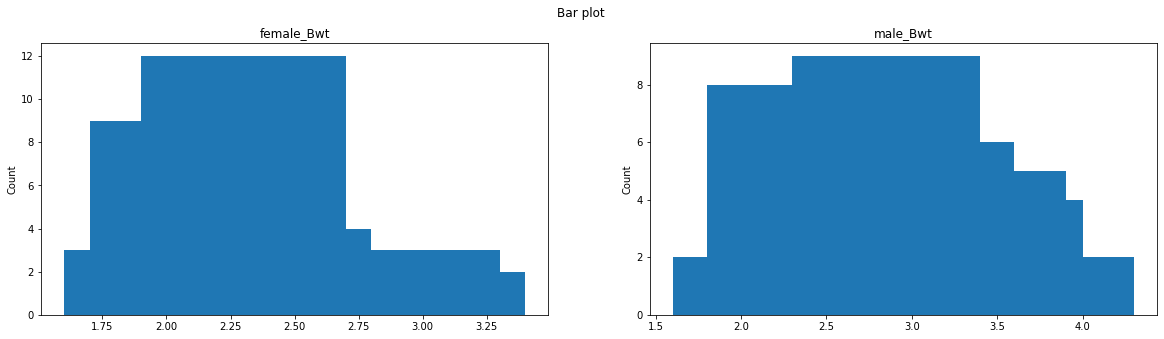

In [115]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)

fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

##### Independent Sample T-test

In [116]:
# Îì±Î∂ÑÏÇ∞ ÎßåÏ°± Ïó¨Î∂ÄÎ•º equal_var ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌëúÌòÑ
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

##### Independent Sample Z-test

In [117]:
# enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 114]
cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

statsmodels.stats.weightstats.ztest(cityA, cityB, value=0, alternative='two-sided')

(-1.9953236073282115, 0.04600759676133208)

#### Proportion test
- Z-statistic

In [118]:
success_cnts = np.array([70, 80])
total_cnts = np.array([100, 120])

test_stat, pval = statsmodels.stats.proportion.proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))

Two sided z-test: z = 0.5285, p value = 0.5971


#### Variance test
- F-test

In [119]:
# Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞ Ï∞®Ïù¥ Í≤ÄÏ†ï. Ï†ïÍ∑úÏÑ±Ïóê ÎØºÍ∞ê
# ÏúÑÏóêÏÑú Ïñ∏Í∏âÎêú Equal Variance Í≤ÄÏ†ï Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ï¢ãÏùå
def f_var_test(x, y, direction="two-tailed"):
    df_1 = len(x)
    df_2 = len(y)
    f_stat = np.var(x, ddof=1) / np.var(y, ddof=1)
    
    tmp_p = stats.f.cdf(f_stat, df_1, df_2)
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    return f_stat, p

f_var_test(male, female)

(2.91119583076607, 9.872708416591713e-05)

## ANalysis Of VAriance
- Îëê Í∞ú Ïù¥ÏÉÅÏùò Îã§Ïàò ÏßëÎã® Í∞Ñ ÌèâÍ∑† ÎπÑÍµê
- Ï¢ÖÏÜçÎ≥ÄÏàòÎäî Ïó∞ÏÜçÌòï, ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî Î≤îÏ£ºÌòï
- Í∞Å ÏßëÎã®Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ïÍ≥º ÏßëÎã® ÎÇ¥ Îì±Î∂ÑÏÇ∞ Í∞ÄÏ†ïÏù¥ ÌïÑÏöîÌïòÎ©∞, Ïù¥ Í∞ÄÏ†ïÏù¥ Íπ®ÏßÄÎ©¥ WelchÏùò Î∞©Î≤ï ÎòêÎäî ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ï ÏãúÌñâ
- ÏÇ¨ÌõÑ Í≤ÄÏ†ï: Ï†ÅÏñ¥ÎèÑ Ìïú ÏßëÎã®ÏóêÏÑú ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏù¥ Ï¶ùÎ™ÖÎêòÏóàÏùÑ Îïå, Ïñ¥Îñ§ ÏßëÎã®ÏóêÏÑú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄÎ•º ÏïåÏïÑÎ≥¥Îäî Î∞©Î≤ï

### (1) One-way
- Ï¢ÖÏÜçÎ≥ÄÏàòÏóê ÎåÄÌïú ÌïòÎÇòÏùò Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏòÅÌñ• ÌååÏïÖ
- Í∞Å ÏßëÎã® Í∞Ñ ÌëúÎ≥∏Ïùò ÏàòÎäî ÎèôÏùºÌïòÏßÄ ÏïäÏïÑÎèÑ Îê®
- ANOVA (F-test), Kruskal-Wallis test

#### ANOVA (1)
- Ï¢ÖÏÜçÎ≥ÄÏàòÏôÄ ÎèÖÎ¶ΩÎ≥ÄÏàò ÏßÄÏ†ï
- ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïù¥Ïö©ÌïòÎäî Í≤ΩÏö∞

In [120]:
### Simple data
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})

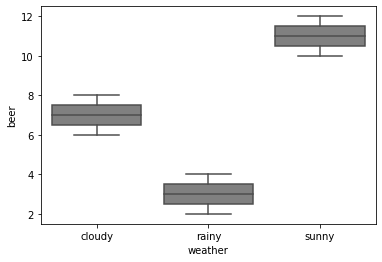

In [121]:
sns.boxplot(x="weather", y="beer", data=weather_beer, color='gray')
plt.show()

In [122]:
from statsmodels.stats.anova import anova_lm

In [123]:
anova_model = smf.ols("beer ~ weather", data=weather_beer).fit()
anova_model.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     16.00
Date:                Sun, 29 Oct 2023   Prob (F-statistic):             0.0251
Time:                        23:07:10   Log-Likelihood:                -8.5136
No. Observations:                   6   AIC:                             23.03
Df Residuals:                       3   BIC:                             22.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0000      1.000      7.000      0.006       3.818      10.182
weather[T.rainy]    -4.0000      1.414     -2.828      0.066      -8.501       0.501
weather[T.sunny]     4.0000      1.414      2.828      0.066      -0.501       8.501
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.333
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.000
Skew:                          -0.000   Prob(JB):                        0.607
Kurtosis:                       1.000   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
sm.stats.anova_lm(anova_model, typ=2)

sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN

In [125]:
# Predicted
anova_model.fittedvalues

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [126]:
# Residuals
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [127]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

#### ANOVA (2)
- stats.f_oneway
- Í∞Å ÏßëÎã®Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä Î≥ÄÏàòÎ°ú Íµ¨Î∂ÑÎêòÏñ¥ ÏûàÎäî Í≤ΩÏö∞

In [128]:
### Iris data
iris = pd.read_csv("./ADP_book_ver01/data/iris.csv")
iris.head(100)

sepal length  sepal width  petal length  petal width           target
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]

In [129]:
iris["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [130]:
iris.target.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: target, dtype: int64

In [131]:
target_list = iris["target"].unique()
setosa = iris[iris["target"]==target_list[0]]["sepal width"]
versicolor = iris[iris["target"]==target_list[1]]["sepal width"]
virginica = iris[iris["target"]==target_list[2]]["sepal width"]
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


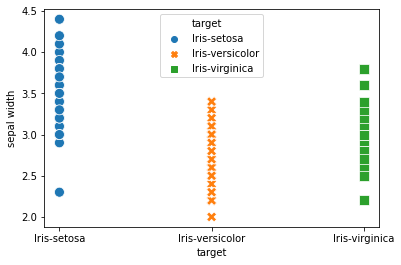

In [132]:
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
ÏÑ∏Í∞ÄÏßÄ Ï¢ÖÏóê ÎåÄÌï¥ sepal widthÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÏùò Ï¢ÖÏóê ÎåÄÌïú sepal widthÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏûàÎã§. <br>

In [133]:
### Normality test
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741333723068237, pvalue=0.3379979133605957)
ShapiroResult(statistic=0.9673908352851868, pvalue=0.1809013932943344)


Î™®Îì† ÏßëÎã®Ïù¥ Îã§ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎØÄÎ°ú, ANOVAÎ•º ÏßÑÌñâÌïúÎã§.

In [134]:
### Equal variance test
# Levene test
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [135]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

[Í≤∞Í≥ºÌï¥ÏÑù]
p-valueÍ∞Ä Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎØÄÎ°ú 'ÏÑ∏Í∞ÄÏßÄ Ï¢ÖÏùò ÍΩÉÎ∞õÏπ® Ìè≠Ïùò ÌèâÍ∑†ÏùÄ Ï∞®Ïù¥Í∞Ä ÏûàÎã§'Îäî Í≤∞Î°†ÏùÑ ÎÇº Ïàò ÏûàÎã§.

#### Kruskal-Wallis test

In [136]:
# ÏÑúÏó¥ Ï≤ôÎèÑ Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774534e-14)

In [137]:
### (Ï∞∏Í≥†) Mood's Median Test
# Pearson Ïπ¥Ïù¥ Ï†úÍ≥± Í≤ÄÏ†ïÏùò ÌäπÏàòÌïú Í≤ΩÏö∞
# Îëê Í∞ú Ïù¥ÏÉÅÏùò ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌïú Î™®ÏßëÎã®Ïùò Ï§ëÏúÑÏàòÍ∞Ä ÎèôÏùºÌïòÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í≤ÄÏ†ïÌïòÎäî ÎπÑÎ™®Ïàò Í≤ÄÏ†ï
stats.median_test(setosa, versicolor, virginica)

(50.22477971587844, 1.2411596758086847e-11, 3.0, array([[42,  8, 17],
        [ 8, 42, 33]]))

In [138]:
### if not equal variance
# Transformation / Scaling
# Welch's ANOVA

#### Welch's ANOVA
- Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±ÏãúÌÇ§ÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞

In [139]:
### (Ï∞∏Í≥†) Welch's ANOVA
pg.welch_anova(data=iris, dv='sepal width', between='target')

Source  ddof1      ddof2          F         p-unc       np2
0  target      2  97.369597  43.303381  3.519723e-14  0.391881

### (2) Two-way
- ÌïòÎÇòÏùò Ï¢ÖÏÜçÎ≥ÄÏàò (Ïó∞ÏÜçÌòï) Ïóê ÎåÄÌïú Îëê Í∞úÏùò ÎèÖÎ¶ΩÎ≥ÄÏàò(Î≤îÏ£ºÌòï)Ïùò ÏòÅÌñ•ÏùÑ ÏïåÏïÑÎ≥¥Îäî Î∞©Î≤ï
- ÍµêÌò∏ÏûëÏö© Í≤ÄÏ¶ù ÌïÑÏöî. ÍµêÌò∏ÏûëÏö©Ïù¥ ÏûàÎäî Í≤ΩÏö∞ Ï£ºÌö®Í≥º Í≤ÄÏ†ïÏùÄ ÏùòÎØ∏Í∞Ä ÏóÜÎã§
- ANOVA (F-test), Friedman test

In [140]:
mtcars = pd.read_csv('./ADP_book_ver01/data/mtcars.csv', index_col='Unnamed: 0')
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [141]:
mtcars.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [142]:
am0 = mtcars[mtcars.am==0]
am1 = mtcars[mtcars.am==1]

cyl4 = mtcars[mtcars.cyl==4]
cyl6 = mtcars[mtcars.cyl==6]
cyl8 = mtcars[mtcars.cyl==8]

In [143]:
### Normality test
# mpg data is normal
print(stats.shapiro(am0['mpg']))
print(stats.shapiro(am1['mpg']))

print(stats.shapiro(cyl4['mpg']))
print(stats.shapiro(cyl6['mpg']))
print(stats.shapiro(cyl8['mpg']))

ShapiroResult(statistic=0.9767745137214661, pvalue=0.8987393379211426)
ShapiroResult(statistic=0.9458037614822388, pvalue=0.5362744927406311)
ShapiroResult(statistic=0.9124392867088318, pvalue=0.26059386134147644)
ShapiroResult(statistic=0.8990352153778076, pvalue=0.32517871260643005)
ShapiroResult(statistic=0.9317531585693359, pvalue=0.3228558897972107)


In [144]:
### Equal variance test
# not equal variance
stats.levene(am0['mpg'], am1['mpg'])

LeveneResult(statistic=4.1876255537753995, pvalue=0.04957067404156203)

In [145]:
stats.levene(cyl4['mpg'], cyl6['mpg'], cyl8['mpg'])

LeveneResult(statistic=5.507064861977649, pvalue=0.009390247105110484)

In [146]:
mtcars['mpg_sqrt'] = np.sqrt(mtcars.mpg)

In [147]:
am0 = mtcars[mtcars.am==0]
am1 = mtcars[mtcars.am==1]

cyl4 = mtcars[mtcars.cyl==4]
cyl6 = mtcars[mtcars.cyl==6]
cyl8 = mtcars[mtcars.cyl==8]

In [148]:
stats.levene(am0['mpg_sqrt'], am1['mpg_sqrt'])

LeveneResult(statistic=1.8507055090956186, pvalue=0.1838361585926835)

In [149]:
stats.levene(cyl4['mpg_sqrt'], cyl6['mpg_sqrt'], cyl8['mpg_sqrt'])

LeveneResult(statistic=2.8688891317752816, pvalue=0.07296950644913348)

#### ANOVA

Í∞ÄÏÑ§ÏùÄ Ï¥ù 3Í∞ÄÏßÄÎ°ú Ï†ïÏùòÌï† Ïàò ÏûàÍ≥†, ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÎ•º Í∞ÄÏû• Î®ºÏ†Ä Í≤ÄÏ¶ùÌïúÎã§.<br> <br>
Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•òÏôÄ Ïã§Î¶∞Îçî Í∞úÏàò Í∞ÑÏóêÎäî ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•òÏôÄ Ïã§Î¶∞Îçî Í∞úÏàò Í∞ÑÏóêÎäî ÏÉÅÌò∏ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏûàÎã§.<br><br>
Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
Ïã§Î¶∞Îçî Í∞úÏàòÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨Ïùò Ï∞®Ïù¥Îäî ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Ïã§Î¶∞Îçî Í∞úÏàòÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨Ïùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§.<br><br>
Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•òÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨Ïùò Ï∞®Ïù¥Îäî ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•òÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨Ïùò Ï∞®Ïù¥Îäî ÏûàÎã§. <br>


In [150]:
### Two-way ANOVA
formula = 'mpg_sqrt ~ C(cyl) + C(am) + C(cyl):C(am)'
model = smf.ols(formula, mtcars).fit()

aov_table = anova_lm(model, typ=2)
aov_table

sum_sq    df          F        PR(>F)
C(cyl)        5.634040   2.0  24.915357  9.050376e-07
C(am)         0.387832   1.0   3.430212  7.540130e-02
C(cyl):C(am)  0.209114   2.0   0.924763  4.092816e-01
Residual      2.939654  26.0        NaN           NaN

[Í≤∞Í≥ºÌï¥ÏÑù]
ÍµêÌò∏ÏûëÏö©Ïùò p-valueÍ∞Ä Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, Ïã§Î¶∞Îçî Í∞úÏàòÏôÄ Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•ò Í∞ÑÏóêÎäî ÍµêÌò∏ÏûëÏö©Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§. <br>
Ïã§Î¶∞Îçî Í∞úÏàò Î≥ÄÏàòÏóê ÎåÄÌïú p-valueÎäî Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Ï£ºÌö®Í≥º Í≤ÄÏ†ïÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§. Îî∞ÎùºÏÑú Ïã§Î¶∞Îçî Í∞úÏàòÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨ ÌèâÍ∑†Ïùò Ï∞®Ïù¥Í∞Ä ÎÇúÎã§. <br>
Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•ò Î≥ÄÏàòÏóê ÎåÄÌïú p-valueÎäî Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, Ï£ºÌö®Í≥º Í≤ÄÏ†ïÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ ÏïäÎäîÎã§. Îî∞ÎùºÏÑú Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•òÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨ ÌèâÍ∑†ÏùÄ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

In [151]:
from statsmodels.graphics.factorplots import interaction_plot

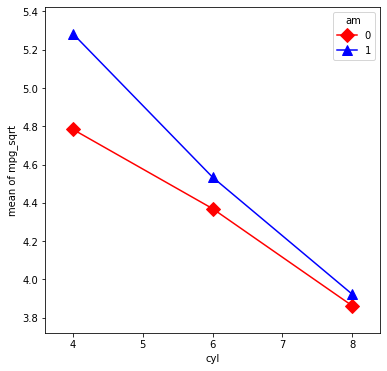

In [152]:
### interaction plot
# ÍµêÌò∏ÏûëÏö© ÌôïÏù∏
# ÎèÖÎ¶ΩÎ≥ÄÏàò cyl,amÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò mpgÏùÑ SeriesÎ°ú Î≥ÄÍ≤Ω 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg_sqrt"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax) # Î≥ÄÏàòÎäî x1, x2 y Ïàú

#### Friedman Test
- non-parametric ANOVA with blocked design
- ÍµêÌò∏ÏûëÏö©Ïóê ÎåÄÌïú Í≤ÄÏ†ïÏùÄ Rank ÌäπÏÑ± ÏÉÅ Ïñ¥Î†§ÏõÄ

In [153]:
### pg package
pg.friedman(data=mtcars, dv="mpg", within="am", subject="cyl")

Source  ddof1    Q     p-unc
Friedman     am      1  3.0  0.083265

In [154]:
pg.friedman(data=mtcars, dv="mpg", within="cyl", subject="am")

Source  ddof1    Q     p-unc
Friedman    cyl      2  4.0  0.135335

[Í≤∞Í≥ºÌï¥ÏÑù]
Ïã§Î¶∞Îçî Í∞úÏàò Î≥ÄÏàòÏóê ÎåÄÌïú p-valueÎäî Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§. Îî∞ÎùºÏÑú Ïã§Î¶∞Îçî Í∞úÏàòÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨ Ï∞®Ïù¥Îäî ÏóÜÎã§Í≥† Î≥º Ïàò ÏûàÎã§. <br>
Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•ò Î≥ÄÏàòÏóê ÎåÄÌïú p-valueÎäî Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÌÅ¨ÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ ÏïäÎäîÎã§. Îî∞ÎùºÏÑú Î≥ÄÏÜçÍ∏∞ Ï¢ÖÎ•òÏóê Îî∞Î•∏ Ï£ºÌñâÍ±∞Î¶¨Îäî Ï∞®Ïù¥Í∞Ä ÎÇúÎã§.

In [155]:
### stats package
# Í∞Å Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥Í∞Ä ÎèôÏùºÌï¥Ïïº Ìï®
# ÏöîÏïΩÎêú ÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÏñ¥Ïßà Îïå Ïú†Ïö©
W = [1, 3, 1, 3, 1] #ÏñëÏãù
K = [1, 3, 3, 1, 1] #ÌïúÏãù
C = [2, 3, 3, 3, 1] #Ï§ëÏãù

data = pd.DataFrame(np.array([W, K, C]), index=['W', 'K', 'C'])

In [156]:
stats.friedmanchisquare(data.values[0], data.values[1], data.values[2])

FriedmanchisquareResult(statistic=2.666666666666673, pvalue=0.2635971381157259)

H0: ÏùåÏãù Ï¢ÖÎ•òÏóê Îî∞Î•∏ 5Î™ÖÏùò ÏÑ†Ìò∏ÎèÑÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. <br>
H1: ÏùåÏãù Ï¢ÖÎ•òÏóê Îî∞Î•∏ 5Î™ÖÏùò ÏÑ†Ìò∏ÎèÑÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§. <br>
[Í≤∞Í≥ºÌï¥ÏÑù] Friedman testÎ•º ÏàòÌñâÌïú Í≤∞Í≥º, Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ 2.67, p-value 0.26ÏúºÎ°ú Ïú†ÏùòÏàòÏ§Ä 0.05 ÌïòÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÎã§. ÏùåÏãù Ï¢ÖÎ•òÏóê Îî∞Î•∏ 5Î™ÖÏùò ÏÑ†Ìò∏ÎèÑÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

### (3) ANCOVA
- Í≥µÎ≥ÄÎüâÏùò ÏòÅÌñ•ÏùÑ Í≥†Î†§Ìïú Î∂ÑÏÇ∞Î∂ÑÏÑù
- Í≥µÎ≥ÄÎüâÏùÄ Ïó∞ÏÜçÌòï Î≥ÄÏàò
- ANOVAÏùò Í∞ÄÏ†ïÏùÑ ÎßåÏ°±ÏãúÏºúÏïº Ìï®

In [157]:
### wt Î≥ÄÏàòÎ•º Í≥µÎ≥ÄÎüâÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥†, Ïã§Î¶∞Îçî Í∞úÏàò Î≥ÄÏàòÏùò ÏòÅÌñ• Ï∏°Ï†ï
pg.ancova(data=mtcars, dv='mpg', covar='wt', between='cyl')

Source          SS  DF          F     p-unc       np2
0       cyl   95.263290   2   7.285567  0.002835  0.342277
1        wt  118.203950   1  18.080056  0.000213  0.392362
2  Residual  183.058648  28        NaN       NaN       NaN

### (4) MANOVA
- Îã§Î≥ÄÎüâ Î∂ÑÏÇ∞Î∂ÑÏÑù
- Ï¢ÖÏÜçÎ≥ÄÏàò Ïó¨Îü¨ Í∞úÎ•º Ìïú Î≤àÏóê Í≤ÄÏ†ï
- Í∞ÄÏ†ï: Ï¢ÖÏÜçÎ≥ÄÏàòÎì§Ïùò Ï†ïÍ∑úÏÑ±, Equal covariance

In [158]:
from statsmodels.multivariate.manova import MANOVA

In [159]:
maov = MANOVA.from_formula('cyl + am ~ mpg + wt', data=mtcars)
print(maov.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.5871 2.0000 28.0000  9.8475 0.0006
         Pillai's trace 0.4129 2.0000 28.0000  9.8475 0.0006
 Hotelling-Lawley trace 0.7034 2.0000 28.0000  9.8475 0.0006
    Roy's greatest root 0.7034 2.0000 28.0000  9.8475 0.0006
------------------------------------------------------------
                                                            
------------------------------------------------------------
          mpg           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.6864 2.0000 28.0000  6.3955 0.0052
         Pillai's trace 0.3136 2.0000 28.0000  6.3955 0.0052
 Hotelling-Lawley trace 0.4568 2.0000 28.0

In [160]:
### post-hoc -> ÏÑ†ÌòïÌåêÎ≥ÑÎ∂ÑÏÑù ÏßÑÌñâ

### (5) Post-hoc test

In [161]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.sandbox.stats.multicomp import multipletests

#### Fisher's LSD & Bonferroni adjustment
- T-testÎ•º Ïó¨Îü¨ Î≤à ÏàòÌñâÌïòÎäî Í≤É
- ÎπÑÍµê ÎåÄÏÉÅÏù¥ ÎßéÏùÑÏàòÎ°ù Í≤ÄÏ†ïÎ†•Ïù¥ Îñ®Ïñ¥Ïßê
- Tukey Î≥¥Îã§ ÏóÑÍ≤©Ìï®

In [162]:
mc = MultiComparison(data=iris["sepal width"], groups=iris["target"])

ret = mc.allpairtest(stats.ttest_ind, method='bonf', alpha=0.05)
ret[0] # Î™®Îì† ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§.

<class 'statsmodels.iolib.table.SimpleTable'>

#### Tukey's HSD
- Most powerful
- ANOVA ÏàòÌñâÌïòÏßÄ ÏïäÍ≥†ÎèÑ Í≤∞Í≥ºÎ•º Î≥º Ïàò ÏûàÏùå
- ÏßëÎã®Î≥Ñ sample ÏàòÍ∞Ä ÎèôÏùºÌï¥Ïïº Ìï®

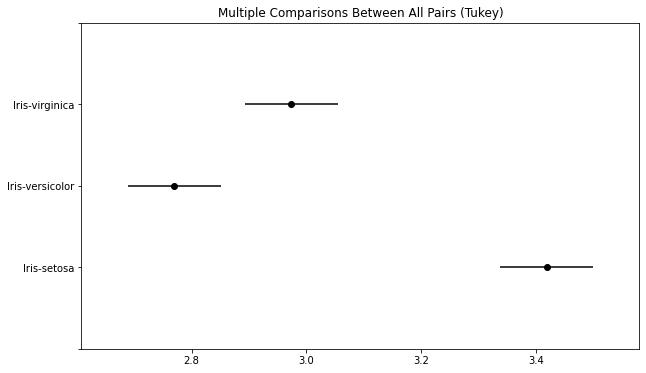

In [163]:
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [164]:
tukeyhsd.summary() # Î™®Îì† ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§.

<class 'statsmodels.iolib.table.SimpleTable'>

In [165]:
### (Ï∞∏Í≥†) pingouin Ìå®ÌÇ§ÏßÄ ÏÇ¨Ïö©
pg.pairwise_tukey(data=iris, dv='sepal width', between='target')

A                B  mean(A)  mean(B)   diff        se  \
0      Iris-setosa  Iris-versicolor    3.418    2.770  0.648  0.068084   
1      Iris-setosa   Iris-virginica    3.418    2.974  0.444  0.068084   
2  Iris-versicolor   Iris-virginica    2.770    2.974 -0.204  0.068084   

        tail         T   p-tukey    hedges  
0  two-sided  9.517713  0.001000  1.888937  
1  two-sided  6.521396  0.001000  1.294272  
2  two-sided -2.996317  0.007891 -0.594665

In [166]:
### Two-wayÏóêÏÑú 1Í∞ú ÏöîÏù∏Îßå Ïú†ÏùòÌïú Í≤ΩÏö∞ ÏÇ¨ÌõÑ Í≤ÄÏ†ï
# One-wayÏôÄ ÎèôÏùº
mc = MultiComparison(data=mtcars["mpg_sqrt"], groups=mtcars["cyl"])

ret = mc.allpairtest(stats.ttest_ind, method='bonf', alpha=0.05)
ret[0] # Î™®Îì† ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§.

<class 'statsmodels.iolib.table.SimpleTable'>

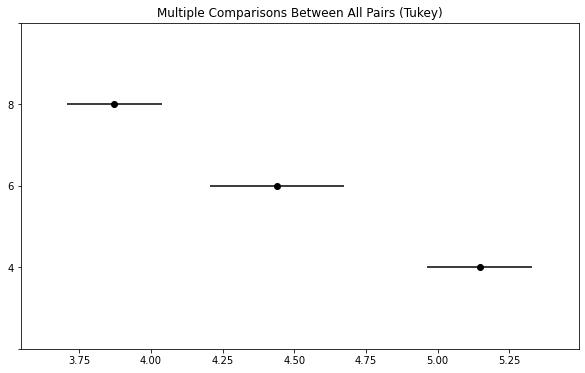

In [167]:
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [168]:
tukeyhsd.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#### Scheffe
- Í∞ÄÏû• ÏóÑÍ≤©Ìïú Test

In [169]:
# ! pip install scikit-posthocs
import scikit_posthocs as sp

In [170]:
sp.posthoc_scheffe(iris, group_col='target', val_col='sepal width')

Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa      1.000000e+00     4.730163e-16    7.739781e-09
Iris-versicolor  4.730163e-16     1.000000e+00    1.281402e-02
Iris-virginica   7.739781e-09     1.281402e-02    1.000000e+00

#### Games Howell
- Equal varianceÍ∞Ä ÏïÑÎãå Í≤ΩÏö∞ ÏÇ¨Ïö©
- Welch's ANOVAÏùò ÏÇ¨ÌõÑÍ≤ÄÏ†ï Î∞©Î≤ï

In [171]:
pg.pairwise_gameshowell(data =iris, dv='sepal width', between='target')

A                B  mean(A)  mean(B)   diff        se  \
0      Iris-setosa  Iris-versicolor    3.418    2.770  0.648  0.049361   
1      Iris-setosa   Iris-virginica    3.418    2.974  0.444  0.049918   
2  Iris-versicolor   Iris-virginica    2.770    2.974 -0.204  0.044997   

        tail         T         df      pval    hedges  
0  two-sided  9.282773  94.525878  0.001000  1.842310  
1  two-sided  6.289385  95.395253  0.001000  1.248226  
2  two-sided -3.205761  97.926827  0.004031 -0.636233

#### Duncan
- ÏùºÎ∞òÏ†ÅÏúºÎ°úÎäî Ï∂îÏ≤úÎêòÏßÄ ÏïäÏùå
- ÏßëÎã® Í∞úÏàòÍ∞Ä Í∞ôÏùÑ Îïå ÏÇ¨Ïö©
- ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏóê ÏÇ¨Ïö© Í∞ÄÎä•

In [172]:
sp.posthoc_dunn(iris, group_col='target', val_col='sepal width', p_adjust='holm')

Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa      1.000000e+00     3.247311e-14    2.292201e-07
Iris-versicolor  3.247311e-14     1.000000e+00    1.521219e-02
Iris-virginica   2.292201e-07     1.521219e-02    1.000000e+00

#### Mann-whitney
- Mann-whitneyÎ•º Ïó¨Îü¨ Î≤à ÏàòÌñâÌïòÎäî Í≤É
- ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï

In [173]:
sp.posthoc_mannwhitney(iris, group_col='target', val_col='sepal width', alternative='two-sided') # Î™®Îì† ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§.

Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa      1.000000e+00     2.983442e-13    1.180877e-08
Iris-versicolor  2.983442e-13     1.000000e+00    4.572142e-03
Iris-virginica   1.180877e-08     4.572142e-03    1.000000e+00

#### Nemenyi test
- Tukey's HSD for non-parametric

In [174]:
sp.posthoc_conover(np.array([setosa, versicolor, virginica])) # Î™®Îì† ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§.

1             2             3
1  1.000000e+00  1.765695e-18  1.356705e-10
2  1.765695e-18  1.000000e+00  1.890443e-03
3  1.356705e-10  1.890443e-03  1.000000e+00

#### Conover test
- ÎπÑÎ™®ÏàòÏ†Å Í≤ÄÏ†ï

In [175]:
sp.posthoc_conover(np.array([setosa, versicolor, virginica])) # Î™®Îì† ÏßëÎã®Ïùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§.

1             2             3
1  1.000000e+00  1.765695e-18  1.356705e-10
2  1.765695e-18  1.000000e+00  1.890443e-03
3  1.356705e-10  1.890443e-03  1.000000e+00

#### Post-hoc for Two way ANOVA

In [176]:
# !pip install bioinfokit
from bioinfokit.analys import stat

In [177]:
### Tukey for two-way anova
result = stat()

result.tukey_hsd(df=mtcars, res_var='mpg_sqrt', xfac_var=['cyl', 'am'], anova_model=formula)
result.tukey_summary

group1  group2      Diff     Lower     Upper    q-value   p-value
0   (6, 1)  (6, 0)  0.164238 -0.624832  0.953308   0.904417  0.900000
1   (6, 1)  (4, 1)  0.748787  0.049352  1.448223   4.651803  0.030753
2   (6, 1)  (4, 0)  0.249253 -0.594298  1.092804   1.283926  0.900000
3   (6, 1)  (8, 1)  0.610588 -0.332531  1.553706   2.813145  0.376069
4   (6, 1)  (8, 0)  0.671048  0.004162  1.337934   4.372329  0.047942
5   (6, 0)  (4, 1)  0.913025  0.280362  1.545688   6.270767  0.001872
6   (6, 0)  (4, 0)  0.413491 -0.375579  1.202561   2.276991  0.587789
7   (6, 0)  (8, 1)  0.446350 -0.448371  1.341071   2.167695  0.629995
8   (6, 0)  (8, 0)  0.506810 -0.089671  1.103291   3.691981  0.130121
9   (4, 1)  (4, 0)  0.499534 -0.199902  1.198970   3.103330  0.274180
10  (4, 1)  (8, 1)  1.359375  0.542610  2.176140   7.231906  0.001000
11  (4, 1)  (8, 0)  1.419835  0.948276  1.891395  13.083145  0.001000
12  (4, 0)  (8, 1)  0.859841 -0.083278  1.802960   3.961524  0.088948
13  (4, 0)  (8, 0)  0.920301  0.253416  1.587187   5.996381  0.003063
14  (8, 1)  (8, 0)  0.060460 -0.728609  0.849530   0.332941  0.900000

In [178]:
### Two-way, Non-parametric ÏÇ¨ÌõÑ Í≤ÄÏ†ï
# Nemenyi
sp.posthoc_nemenyi_friedman(a=mtcars, y_col='mpg_sqrt', block_col='am', group_col='cyl', melted=True)

6         4        8
6  1.000000  0.036902  0.00331
4  0.036902  1.000000  0.00100
8  0.003310  0.001000  1.00000

In [179]:
# Conover
sp.posthoc_conover_friedman(a=mtcars, y_col='mpg_sqrt', block_col='am', group_col='cyl', melted=True)

6         4         8
6  1.000000  0.500349  0.823937
4  0.500349  1.000000  0.630247
8  0.823937  0.630247  1.000000

In [180]:
# Mann-Whitney
# block ÏßÄÏ†ï Î∂àÍ∞Ä
sp.posthoc_mannwhitney(a=mtcars, val_col='mpg', group_col='cyl', alternative='two-sided')

4         6         8
4  1.000000  0.000666  0.000028
6  0.000666  1.000000  0.001013
8  0.000028  0.001013  1.000000

In [181]:
# Duncan
# block ÏßÄÏ†ï Î∂àÍ∞Ä
sp.posthoc_dunn(a=mtcars, val_col='mpg_sqrt', group_col='cyl', p_adjust='holm')

4         6         8
4  1.000000  0.053687  0.000001
6  0.053687  1.000000  0.053687
8  0.000001  0.053687  1.000000

## Contingency table
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï

### (1) Chi-Square tests
- Í∞Å Î≤îÏ£ºÏùò Í∏∞ÎåÄÎπàÎèÑÎäî 5 Ïù¥ÏÉÅÏù¥Ïñ¥Ïïº Ìï®
- Goodness of fit
    - Îã§Ìï≠Î™®ÏßëÎã® ÎπÑÏú® Ï∞®Ïù¥ ÌôïÏù∏
    - Í∞Å Î≤îÏ£ºÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎπàÎèÑÎ∂ÑÌè¨Í∞Ä Ïù¥Î°†Ï†ÅÏúºÎ°ú Í∏∞ÎåÄÌïòÎäî Î∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÏßÄ Í≤ÄÏ†ï
- Independence
    - Ìïú Î™®ÏßëÎã® ÎÇ¥ ÏàòÏ§ÄÏùò Ï∞®Ïù¥ ÌôïÏù∏ (ÍµêÏ∞®Î∂ÑÏÑù)
    - Îëê Í∞úÏùò Î≥ÄÏàò A, BÏùò Í¥ÄÍ≥ÑÍ∞Ä ÎèÖÎ¶ΩÏù∏ÏßÄ Í≤ÄÏ†ï
- Homogeneity
    - Î∂ÄÎ∂Ñ Î™®ÏßëÎã® Í∞ÑÏùò ÏàòÏ§Ä Ï∞®Ïù¥ ÌôïÏù∏
    - Î™®ÏßëÎã®Ïù¥ ÏûÑÏùòÏùò Î≥ÄÏàòÏóê Îî∞Îùº RÍ∞úÎ°ú Î≤îÏ£ºÌôîÎêòÏóàÏùÑ Îïå, R Í∞úÏùò Î∂ÄÎ∂Ñ Î™®ÏßëÎã®ÏóêÏÑú Ï∂îÏ∂úÌïú ÌëúÎ≥∏Ïù¥ CÍ∞úÏùò Î≤îÏ£ºÌôîÎêú ÏßëÎã®Ïùò Î∂ÑÌè¨Í∞Ä ÎèôÏùºÌïúÏßÄ Í≤ÄÏ†ï

#### Goodness of fit test

In [182]:
### titanic data
df = pd.read_csv("./ADP_book_ver01/data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [183]:
df_t = df[df['survived']==1]
table = df_t[['sex']].value_counts()
table

sex   
female    233
male      109
dtype: int64

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
ÌÉÄÏù¥ÌÉÄÎãâÌò∏ ÏÉùÏ°¥Ïûê Ï§ë ÎÇ®ÏûêÏôÄ Ïó¨ÏûêÏùò ÎπÑÏú®ÏùÄ ÎèôÏùºÌïòÎã§. (Í∞Å 50%)<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
ÌÉÄÏù¥ÌÉÄÎãâÌò∏ ÏÉùÏ°¥Ïûê Ï§ë ÎÇ®ÏûêÏôÄ Ïó¨ÏûêÏùò ÎπÑÏú®ÏùÄ ÎèôÏùºÌïòÏßÄ ÏïäÎã§. (Í∞Å 50%)<br>

In [184]:
from scipy.stats import chisquare

In [185]:
expected = int(table.sum() / 2) # 50%
chi = chisquare(table, f_exp=[expected, expected]) # f_expÏóê Í∏∞ÎåÄ ÎπàÎèÑ ÏûÖÎ†•
print('<Ï†ÅÌï©ÎèÑ Í≤ÄÏ†ï>\n', chi)

<Ï†ÅÌï©ÎèÑ Í≤ÄÏ†ï>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477238e-11)


In [186]:
### Îã§Î•∏ input
O = np.array([233, 109])
pr = np.array([0.5, 0.5]) # sum() =1
n = O.sum()
E = n * pr

In [187]:
chi2, p = chisquare(O, E) # f_expÏóê Í∏∞ÎåÄ ÎπàÎèÑ ÏûÖÎ†•
print('<Ï†ÅÌï©ÎèÑ Í≤ÄÏ†ï> chi-sq ÌÜµÍ≥ÑÎüâ:', chi2, 'p-value:', p)

<Ï†ÅÌï©ÎèÑ Í≤ÄÏ†ï> chi-sq ÌÜµÍ≥ÑÎüâ: 44.95906432748538 p-value: 2.0119672574477238e-11


[Í≤∞Í≥ºÌï¥ÏÑù]
P-valueÍ∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§. ÌÉÄÏù¥ÌÉÄÎãâÌò∏ ÏÉùÏ°¥ÏûêÏùò ÏÑ±Î≥Ñ ÎπÑÏú®ÏùÄ ÎèôÏùºÌïòÎã§Í≥† Î≥º Ïàò ÏóÜÎã§.

#### Independence test / Homogeneity test

- ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï <br>
Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
class (Ï¢åÏÑùÎì±Í∏â) Î≥ÄÏàòÏôÄ ÏÉùÏ°¥ Ïó¨Î∂ÄÎäî ÎèÖÎ¶ΩÏù¥Îã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
class (Ï¢åÏÑùÎì±Í∏â) Î≥ÄÏàòÏôÄ ÏÉùÏ°¥ Ïó¨Î∂ÄÎäî ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§.<br>

- ÎèôÏßàÏÑ± Í≤ÄÏ†ï <br>
Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
class Î≥ÄÏàòÏùò Î∂ÑÌè¨Îäî ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Í¥ÄÍ≥ÑÏóÜÏù¥ ÎèôÏùºÌïòÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
class Î≥ÄÏàòÏùò Î∂ÑÌè¨Îäî ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.<br>

- ÌïòÎÇòÏùò Î™®ÏßëÎã®ÏóêÏÑú Ï∂îÏ∂úÎêú Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÏÑ± Ï∏°Ï†ÅÏùÄ ÎèÖÎ¶ΩÏÑ±, Îëê Í∞ú Î™®ÏßëÎã®ÏóêÏÑú Ï∂îÏ∂úÎêú Î≥ÄÏàòÏùò Î∂ÑÌè¨ ÎπÑÍµêÎäî ÎèôÏßàÏÑ± Í≤ÄÏ†ï

In [188]:
table = pd.crosstab(df['class'], df['survived'])
table

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119

In [189]:
from scipy.stats import chi2_contingency

In [190]:
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


[Í≤∞Í≥ºÌï¥ÏÑù]
P-valueÍ∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§. class Î≥ÄÏàòÏôÄ ÏÉùÏ°¥Ïó¨Î∂Ä Î≥ÄÏàòÎäî ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§. / class Î≥ÄÏàòÏùò Î∂ÑÌè¨Îäî ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.

### (2) Fisher's exect test
- ÏÇ¨Í±¥ Î∞úÏÉù Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÏùÑ Í≤ΩÏö∞Ïùò Chi-sq test
- ÏÉòÌîåÏù¥ Ï†ÅÏùÄ Í≤ΩÏö∞Ïóê Ï£ºÎ°ú ÏÇ¨Ïö©
- Resampling Î∞©Î≤ï ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò, Ï¥àÍ∏∞ÌïòÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú Í≥ÑÏÇ∞

In [191]:
click_rate = pd.read_csv('./Practical_Statictics/data/click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


In [192]:
### scipyÏùò exact testÎäî 2*2Îßå ÏßÄÏõê
stats.fisher_exact(clicks.iloc[:2, :2].values)

(1.7606490872210954, 0.2835969483984848)

In [193]:
### unconditional exact test 
stats.barnard_exact(clicks.iloc[:2, :2].values)

BarnardExactResult(statistic=1.286298502909844, pvalue=0.20245372969560074)

In [194]:
# !pip install fisher-test-python
from fisher import fisher_test

In [195]:
fisher_test(clicks.values)

0.48241413094304153

### (3) McNemar test
- paired Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Chi-sq test

- Marginal ProbabilityÍ∞Ä Í∞ôÏùÄÏßÄ Í≤ÄÏ†ï (b=c)
- Statictic: (b-c)**2/b + c ~ Chi-sq(1)
- H0: Ï†ÑÏ≤¥ÏóêÏÑú Before:presentÏùò ÎπÑÏú®Í≥º, After:presentÏùò ÎπÑÏú®Ïù¥ Í∞ôÏùÄÍ∞Ä?" ÎòêÌïú "Before:absentÏôÄ After:presentÏùò ÎπÑÏú®Ïù¥ Í∞ôÏùÄÍ∞Ä?"
- => ÏïΩ Ï≤òÎ∞© ÌõÑ ÌôòÏûêÏùò ÏÉÅÌÉúÎäî Î≥ÄÌïòÏßÄ ÏïäÏïòÎã§

In [196]:
from statsmodels.stats.contingency_tables import mcnemar

In [197]:
x = [[59, 6], [16, 80]]

In [198]:
print(mcnemar(x, exact=True, correction=True))

pvalue      0.052478790283203125
statistic   6.0


### (4) Cochran's Q test
- ÏÑ∏ ÏßëÎã® Ïù¥ÏÉÅ ÎåÄÏùëÌëúÎ≥∏ Î≥ÄÏàòÏùò Ï∞®Ïù¥ Í≤ÄÏ†ï
- Two-way randomized block designs
- Response variable (y) can take only two possible outcomes (coded as 0 and 1)
- Test if k treatments have identical effects (identical binomial proportions) <br>
H0: the treatments are equally effective <br>
H1: there is a difference in effectiveness between treat

In [199]:
from statsmodels.stats.contingency_tables import cochrans_q

In [200]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

cochran_table = pd.DataFrame([y_true, y_model_1, y_model_2, y_model_3]).T
cochran_table.columns = ['y_true', 'y_model_1', 'y_model_2', 'y_model_3']
cochran_table

y_true  y_model_1  y_model_2  y_model_3
0        0          1          1          1
1        0          1          1          1
2        0          1          1          1
3        0          1          1          0
4        0          1          1          0
..     ...        ...        ...        ...
95       0          0          0          0
96       0          0          0          0
97       0          0          0          0
98       0          0          0          1
99       0          0          0          1

[100 rows x 4 columns]

In [201]:
print(cochrans_q(cochran_table))

df          3
pvalue      3.5427428824935784e-05
statistic   23.272727272727273


## Linear Regression
- Regression: ÌïòÎÇò ÌòπÏùÄ Í∑∏ Ïù¥ÏÉÅÏùò Î≥ÄÏàòÎì§Ïù¥ Îòê Îã§Î•∏ Î≥ÄÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ• Ï∂îÎ°†
- Î™®ÌòïÏùò Ï†ÅÌï©ÏÑ± ÌôïÏù∏
    - Î™®ÌòïÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïúÍ∞Ä?
    - ÌöåÍ∑ÄÍ≥ÑÏàòÎì§Ïù¥ Ïú†ÏùòÎØ∏ÌïúÍ∞Ä?
    - Î™®ÌòïÏùò ÏÑ§Î™ÖÎ†•ÏùÄ Ïñ¥Îñ§Í∞Ä?
    - Î™®ÌòïÏù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò Ï†ÅÌï©ÌïòÍ≥† ÏûàÎäîÍ∞Ä? (ÏûîÏ∞® ÌôïÏù∏)
    - Î™®ÌòïÏùò Í∞ÄÏ†ï ÎßåÏ°±
        - ÎèÖÎ¶Ω/Ï¢ÖÏÜçÎ≥ÄÏàò Í∞Ñ ÏÑ†ÌòïÏÑ±, ÏûîÏ∞®ÏôÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÎèÖÎ¶ΩÏÑ±, Ïò§Ï∞® Îì±Î∂ÑÏÇ∞ÏÑ±, Í¥ÄÏ∏°ÏπòÏôÄ ÏûîÏ∞®Ïùò ÎπÑÏÉÅÍ¥ÄÏÑ±, ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ±
            - Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï ÌôïÏù∏: Histogram, Q-Q plot, Jarque-bera test
            - ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÌôïÏù∏: Durbin-Watson test: ÏûîÏ∞®Îì§Ïùò ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌèâÍ∞Ä. 2Î•º Í∏∞Ï§ÄÏúºÎ°ú 0Ïù¥Î©¥ ÏñëÏùò ÏÉÅÍ¥Ä, 4Î©¥ ÏùåÏùò ÏÉÅÍ¥Ä
- OutlierÏùò ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÏúºÎØÄÎ°ú, Ï†ÅÏ†àÌïú Ï≤òÎ¶¨ ÌïÑÏöîÌï®
    - Outlier Ï≤òÎ¶¨
    - Robust Regression ÏÇ¨Ïö©

### (1) Simple Regression
- ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Í∞úÏàòÍ∞Ä ÌïòÎÇòÏù∏ Í≤ΩÏö∞
- statsmodelsÏùò ols method

In [202]:
### Îß•Ï£º Îç∞Ïù¥ÌÑ∞
beer = pd.read_csv("./stats_for_python/5-1-1-beer.csv")
beer.head()

beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8

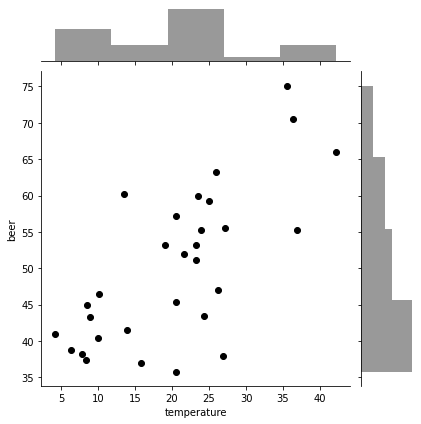

In [203]:
# Î≥ÄÏàò ÌôïÏù∏
sns.jointplot(x="temperature", y="beer", data=beer, color='black')
plt.show()

In [204]:
### ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉÅÍ¥ÄÏÑ± ÏïΩ 0.71
beer.corr()

beer  temperature
beer         1.000000     0.709901
temperature  0.709901     1.000000

In [205]:
# Model ÏÉùÏÑ±
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.11e-05
Time:                        23:07:13   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
# Parameters
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [207]:
### ANOVA on regression
# Î™®Îç∏ Ïú†ÏùòÏÑ± ÌôïÏù∏
sm.stats.anova_lm(lm_model, typ=2)

sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN

In [208]:
### Î™®Îç∏ ÏÑ†ÌÉù: Îã®Ïàú ÌöåÍ∑ÄÏóêÏÑúÎäî Null Î™®Îç∏Í≥º ÎπÑÍµê
# NULL Î™®Îç∏
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.aic

227.94194972563105

In [209]:
# Î™®Îç∏Ïùò aic
lm_model.aic

208.90902935575437

In [210]:
# R-square
lm_model.rsquared

0.5039593230611858

In [211]:
# Adj R-square
lm_model.rsquared_adj

0.48624358459908534

In [212]:
### Prediction
y_pred = lm_model.predict()
y_pred

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

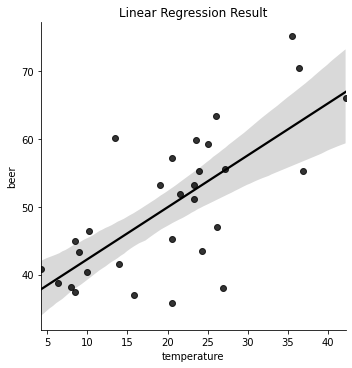

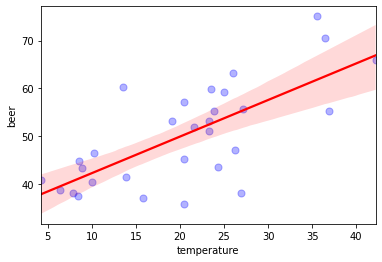

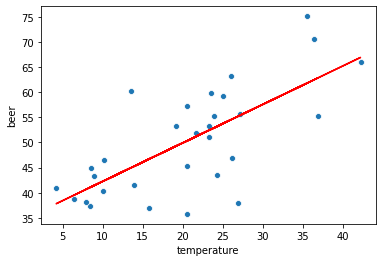

In [213]:
### ÌöåÍ∑ÄÏßÅÏÑ† ÌôïÏù∏
# lmplot
sns.lmplot(x="temperature", y="beer", data=beer, scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.title('Linear Regression Result')
plt.show()

# regplot
sns.regplot(x=beer['temperature'], y=beer['beer'], scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplotÏúºÎ°ú ÌïúÏ§Ñ Ïã§Ìñâ
plt.show()

# scatterplot
sns.scatterplot(x=beer['temperature'], y=beer['beer'])
plt.plot(beer['temperature'], y_pred, color='red') ## ÌöåÍ∑ÄÏßÅÏÑ† Ï∂îÍ∞Ä 
plt.show()

In [214]:
# ÌäπÏ†ï Í∏∞Ïò®Ïóê Îî∞Î•∏ Îß§ÏÉÅ ÏòàÏ∏°
lm_model.predict(pd.DataFrame({"temperature": [0]})) # InterceptÏôÄ ÏùºÏπò

0    34.610215
dtype: float64

In [215]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [216]:
### Residuals
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

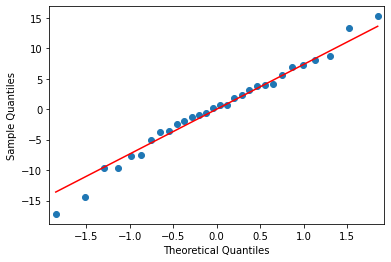

In [217]:
### Q-Q plot
# ÏûîÏ∞® Ï†ïÍ∑úÏÑ± ÌôïÏù∏
fig = sm.qqplot(resid, line="s")

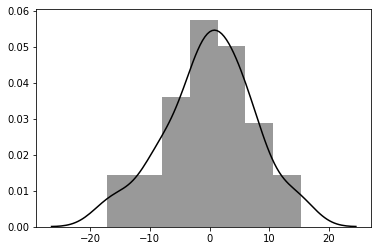

In [218]:
sns.distplot(resid, color='black', kde=True)
plt.show()

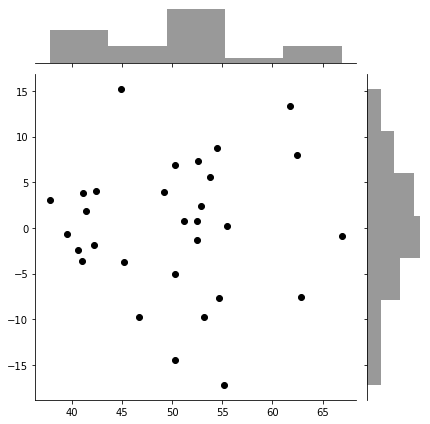

In [219]:
sns.jointplot(x=lm_model.fittedvalues, y=resid, joint_kws={"color": "black"}, marginal_kws={"color": "black"})

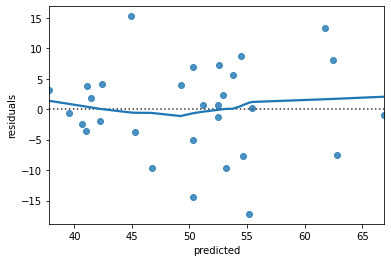

In [220]:
### Residual plot
# ÏûîÏ∞® Îì±Î∂ÑÏÇ∞ÏÑ± ÌôïÏù∏
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = y_pred
plot_df["residuals"] = lm_model.resid

### residplot
sns.residplot(data=plot_df, x="predicted", y="residuals", lowess=True)
plt.show()

### (2) Multiple Regression
- ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàòÍ∞Ä Ïó¨Îü¨ Í∞úÏù∏ Í≤ΩÏö∞
- ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞úÏàòÍ∞Ä ÎäòÎ©¥ R-square Í∞íÏùÄ Ìï≠ÏÉÅ Ï¶ùÍ∞ÄÌïòÎØÄÎ°ú, Adjusted R-square (Î≥ÄÏàò Í∞úÏàò Í≥†Î†§)Î°ú ÏÑ§Î™ÖÎ†• Ï∏°Ï†ï

#### Variable Selection
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
    - VIF 10 Ïù¥ÏÉÅ
    - ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.9 Ïù¥ÏÉÅ
    - ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞Ñ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò ÌóàÏö©Ïò§Ï∞®(1-Rsquare) 0.1 Ïù¥Ìïò
- ÎèÖÎ¶ΩÎ≥ÄÏàò ÏÑ†ÌÉù: ÏµúÏ†ÅÏùò ÌöåÍ∑ÄÏãù ÎèÑÏ∂ú
    - Î™®Îì† Í∞ÄÎä•Ìïú Ï°∞Ìï©
    - Îã®Í≥ÑÏ†Å Î≥ÄÏàòÏÑ†ÌÉù: Forward, Backward, Stepwise
- Î≥ÄÏàòÏÑ†ÌÉù Í∏∞Ï§Ä
    - AIC(Akaike's Information Criteria): Î™®Îç∏Ïóê Î≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌï†ÏàòÎ°ù Î∂àÏù¥ÏùµÏùÑ Ï£ºÎäî Ïò§Ï∞® Ï∏°Ï†ïÎ≤ï
    - BIC(Bayesian Information Criteria): AICÏôÄ Ïú†ÏÇ¨ÌïòÎÇò, Î≥ÄÏàò Ï∂îÍ∞ÄÏóê Îçî Í∞ïÌïú Ìå®ÎÑêÌã∞
    - Adj R-square: Î™®Îç∏Ïóê Î≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌï†ÏàòÎ°ù Í≤∞Ï†ïÍ≥ÑÏàòÏóê Î∂àÏù¥Ïùµ
    - Mallows Cp: AICÏùò Î≥ÄÌòï. CpÍ∞íÏù¥ ÏûëÍ≥†, p+ÏÉÅÏàòÏùò Í∞úÏàòÏôÄ ÎπÑÏä∑Ìï†ÏàòÎ°ù Ìé∏Ìñ•Ïù¥ ÏûëÍ≥† Ïö∞ÏàòÌïòÎã§Í≥† ÌåêÎã®Ìï®
- Î≥ÄÏàòÏÑ†ÌÉù Î∞©Î≤ï
    - Simple Selection: VIFÏôÄ AIC Îì±Îì±ÏùÑ Í≥†Î†§, Í∞ÄÏû• ÎÇÆÏùÄ Ïò§Ï∞®Î•º Í∞ÄÏßÄÎäî Î™®Îç∏ ÏÑ†ÌÉù
    - Auto Selection: Simple selection ÏûêÎèôÌôî. Foreward, Backward, Stepwise
    - Regularized Regression: Ridge, Lasso, ElasticNet Îì±ÏúºÎ°ú ÏùºÎ∂Ä Î≥ÄÏàò ÏòÅÌñ•Î†• Í∞êÏÜå

##### Simple Selection

In [221]:
### Sales data
sales = pd.read_csv("./stats_for_python/5-3-1-lm-model.csv")
sales.head(3)

humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy

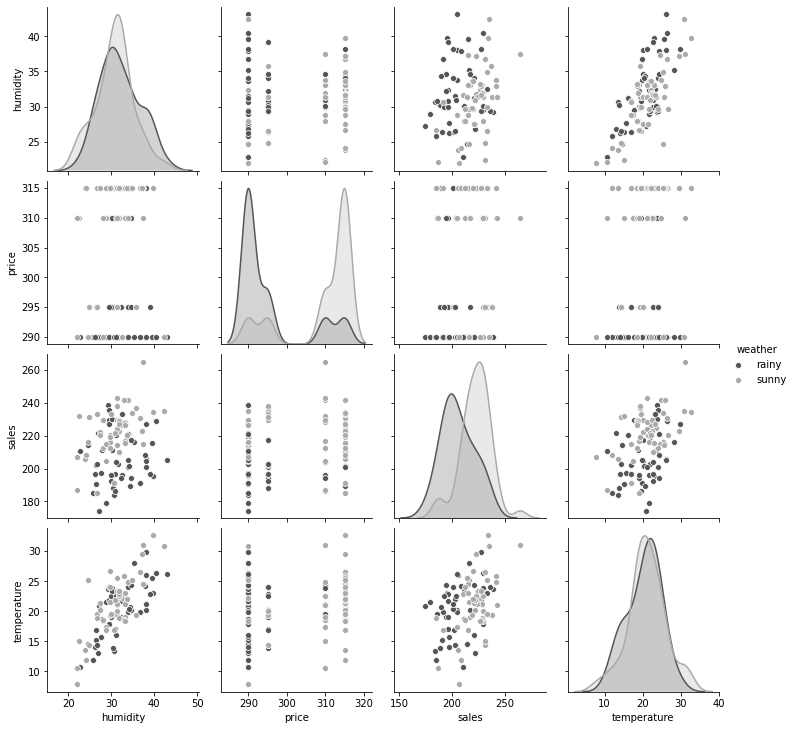

In [222]:
sns.pairplot(data=sales, hue="weather", palette="gray")
plt.show()

In [223]:
# ÎÇ†Ïî® Î≥Ñ ÌèâÍ∑†
sales.groupby("weather").mean()

humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102

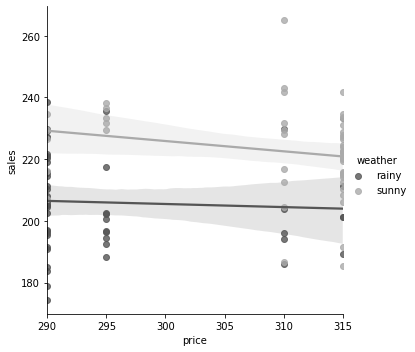

In [224]:
# ÎÇ†Ïî® Î≥Ñ Îß§ÏÉÅÍ≥º ÏÉÅÌíà Í∞ÄÍ≤©
sns.lmplot(x="price", y="sales", data=sales, hue="weather", palette='gray')
plt.show()

In [225]:
from statsmodels.formula.api import ols

In [226]:
### Multiple X
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price + weather:temperature", data=sales).fit()
lm_sales.params

Intercept                       280.707580
weather[T.sunny]                 15.945014
humidity                         -0.247287
temperature                       1.488547
weather[T.sunny]:temperature      0.195651
price                            -0.329064
dtype: float64

In [227]:
# Regression Í≥ÑÏàò Í≤ÄÏ†ï (T-test) -> Type 2 ANOVA
lm_sales.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [228]:
# Null ModelÏóêÏÑú ÏãúÏûëÌïòÏó¨ Î≥ÄÏàò ÏÑ†ÌÉù
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [229]:
# ÎÇ†Ïî®Í∞Ä Îì§Ïñ¥Í∞Ñ Î™®Îç∏
mod_1 = smf.ols("sales ~ weather", sales).fit()
sm.stats.anova_lm(mod_1).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN

In [230]:
# ÎÇ†Ïî® + ÏäµÎèÑ Î™®Îç∏
mod_2 = smf.ols("sales ~ weather + humidity", sales).fit()
sm.stats.anova_lm(mod_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN

In [231]:
# ÎÇ†Ïî® + Í∏∞Ïò® Î™®Îç∏
mod_2_2 = smf.ols("sales ~ weather + temperature", sales).fit()
sm.stats.anova_lm(mod_2_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.781     0.0
temperature   1.0   3814.779  3814.779  20.441     0.0
Residual     97.0  18102.786   186.627     NaN     NaN

In [232]:
# ÎÇ†Ïî® + Í∏∞Ïò® + ÏäµÎèÑ Î™®Îç∏
# ÏäµÎèÑÏùò Ìö®Í≥ºÍ∞Ä ÎÜíÏßÄ ÏïäÏùå (Ïú†ÏùòÌïòÏßÄ ÏïäÏùå)
mod_3_2 = smf.ols("sales ~ weather + temperature + humidity", sales).fit()
sm.stats.anova_lm(mod_3_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN

In [233]:
# ÎÇ†Ïî®:Í∏∞Ïò® ÍµêÌò∏ÏûëÏö© Ï∂îÍ∞Ä Î™®Îç∏
# ÍµêÌò∏ÏûëÏö©ÏùÄ ÏóÜÏùå
mod_4_2 = smf.ols("sales ~ weather + temperature + weather:temperature", sales).fit()
sm.stats.anova_lm(mod_3_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN

In [234]:
# Ï†ÑÏ≤¥ Î≥ÄÏàò Î™®Îç∏
mod_full = smf.ols("sales ~ weather + humidity + temperature + price", sales).fit()
sm.stats.anova_lm(mod_full, typ=2).round(3)

sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN

In [235]:
# ÏäµÎèÑ Ï†úÏô∏ Î™®Îç∏
mod_non_humi = smf.ols("sales ~ weather + temperature + price", sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN

In [236]:
# 2Í∞ú Î™®Îç∏ ÎπÑÍµê
mod_full.compare_f_test(mod_non_humi)

(0.31087803756963617, 0.578453342712073, 1.0)

In [237]:
# AIC ÎπÑÍµê
print("Full:", mod_full.aic.round(3))
print("ÏäµÎèÑ Ï†úÏô∏:", mod_non_humi.aic.round(3))

Full: 808.785
ÏäµÎèÑ Ï†úÏô∏: 807.112


In [238]:
# BIC ÎπÑÍµê
print("Full:", mod_full.bic.round(3))
print("ÏäµÎèÑ Ï†úÏô∏:", mod_non_humi.bic.round(3))

Full: 821.811
ÏäµÎèÑ Ï†úÏô∏: 817.533


In [239]:
# Adj R-square ÎπÑÍµê
print("Full:", mod_full.rsquared_adj.round(3))
print("ÏäµÎèÑ Ï†úÏô∏:", mod_non_humi.rsquared_adj.round(3))

Full: 0.38
ÏäµÎèÑ Ï†úÏô∏: 0.384


In [240]:
# Cp Í≥ÑÏÇ∞ Î∞è ÎπÑÍµê
n = mod_non_humi.nobs
p = mod_full.df_model
p_non_humi = mod_non_humi.df_model

print("Full:", round(sum((mod_full.resid)**2)/mod_full.mse_resid - (n-2*(p+1)), 3))
print("ÏäµÎèÑ Ï†úÏô∏:", round(sum((mod_non_humi.resid)**2)/mod_full.mse_resid - (n-2*(p_non_humi+1)), 3))

Full: 5.0
ÏäµÎèÑ Ï†úÏô∏: 3.311


##### Auto Selection

In [241]:
### Î™®Îç∏ ÏÑ†ÌÉù Ìï®Ïàò
import time
import itertools
import statsmodels.api as sm

def process_subset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)]) # Modeling
    regr = model.fit() # Î™®Îç∏ ÌïôÏäµ
    criteria = regr.aic # Î™®Îç∏Ïùò AIC. Ïù¥ Î∂ÄÎ∂ÑÏùÑ Î≥ÄÍ≤ΩÌïòÎ©¥ Í∏∞Ï§ÄÏùÑ Î∞îÍøÄ Ïàò ÏûàÏùå
    # regr.bic
    # regr.rsquared_adj
    
    return {"model": regr, "criteria": criteria}
        
# Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ï
def forward(x, y, predictors):
    # Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàòÎì§Ïù¥ ÎØ∏Î¶¨Ï†ïÏùòÎêú predictorsÏóê ÏûàÎäîÏßÄ ÏóÜÎäîÏßÄ ÌôïÏù∏ Î∞è Î∂ÑÎ•ò
    remaining_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(x=x, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
    models = pd.DataFrame(results)
    # AICÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ Í≤ÉÏùÑ ÏÑ†ÌÉù. Í∏∞Ï§ÄÏóê Îî∞Îùº Î≥ÄÍ≤Ω ÌïÑÏöî
    best_model = models.loc[models['criteria'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names,' Criteria: ', best_model[0])
    
    return best_model

# ÌõÑÏßÑÏÜåÍ±∞Î≤ï
def backward(x, y, predictors):
    tic = time.time()
    results = []
    
    # Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàòÎì§Ïù¥ ÎØ∏Î¶¨Ï†ïÏùòÎêú predictors Ï°∞Ìï© ÌôïÏù∏
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(process_subset(x=x, y=y, feature_set=list(combo) + ['Intercept']))
    models = pd.DataFrame(results)
    
    # Í∞ÄÏû• ÎÇÆÏùÄ AICÎ•º Í∞ÄÏßÑ Î™®Îç∏ÏùÑ ÏÑ†ÌÉù. Í∏∞Ï§ÄÏóê Îî∞Îùº Î≥ÄÍ≤Ω ÌïÑÏöî
    best_model = models.loc[models['criteria'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names, 'Criteria: ',best_model[0] )

    return best_model

# Îã®Í≥ÑÏ†Å ÏÑ†ÌÉùÎ≤ï
def stepwise_model(x, y):
    stepmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    s_model_before = process_subset(x, y, predictors + ['Intercept'])['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) +1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        backward_result = backward(x=x, y=y, predictors=predictors)

        if backward_result['criteria'] < forward_result['criteria']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            s_model_before = stepmodels.loc[i]["criteria"]
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
            
        print("Criteria: ", stepmodels.loc[i]['criteria'])
        if stepmodels.loc[i]['criteria'] > s_model_before: # Í∏∞Ï§ÄÏóê Îî∞Îùº Î©àÏ∂§ Í∏∞Ï§Ä Î≥ÄÍ≤Ω ÌïÑÏöî
            break
        else:
            s_model_before = stepmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (stepmodels['model'][len(stepmodels['model'])])

In [242]:
### Ï†ÑÏßÑÏÑ†ÌÉùÎ≤ï Íµ¨ÌòÑ
def forward_model(x, y):
    formodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    model_result_before = process_subset(x, y, predictors + ['Intercept'])
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        formodels.loc[i] = forward_result
        predictors = formodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", formodels.loc[i]['criteria'])
        if formodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = formodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==len(x.columns.difference(['Intercept'])):
        return (formodels['model'][len(formodels['model'])])
    elif len(predictors)==1:
        return model_result_before['model']
    else:
        return (formodels['model'][len(formodels['model'])-1])

### ÌõÑÏßÑÏÑ†ÌÉùÎ≤ï Íµ¨ÌòÑ
def backward_model(x, y):
    backmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = list(x.columns.difference(['Intercept']))
    model_result_before = process_subset(x, y, predictors)
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        backward_result = backward(x=x, y=y, predictors=predictors) 
        print('backward')
        backmodels.loc[i] = backward_result
        predictors = backmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", backmodels.loc[i]['criteria'])
        if backmodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = backmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==0:
        return (backmodels['model'][len(backmodels['model'])])
    elif len(predictors)==len(x.columns.difference(['Intercept']))-1:
        return model_result_before['model']
    else:
        return (backmodels['model'][len(backmodels['model'])-1])


In [243]:
### Cars data
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
cars = pd.read_csv('./ADP_book_ver01/data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [244]:
# ols Î™®Îç∏Ïùò formulaÏùÑ Ï†ïÏùòÌï† Îïå, ÏùºÎ∂Ä ÌäπÏàòÎ¨∏ÏûêÎäî Ïì∏ Ïàò ÏóÜÍ∏∞Ïóê, Ïª¨Îüº ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ 
cars.columns = cars.columns.str.replace(".", "")

In [245]:
model = smf.ols(formula="Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.88e-14
Time:                        23:07:16   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
### correlation ÌôïÏù∏
cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

EngineSize       RPM    Weight    Length   MPGcity  MPGhighway
EngineSize    1.000000 -0.547898  0.845075  0.780283 -0.710003   -0.626795
RPM          -0.547898  1.000000 -0.427931 -0.441249  0.363045    0.313469
Weight        0.845075 -0.427931  1.000000  0.806274 -0.843139   -0.810658
Length        0.780283 -0.441249  0.806274  1.000000 -0.666239   -0.542897
MPGcity      -0.710003  0.363045 -0.843139 -0.666239  1.000000    0.943936
MPGhighway   -0.626795  0.313469 -0.810658 -0.542897  0.943936    1.000000

In [247]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [248]:
### VIF Í≥ÑÏÇ∞
y, x = dmatrices("Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=cars, return_type="dataframe")

# ÎèÖÎ¶ΩÎ≥ÄÏàòÎÅºÎ¶¨Ïùò VIFÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎìúÎäî Í≥ºÏ†ï 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

vif    variable
0   4.605118  EngineSize
1   1.446859         RPM
2   8.685973      Weight
3   4.013002      Length
4  13.668288     MPGcity
5  12.943133  MPGhighway

In [249]:
### VIF 10 Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎ•º ÏßÄÏö∞Îäî Ìï®Ïàò
def apply_vif(data, target_col):
    vif_df = pd.DataFrame()
    x_columns = list(data.columns.difference([target_col]))
    for j in range(len(x_columns)):
        x_str = ''
        for i, column in enumerate(x_columns):
            if i == len(x_columns) -1:
                x_str += column
            else:
                x_str += column + ' + '
    
        y, x = dmatrices(f"{target_col} ~ {x_str}", data=data, return_type="dataframe")
    
        vif_list = []
        for i in range(1, len(x.columns)): 
            vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
        vif_df = pd.DataFrame(vif_list, columns=['vif', 'variable'])
        
        if vif_df['vif'].max() > 10:
            del_column = vif_df['variable'][vif_df['vif']==vif_df['vif'].max()].values[0]
            x_columns.remove(del_column)
        else:
            break
    
    return y, x, vif_df

In [250]:
y, x, vif_df = apply_vif(cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway', 'Price']], "Price")
vif_df

vif    variable
0  4.471987  EngineSize
1  3.456037      Length
2  3.281779  MPGhighway
3  1.445721         RPM
4  8.597026      Weight

In [251]:
### MPGcity Î≥ÄÏàò Ï†úÍ±∞
model = smf.ols(formula="Price ~ EngineSize + RPM + Weight + MPGhighway", data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           2.26e-15
Time:                        23:07:16   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î≥ÄÏàò(MPGcity) Ï†úÍ±∞ ÌõÑ MPGhighwayÏùò Ïú†ÏùòÏÑ±Ïù¥ Ïò¨ÎùºÍ∞îÏùå.

In [252]:
### Stepwise selection
stepwise_model(x=x, y=y).summary()

Criteria, Before selection: 686.7529864151061
Processed  5 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a814c10>
forward
Processed  1 models on 0 predictors in 0.0008149147033691406
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a882e10>
Criteria:  638.2790669305498
Processed  4 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a814f90>
forward
Processed  2 models on 1 predictors in 0.0012569427490234375
Selected predictors: ['Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a882350>
Criteria:  624.5241529342444
Processed  3 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept'] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           6.75e-16
Time:                        23:07:16   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
### Backward selection
backward_model(x=x, y=y).summary()

Criteria, Before selection: 621.0794757132377
Processed  5 models on 4 predictors in 0.00379180908203125
Selected predictors: ['EngineSize', 'MPGhighway', 'RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a8307d0>
backward
Criteria:  616.5890684898023
Processed  4 models on 3 predictors in 0.002960205078125
Selected predictors: ['EngineSize', 'RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a83c390>
backward
Criteria:  616.0976497740975
Processed  3 models on 2 predictors in 0.0022420883178710938
Selected predictors: ['RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a882a10>
backward
Criteria:  624.5241529342444
Total elapsed time: 0.015240669250488281 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           6.75e-16
Time:                        23:07:16   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
### Forward selection
forward_model(x=x, y=y).summary()

Criteria, Before selection: 686.7529864151061
Processed  5 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a7d8110>
forward
Criteria:  638.2790669305498
Processed  4 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a830790>
forward
Criteria:  624.5241529342444
Processed  3 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a814b10>
forward
Criteria:  616.0976497740975
Processed  2 models on 4 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'MPGhighway', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff3a830d50>
forward
Criteria:  616.5890684898023
Total e

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           6.75e-16
Time:                        23:07:16   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Í≤∞Í≥ºÌï¥ÏÑù]
- (1) Î™®Îç∏ ÏÑ§Î™Ö <br>
Stepwise selectionÏùÑ ÌÜµÌï¥ Weight, RPM, EngineSizeÍ∞Ä Ìè¨Ìï®Îêú Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï±ÑÌÉùÌïòÏòÄÎã§. Ïù¥ Î™®Îç∏ÏùÄ  Adj.R-square Í∞íÏù¥ 0.547Î°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏïΩ 54.7%Î•º ÏÑ§Î™ÖÌïúÎã§. <br>
ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÏùÄ Î™®Îç∏ÏùÄ ÏïÑÎãàÎØÄÎ°ú Ï∂îÍ∞ÄÏ†ÅÏù∏ Î≥ÄÏàòÎ•º Ï∞æÏïÑ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥ÏôÑÌï¥Ïïº Ìï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.
- (2) ÌöåÍ∑ÄÏãù  <br>
y = 0.0073Weight + 0.0071RPM + 4.3054EngineSize - 51.7933
- (3) ÌöåÍ∑ÄÍ≥ÑÏàò ÏÑ§Î™Ö  <br>
Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Ï¢ãÏßÄ ÏïäÏïÑ ÌöåÍ∑ÄÍ≥ÑÏàòÏùò Í∞íÏù¥ Ï†ïÌôïÌïòÎã§Í≥† ÎßêÌï† ÏàòÎäî ÏóÜÏßÄÎßå, ÌöåÍ∑ÄÏãùÏóêÏÑú Ï∞®ÎüâÏùò Í∞ÄÍ≤©Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÎäî EngineSizeÎùºÍ≥† Ìï† Ïàò ÏûàÎã§. <br>
Î∞òÎ©¥ Weight, RPMÏùÄ Ïú†ÏùòÌïú Î≥ÄÏàòÏù¥ÏßÄÎßå, ÌöåÍ∑ÄÍ≥ÑÏàòÍ∞Ä ÎÑàÎ¨¥ ÏûëÏïÑ ÏòÅÌñ•Î†•Ïù¥ Í±∞Ïùò ÏóÜÎã§.

#### Influential Values
- ÏòÅÌñ•ÎèÑ ÎÜíÏùÄ Îç∞Ïù¥ÌÑ∞ (Ïù¥ÏÉÅÏπò) ÌôïÏù∏
- Methods
    - Leverage H
    - Cook's distance
    - DFFITS
    - DFBETAS

In [255]:
house = pd.read_csv('./Practical_Statictics/data/house_sales.csv', sep='\t')
house_98105 = house.loc[house['ZipCode']==98105, ]

In [256]:
house_outlier = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_98105 = house_outlier.fit()
result_98105.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          1.69e-103
Time:                        23:07:16   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.725e+05   9.83e+04     -7.861      0.000   -9.66e+05   -5.79e+05
SqFtTotLiving   209.6023     24.408      8.587      0.000     161.574     257.631
SqFtLot          38.9333      5.330      7.305      0.000      28.445      49.421
Bathrooms      2282.2641      2e+04      0.114      0.909    -3.7e+04    4.16e+04
Bedrooms      -2.632e+04   1.29e+04     -2.043      0.042   -5.17e+04    -973.867
BldgGrade        1.3e+05   1.52e+04      8.533      0.000       1e+05     1.6e+05
==============================================================================
Omnibus:                       82.127   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.561
Skew:                           0.859   Prob(JB):                    4.26e-128
Kurtosis:                       9.483   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [258]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal # ÏûîÏ∞®Î•º ÌëúÏ§ÄÌé∏Ï∞® Ï∂îÏ†ïÏπòÎ°ú ÎÇòÎàà Í≤É

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.3267318040785705


In [259]:
result_98105.resid.loc[sresiduals.idxmin()] # s-residualÏù¥ Í∞ÄÏû• ÏûëÏùÄ 1Í∞ú ÏÑ†ÌÉù

-757753.6192115839

In [260]:
### Outlier ÌôïÏù∏
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome], '\n')
print(outlier[predictors])

AdjSalePrice 119748.0 

SqFtTotLiving    2900
SqFtLot          7276
Bathrooms           3
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


##### Leverage H
- yÍ∞Ä y-hatÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÎèÑ
- 2*(p+1)/n Ïù¥ÏÉÅÏùò Í∞íÏùÄ Î†àÎ≤ÑÎ¶¨ÏßÄÍ∞Ä ÎÜíÎã§Í≥† Î≥º Ïàò ÏûàÏùå

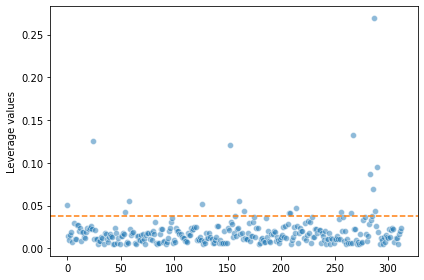

In [261]:
cutoff = 2*(len(predictors)+1)/len(house_98105)
influence = OLSInfluence(result_98105)
sns.scatterplot(data=pd.Series(influence.hat_matrix_diag), alpha=0.5)
plt.axhline(cutoff, linestyle='--', color='C1')
plt.ylabel('Leverage values')
plt.tight_layout()
plt.show()

##### Cook's distance
- Í¥ÄÏ∏°ÏπòÍ∞Ä ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌÅ¨Í∏∞ Ï∏°Ï†ï
- Ìï¥Îãπ Í¥ÄÏ∏°ÏπòÎ•º Ï†úÍ±∞Ìïú ÌöåÍ∑Ä Î™®Îç∏Í≥º, Í∑∏Î†áÏßÄ ÏïäÏùÄ ÌöåÍ∑ÄÎ™®Îç∏Ïùò Í¥ÄÏ∏°Ïπò Ï†ÅÌï© Í∞í ÎπÑÍµê
- 4/(n-p-1)Î≥¥Îã§ ÌÅ¥ Í≤ΩÏö∞ ÏòÅÌñ•Î†•Ïù¥ ÎÜíÎã§Í≥† ÌåêÎã®, 1Î≥¥Îã§ ÌÅ¨Î©¥ ÏòÅÌñ•ÏπòÎ°ú Í∞ÑÏ£º

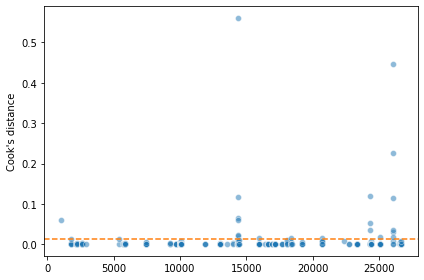

In [262]:
cutoff = 4/(len(house_98105)-len(predictors)-1)
sns.scatterplot(x=influence.cooks_distance[0].index, y=influence.cooks_distance[0].values, alpha=0.5)
# sns.scatterplot(x=influence.hat_matrix_diag, y=influence.resid_studentized_internal, size=100000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5) #
plt.axhline(cutoff, linestyle='--', color='C1')
plt.ylabel("Cook's distance")
plt.tight_layout()
plt.show()

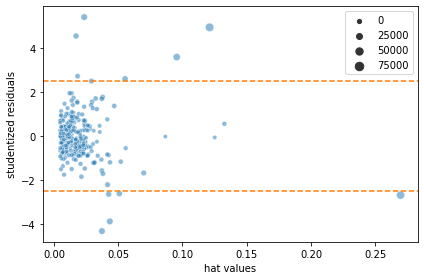

In [263]:
sns.scatterplot(x=influence.hat_matrix_diag, y=influence.resid_studentized_internal, size=100000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5) # Î†àÎ≤ÑÎ¶¨ÏßÄ / s-residual plot
plt.axhline(2.5, linestyle='--', color='C1')
plt.axhline(-2.5, linestyle='--', color='C1')
plt.xlabel('hat values')
plt.ylabel('studentized residuals')
plt.tight_layout()
plt.show()

In [264]:
### Ïø° Í±∞Î¶¨Í∞Ä cutoff Ïù¥ÏÉÅÏù∏ Í≤É Ï†úÍ±∞
mask = [abs(dist) < cutoff for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_infl)
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

Original  Influential removed
Intercept     -772549.862447       -644099.894427
SqFtTotLiving     209.602346           201.831088
SqFtLot            38.933315            42.587827
Bathrooms        2282.264145          1664.945299
Bedrooms       -26320.268796        -23734.888963
BldgGrade      130000.099737        111175.451630

##### DFFITS
- Difference in fits
- i Î≤àÏß∏ Í¥ÄÏ∏°Í∞íÏù¥ ÌöåÍ∑ÄÍ≥ÑÏàò Ï†ÑÏ≤¥Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Î†•ÏùÑ Ï∂îÏ†ïÌï®. i Î≤àÏß∏ Í¥ÄÏ∏°Í∞íÏùÑ Ï†úÍ±∞Ìï®ÏúºÎ°úÏç® ÌöåÍ∑ÄÍ≥ÑÏàòÏùò Ï∂îÏ†ïÍ∞íÏùò Î≥ÄÌôîÎ•º Ï∏°Ï†ï
- DFFIT ÌÜµÍ≥ÑÎüâÏùÄ i Î≤àÏß∏ Í¥ÄÏ∏°Í∞íÏùÑ Ï†úÍ±∞ÌïòÍ≥† Ï∂îÏ†ïÌïú ÌöåÍ∑ÄÎ™®ÌòïÏóêÏÑúÏùò i Î≤àÏß∏ ÏÑ§Î™ÖÎ≥ÄÏàòÏóê ÎåÄÌïú Ï†ÅÌï©Í∞í(yi(i) hat)ÏóêÏÑú Ï†ÑÏ≤¥ Í¥ÄÏ∏°Í∞íÏùÑ Í≥†Î†§Ìïú ÌöåÍ∑ÄÎ™®ÌòïÏóêÏÑúÏùò i Î≤àÏß∏ ÏÑ§Î™ÖÎ≥ÄÏàòÏóê ÎåÄÌïú Ï†ÅÌï©Í∞í(yi hat) Ï∞®Ïù¥Ïù¥Î©∞, Ïù¥Î•º ÌëúÏ§ÄÌôîÌïú DFFITS ÏÇ¨Ïö©
- 2 * sqrt((p+1)/n) Î≥¥Îã§ ÌÅ¨Î©¥ ÏòÅÌñ•Ïπò Í∞ÄÎä•ÏÑ± ÎÜíÏùå

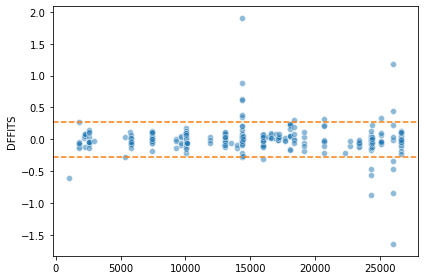

In [265]:
cutoff = 2*np.sqrt((len(predictors)+1)/len(house_98105))
sns.scatterplot(x=influence.dffits[0].index, y=influence.dffits[0].values, alpha=0.5)
plt.axhline(cutoff, linestyle='--', color='C1')
plt.axhline(-cutoff, linestyle='--', color='C1')
plt.ylabel("DFFITS")
plt.tight_layout()
plt.show()

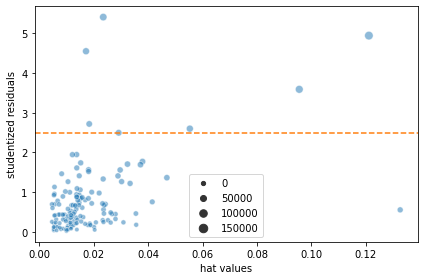

In [266]:
sns.scatterplot(x=influence.hat_matrix_diag, y=influence.resid_studentized_internal, size=100000 * np.sqrt(influence.dffits[0]), alpha=0.5)
plt.axhline(2.5, linestyle='--', color='C1')
plt.xlabel('hat values')
plt.ylabel('studentized residuals')

plt.tight_layout()
plt.show()

In [267]:
### DFFITS cutoffÎ•º ÎÑòÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
mask = [abs(dist) < cutoff for dist in influence.dffits[0]]
house_infl = house_98105.loc[mask]

ols_infl = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_infl)
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

Original  Influential removed
Intercept     -772549.862447       -644099.894427
SqFtTotLiving     209.602346           201.831088
SqFtLot            38.933315            42.587827
Bathrooms        2282.264145          1664.945299
Bedrooms       -26320.268796        -23734.888963
BldgGrade      130000.099737        111175.451630

##### DFBETAS
- i Î≤àÏß∏ Í¥ÄÏ∏°Í∞íÏù¥ Í∞ÅÍ∞ÅÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÏóê ÎÅºÏπòÎäî ÏòÅÌñ•Î†•ÏùÑ Ï∏°Ï†ï
- DFBETAÎäî Î™®Îì† Í¥ÄÏ∏°Í∞íÏùÑ Í≥†Î†§ Ìïú ÌõÑ Ï∂îÏ†ïÌïú ÌöåÍ∑ÄÍ≥ÑÏàòÏôÄ i Î≤àÏß∏ Í¥ÄÏ∏°Í∞íÏù¥ Ï†úÍ±∞Îêú Ïù¥ÌõÑ Í≥ÑÏÇ∞Îêú k Î≤àÏß∏ ÌöåÍ∑ÄÍ≥ÑÏàòÏùò Ï∞®Ïù¥Î•º ÎÇòÌÉÄÎÇ¥Îäî ÌÜµÍ≥ÑÎüâÏù¥Í≥†, Ïù¥Î•º ÌëúÏ§ÄÌôîÌïú Í≤ÉÏù¥ DFBETAS
- Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÎßàÎã§ Í∞íÏùÑ Íµ¨Ìï† Ïàò ÏûàÏùå
- Í∏∞Ï§ÄÍ∞íÏùÄ 2 ÎòêÎäî 2/sqrt(n)

In [268]:
influence.dfbetas.T.shape

(6, 313)

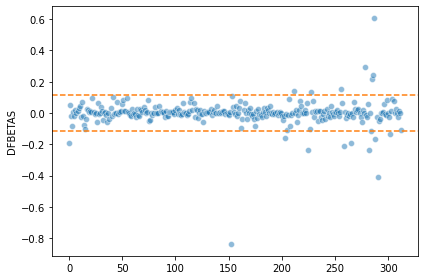

In [269]:
cutoff = 2/np.sqrt(len(house_98105))
sns.scatterplot(data=pd.Series(influence.dfbetas.T[0]), alpha=0.5) # Ï≤´ Î≤àÏß∏ Î≥ÄÏàò(SqFtTotLiving)Ïùò DFBETAS
plt.axhline(cutoff, linestyle='--', color='C1')
plt.axhline(-cutoff, linestyle='--', color='C1')
plt.ylabel("DFBETAS")
plt.tight_layout()
plt.show()

#### Residual distrubution
- Residual plots

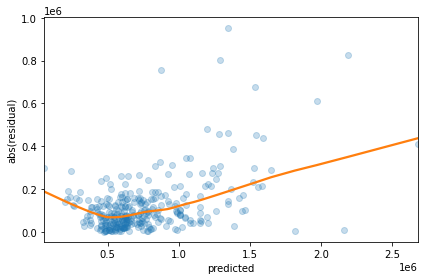

In [270]:
### Ïù¥Î∂ÑÏÇ∞ Ïò§Ï∞® ÌôïÏù∏
# ÏòàÏ∏° Í∞íÏóê Îî∞Î•∏ ÏûîÏ∞®Ïùò Î≥ÄÌôî ÌååÏïÖ
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid), scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'}, lowess=True)
plt.xlabel('predicted')
plt.ylabel('abs(residual)')
plt.tight_layout()
plt.show()

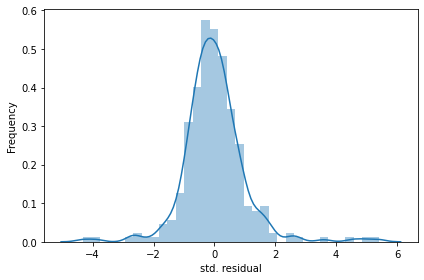

In [271]:
sns.distplot(pd.Series(influence.resid_studentized_internal)) # studentized ÏûîÏ∞® Î∂ÑÌè¨ ÌôïÏù∏
plt.xlabel('std. residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

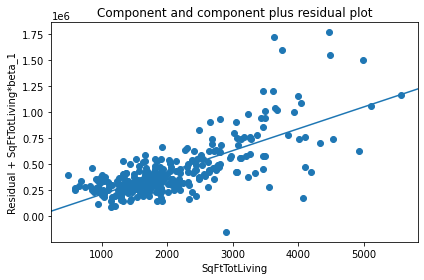

In [272]:
### Partial Residual plots
# partial residual = residual + biXi
# ÏòàÏ∏°Í∞íÍ≥º ÏûîÏ∞® Í≤∞Ìï©
# ÎπÑÏÑ†Ìòï ÌöåÍ∑Ä Í≥†Î†§
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving')

plt.tight_layout()
plt.show()

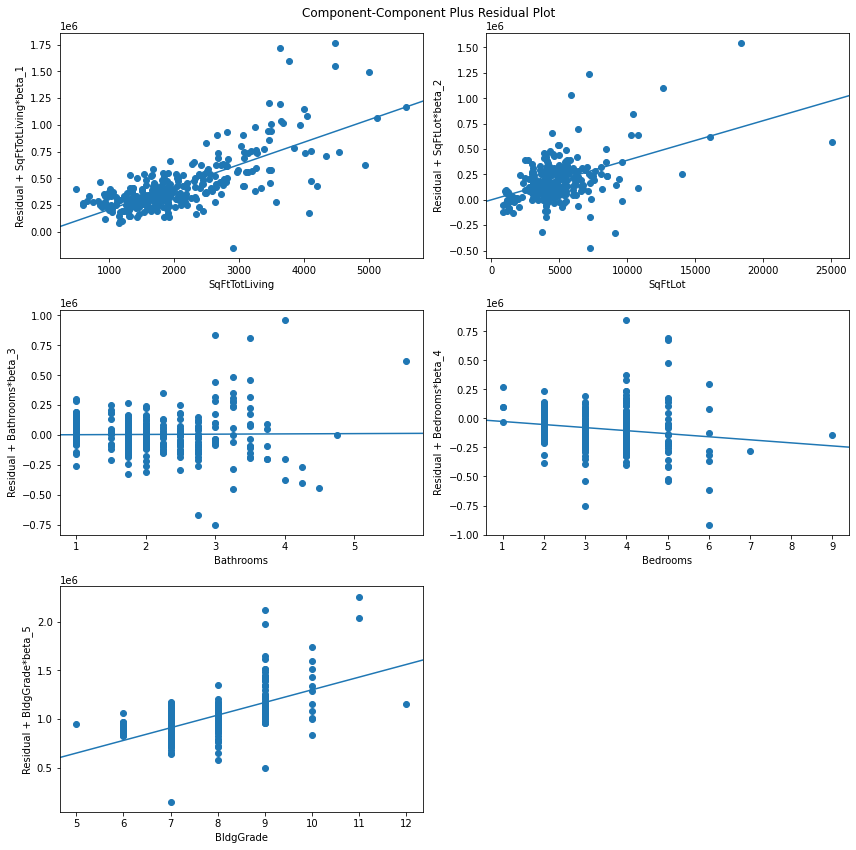

In [273]:
### Ï†ÑÏ≤¥ Partial residual plot
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_ccpr_grid(result_98105, fig=fig)
plt.show()

eval_env: 1


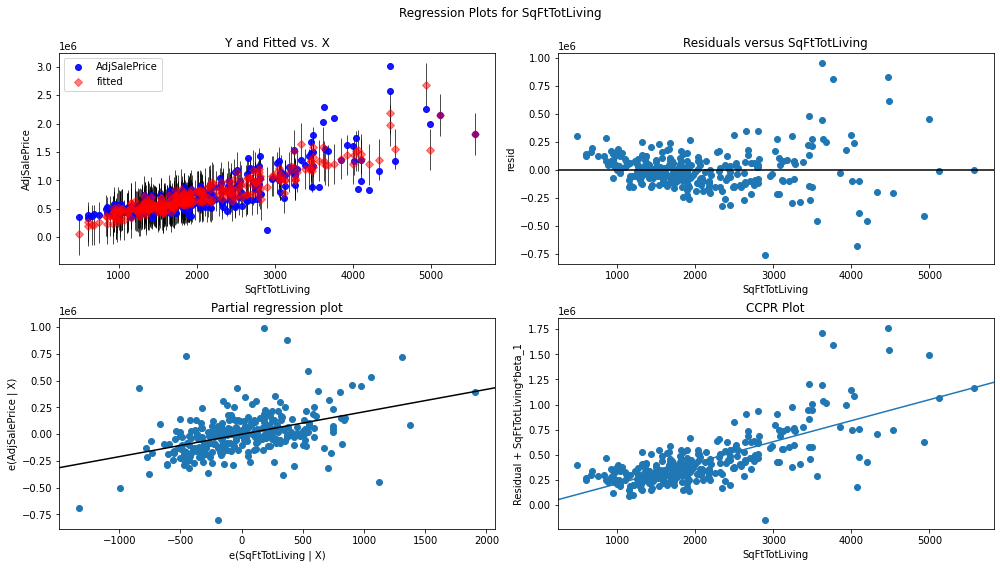

In [274]:
### Residual plot (detailed)
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result_98105, 'SqFtTotLiving', fig=fig) # Î≥ÄÏàòÎ™Ö ÎòêÎäî Î≥ÄÏàò Î≤àÌò∏ (1Î∂ÄÌÑ∞ ÏãúÏûë) ÏûÖÎ†•
plt.show()

## Robust-linear Regression

### (1) WLS Regression
- Weighted Least Square ÏÇ¨Ïö©
- Outlier ÏòÅÌñ•ÏùÑ Îçú Î∞õÏúºÎ©∞, Ïò§Ï∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ±Ïù¥ ÎßåÏ°±ÎêòÏßÄ ÏïäÏùÑ Îïå Î≥¥Ï†ïÏùÑ ÏúÑÌï¥ Ï£ºÎ°ú ÏÇ¨Ïö©

In [275]:
bp = pd.read_csv('./data/blood_pressure.csv')
bp.head()

Age  DBP
0   27   73
1   21   66
2   22   63
3   24   75
4   25   71

In [276]:
slm = smf.ols('DBP ~ Age', data=bp).fit() ## Îã®ÏàúÏÑ†ÌòïÌöåÍ∑ÄÎ™®Ìòï Ï†ÅÌï©

### Í∞ÄÏ§ëÏπò Ï∏°Ï†ï
bp['Abs_Residual'] = abs(slm.resid)
std_fit = smf.ols('Abs_Residual ~ Age', data=bp).fit() ## ÏûîÏ∞®Ïùò Ï†àÎåÄÍ∞í ~ Ïó∞Î†π

wls_fit = smf.wls('DBP ~ Age', data=bp, weights = 1/np.square(std_fit.fittedvalues)).fit()
wls_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    DBP   R-squared:                       0.521
Model:                            WLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     56.64
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           7.19e-10
Time:                        23:07:18   Log-Likelihood:                -181.26
No. Observations:                  54   AIC:                             366.5
Df Residuals:                      52   BIC:                             370.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.5658      2.521     22.042      0.000      50.507      60.624
Age            0.5963      0.079      7.526      0.000       0.437       0.755
==============================================================================
Omnibus:                        7.974   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                2.701
Skew:                           0.122   Prob(JB):                        0.259
Kurtosis:                       1.932   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

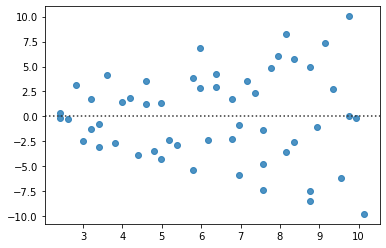

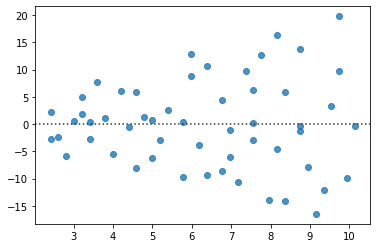

In [277]:
# Ïò§Ï∞® Í≤ΩÌñ•ÏÑ± ÏôÑÌôî
sns.residplot(x=std_fit.predict(bp['Age']), y=std_fit.resid)
plt.show()

sns.residplot(x=std_fit.predict(bp['Age']), y=wls_fit.resid)
plt.show()

### (2) Huber Regression
- Huber loss fuction ÏÇ¨Ïö©

In [278]:
boston = pd.read_csv('./data/housing.csv')
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [279]:
x = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [280]:
# The predictor variables should include a constant term.
x = sm.add_constant(x)

# Fit the robust regression model
robust_model = sm.RLM(y, x, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   MEDV   No. Observations:                  506
Model:                            RLM   Df Residuals:                      492
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 29 Oct 2023                                         
Time:                        23:07:18                                         
No. Iterations:                    30                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9275      3.744      5.056      0.000      11.590      26.265
CRIM          -0.1058      0.024     -4.390      0.000      -0.153      -0.059
ZN             0.0352      0.010      3.496      0.000       0.015       0.055
INDUS      -3.553e-05      0.045     -0.001      0.999      -0.088       0.088
CHAS           1.6097      0.632      2.547      0.011       0.371       2.848
NOX          -10.3676      2.802     -3.700      0.000     -15.860      -4.876
RM             5.0559      0.307     16.491      0.000       4.455       5.657
AGE           -0.0234      0.010     -2.412      0.016      -0.042      -0.004
DIS           -1.1057      0.146     -7.557      0.000      -1.392      -0.819
RAD            0.1957      0.049      4.021      0.000       0.100       0.291
TAX           -0.0112      0.003     -4.058      0.000      -0.017      -0.006
PTRATIO       -0.7722      0.096     -8.046      0.000      -0.960      -0.584
B              0.0110      0.002      5.585      0.000       0.007       0.015
LSTAT         -0.3418      0.037     -9.187      0.000      -0.415      -0.269
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### (5) Quantile Regression
- Ï°∞Í±¥Î∂Ä Î∂ÑÏúÑÏàòÎ•º Î™®Îç∏ÎßÅ
- ÏÑ†Ìòï ÌöåÍ∑Ä Ï°∞Í±¥Ïù¥ Ï∂©Ï°±ÎêòÏßÄ ÏïäÏùÑ Îïå ÏÇ¨Ïö©ÎêòÎäî ÏÑ†Ìòï ÌöåÍ∑ÄÏùò ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ï
- Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏïÑ Ïù¥Ïóê ÎåÄÌïú ÏòÅÌñ•ÏùÑ Ï§ÑÏù∏ ÏÑ†Ìòï ÌöåÍ∑ÄÏÑ†ÏùÑ Íµ¨Ìï† Ïàò ÏûàÍ≥†, Ïù¥Î∂ÑÏÇ∞ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ÎßÅÎèÑ Í∞ÄÎä•
- Ï†ê Ï∂îÏ†ïÏù¥ ÏïÑÎãå Íµ¨Í∞ÑÏ∂îÏ†ïÏùÑ ÌÜµÌï¥ Í≤∞Í≥ºÏùò Ï†ïÌôïÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏùå

In [281]:
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

q_df = x.copy()
q_df['y'] = pd.Series(y)

In [282]:
qs = [0.1, 0.25, 0.5, 0.75, 0.9]
intercepts = []
slopes = []
pred_dict = dict()
for q in qs:
    quantile_reg = smf.quantreg('y ~ ' + (' + '.join(list(x.columns))), q_df).fit(q=q)
    pred_dict[q] = quantile_reg.predict(x)
    
pred_df = pd.concat([pd.DataFrame(pred_dict).reset_index(drop=True), q_df['y'].reset_index(drop=True)], axis=1)
pred_df.head()

0.1        0.25         0.5        0.75         0.9      y
0  114.389089  160.512754  203.995040  250.617046  286.236587  151.0
1   33.529759   54.411765   74.999999   79.408675  114.958581   75.0
2  104.742620  141.000000  174.844178  208.955978  247.041323  141.0
3   75.182544  116.052301  165.542551  218.154601  249.463834  206.0
4   54.849095   91.124629  135.293448  157.830135  199.391970  135.0

In [283]:
### 0.5 quantile regression summary
quantile_reg = smf.quantreg('y ~ ' + (' + '.join(list(x.columns))), q_df).fit(q=0.5)
quantile_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3383
Model:                       QuantReg   Bandwidth:                       34.91
Method:                 Least Squares   Sparsity:                        140.3
Date:                Sun, 29 Oct 2023   No. Observations:                  442
Time:                        23:07:18   Df Residuals:                      431
                                        Df Model:                           10
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.8520      3.336     45.517      0.000     145.295     158.409
age            9.3919     77.386      0.121      0.903    -142.709     161.493
sex         -326.3453     79.294     -4.116      0.000    -482.196    -170.494
bmi          465.8559     86.173      5.406      0.000     296.484     635.228
bp           407.0552     84.733      4.804      0.000     240.513     573.597
s1          -856.7186    539.681     -1.587      0.113   -1917.453     204.016
s2           414.4578    439.111      0.944      0.346    -448.608    1277.524
s3           147.1359    275.268      0.535      0.593    -393.899     688.171
s4           257.9128    209.140      1.233      0.218    -153.149     668.975
s5           762.2344    222.644      3.424      0.001     324.631    1199.838
s6            50.7769     85.462      0.594      0.553    -117.196     218.750
==============================================================================
"""

In [284]:
### Least Absoloue Deviations (LAD) Regression

In [285]:
### Iteratively Reweighted Least Squares (IRLS) Regression

In [286]:
### Least Median of Squares (LMS) Regression 

## Non-linear Regression

### (1) Polymonial Regression
- Îã§Ìï≠ Ìï®Ïàò Ï∂îÍ∞Ä

In [287]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [5, 3, 2, 3, 4, 6, 10, 12, 18]})
df

x   y
0  1   5
1  2   3
2  3   2
3  4   3
4  5   4
5  6   6
6  7  10
7  8  12
8  9  18

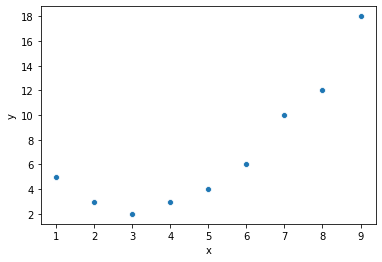

In [288]:
x = df['x']
y = df['y']

sns.scatterplot(x=x, y=y)
plt.show()

In [289]:
model = smf.ols(formula="y ~ x", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sun, 29 Oct 2023   Prob (F-statistic):            0.00445
Time:                        23:07:19   Log-Likelihood:                -21.732
No. Observations:                   9   AIC:                             47.46
Df Residuals:                       7   BIC:                             47.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1667      2.230     -0.523      0.617      -6.439       4.106
x              1.6333      0.396      4.122      0.004       0.696       2.570
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.008
Skew:                           0.668   Prob(JB):                        0.604
Kurtosis:                       2.051   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

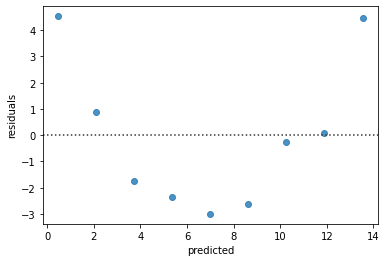

In [290]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = result.predict(x)
plot_df["residuals"] = result.resid

sns.residplot(data=plot_df, x="predicted", y="residuals") # 2Ï∞®ÏãùÏù¥ ÌïÑÏöîÌï¥ Î≥¥Ïù∏Îã§.
plt.show()

In [291]:
x_sq = x**2
df['x_sq'] = x_sq

In [292]:
model = smf.ols(formula="y ~ x + x_sq", data=df)
result = model.fit()

y_pred = result.predict(x)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.05e-06
Time:                        23:07:19   Log-Likelihood:                -6.6251
No. Observations:                   9   AIC:                             19.25
Df Residuals:                       6   BIC:                             19.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1667      0.787      9.103      0.000       5.240       9.093
x             -2.9121      0.361     -8.056      0.000      -3.797      -2.028
x_sq           0.4545      0.035     12.893      0.000       0.368       0.541
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   3.026
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.023
Skew:                          -0.122   Prob(JB):                        0.989
Kurtosis:                       2.962   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

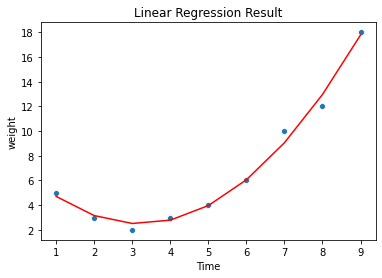

In [293]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red') ## ÌöåÍ∑ÄÏßÅÏÑ† Ï∂îÍ∞Ä 
plt.xlabel('Time', fontsize=10)
plt.ylabel('weight',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

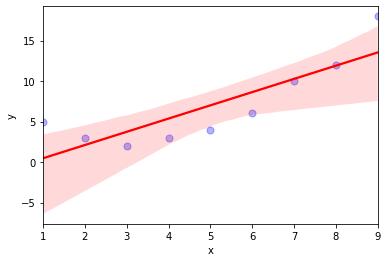

In [294]:
sns.regplot(x=x, y=y, scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplotÏúºÎ°ú ÌïúÏ§Ñ Ïã§Ìñâ
plt.show()

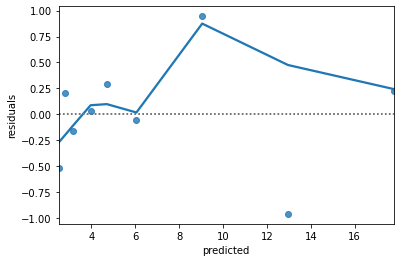

In [295]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = result.predict(x)
plot_df["residuals"] = result.resid

sns.residplot(data=plot_df, x="predicted", y="residuals", lowess=True)
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [296]:
### house data before
# 2Ï∞®Ìï≠ Ï∂îÍ∞Ä
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + np.power(SqFtTotLiving, 2) + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          9.95e-106
Time:                        23:07:19   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving                  7.4521     55.418      0.134      0.893    -101.597     116.501
np.power(SqFtTotLiving, 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                       32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms                  -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms                   -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade                   1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

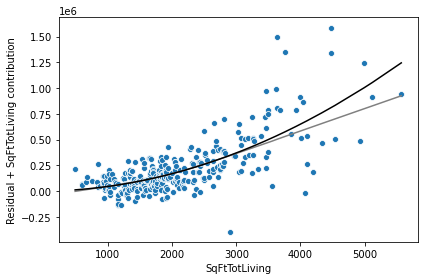

0.03879128168230191


In [297]:
def partialResidualPlot(model, df, outcome, feature):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    sns.scatterplot(x=results.feature, y = results.ypartial + results.residual)
    sns.lineplot(x=smoothed[:, 0], y=smoothed[:, 1], color='gray') # spline line
    sns.lineplot(x=results.feature, y=results.ypartial, color='black')
    plt.xlabel(feature)
    plt.ylabel(f'Residual + {feature} contribution')

partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving')

plt.tight_layout()
plt.show()
print(result_poly.params[2])

### (2) Spline Regression
- Îã§Ìï≠ Íµ¨Í∞ÑÎì§ÏùÑ Î∂ÄÎìúÎü¨Ïö¥ Í≥°ÏÑ† ÌòïÌÉúÎ°ú Ï†ÅÌï©
- Knot: Spline Íµ¨Í∞ÑÏùÑ Íµ¨Î∂ÑÌïòÎäî Í∞í

In [298]:
### house data - continued
model_spline = smf.ols(formula='AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105) # b-spline added
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          7.10e-104
Time:                        23:07:20   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -4.142e+05   1.43e+05     -2.899      0.004   -6.95e+05   -1.33e+05
bs(SqFtTotLiving, df=6, degree=3)[0] -1.995e+05   1.86e+05     -1.076      0.283   -5.65e+05    1.66e+05
bs(SqFtTotLiving, df=6, degree=3)[1] -1.206e+05   1.23e+05     -0.983      0.326   -3.62e+05    1.21e+05
bs(SqFtTotLiving, df=6, degree=3)[2] -7.164e+04   1.36e+05     -0.525      0.600    -3.4e+05    1.97e+05
bs(SqFtTotLiving, df=6, degree=3)[3]  1.957e+05   1.62e+05      1.212      0.227   -1.22e+05    5.14e+05
bs(SqFtTotLiving, df=6, degree=3)[4]  8.452e+05   2.18e+05      3.878      0.000    4.16e+05    1.27e+06
bs(SqFtTotLiving, df=6, degree=3)[5]  6.955e+05   2.14e+05      3.255      0.001    2.75e+05    1.12e+06
SqFtLot                                 33.3258      5.454      6.110      0.000      22.592      44.059
Bathrooms                            -4778.2080   1.94e+04     -0.246      0.806    -4.3e+04    3.34e+04
Bedrooms                             -5778.7045   1.32e+04     -0.437      0.663   -3.18e+04    2.03e+04
BldgGrade                             1.345e+05   1.52e+04      8.842      0.000    1.05e+05    1.64e+05
==============================================================================
Omnibus:                       58.816   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.021
Skew:                           0.330   Prob(JB):                    8.51e-136
Kurtosis:                       9.874   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

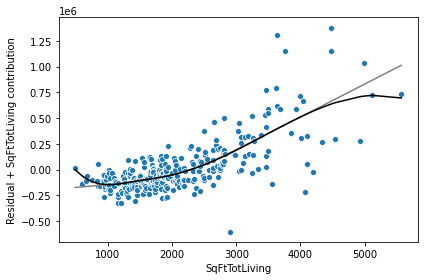

In [299]:
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving')
plt.tight_layout()
plt.show()

In [300]:
from statsmodels.gam.api import GLMGam, BSplines

In [301]:
### Generalized Additive Models
# Spline ÌöåÍ∑ÄÎ•º Ï∞æÎäî Îç∞ ÏÇ¨Ïö©Í∞ÄÎä•
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

x_spline = house_98105[predictors]
bs = BSplines(x_spline, df=[10] + [3] * 4, degree=[3] + [2] * 4)

# penalization weight
alpha = np.array([0] * 5)

formula = 'AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade'
gam_sm = GLMGam.from_formula(formula, data=house_98105, smoother=bs, alpha=alpha)
res_sm = gam_sm.fit()
print(res_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AdjSalePrice   No. Observations:                  313
Model:                         GLMGam   Df Residuals:                   295.00
Model Family:                Gaussian   Df Model:                        17.00
Link Function:               identity   Scale:                      2.7471e+10
Method:                         PIRLS   Log-Likelihood:                -4196.6
Date:                Sun, 29 Oct 2023   Deviance:                   8.1039e+12
Time:                        23:07:22   Pearson chi2:                 8.10e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.481e+05   1.18e+05  

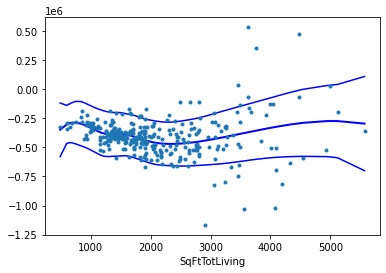

In [302]:
res_sm.plot_partial(0, cpr=True);

### (3) Logistic Regression
- Statistics version
- ÏûîÏ∞® Î∂ÑÏÑùÏùÄ ÏàòÌñâÌïòÏßÄ ÏïäÏïÑÎèÑ Îê®

In [303]:
test_result = pd.read_csv("./stats_for_python/6-3-1-logistic-regression.csv")
test_result.head(3)

hours  result
0      0       0
1      0       0
2      0       0

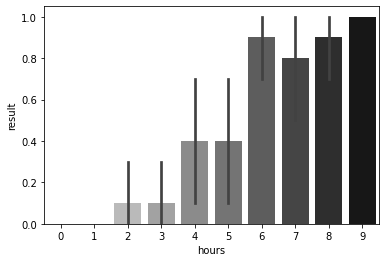

In [304]:
# Í≥µÎ∂ÄÏãúÍ∞Ñ Î≥Ñ ÏãúÌóò Ìï©Í≤©Î•†
sns.barplot(x="hours", y="result", data=test_result, palette='gray_r')
plt.show()

In [305]:
# Í≥µÎ∂Ä ÏãúÍ∞Ñ Îãπ Ìï©Í≤©Î•†
test_result.groupby("hours").mean()

result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0

In [306]:
# Modeling
mod_glm = smf.glm(formula = "result ~ hours", data=test_result, family=sm.families.Binomial()).fit()
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 29 Oct 2023   Deviance:                       68.028
Time:                        23:07:22   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [307]:
### NullÍ≥º AIC ÎπÑÍµê
# Null Model
mod_glm_null = smf.glm("result ~ 1", data=test_result, family=sm.families.Binomial()).fit()
print("Null Î™®Îç∏:", mod_glm_null.aic.round(3))
print("Î≥ÄÏàòÍ∞Ä ÏûàÎäî Î™®Îç∏:", mod_glm.aic.round(3))

Null Î™®Îç∏: 139.989
Î≥ÄÏàòÍ∞Ä ÏûàÎäî Î™®Îç∏: 72.028


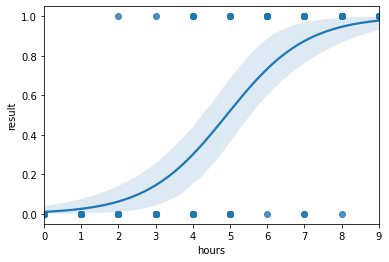

In [308]:
# plot logistic regression curve
sns.regplot(x='hours', y='result', data=test_result, logistic=True, ci=95)
plt.show()

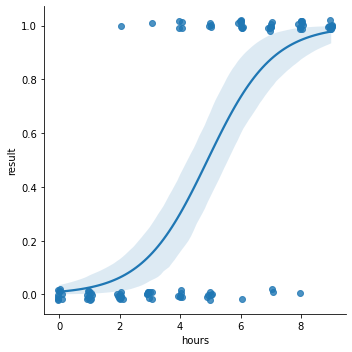

In [309]:
# lmplot ÌöåÍ∑Ä Í≥°ÏÑ†
sns.lmplot(x="hours", y="result", data=test_result, logistic=True, x_jitter=0.1, y_jitter=0.02)
plt.show()

In [310]:
# Ìï©Í≤© ÌôïÎ•† ÏòàÏ∏°
pred = mod_glm.predict(pd.DataFrame({"hours": np.arange(0, 10, 1)}))
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [311]:
### Odds ratio Í≥ÑÏÇ∞
# Í≥µÎ∂ÄÏãúÍ∞Ñ 1ÏãúÍ∞ÑÏùº ÎïåÏùò Ìï©Í≤©Î•†
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# Í≥µÎ∂ÄÏãúÍ∞Ñ 2ÏãúÍ∞ÑÏùº ÎïåÏùò Ìï©Í≤©Î•†
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

# Odds
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# Log Odds ratio -> Parameter
np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [312]:
mod_glm.params["hours"]

0.9288901756284967

In [313]:
### Pearson Residual
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

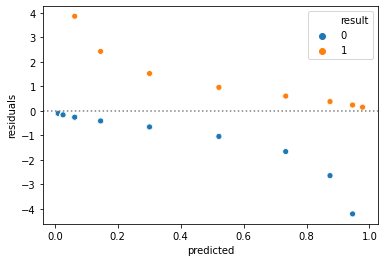

In [314]:
plot_df = pd.DataFrame()
plot_df["predicted"] = mod_glm.predict(test_result['hours'])
plot_df["residuals"] = mod_glm.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=test_result['result'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [315]:
### Pearson chi-square statistic
mod_glm.pearson_chi2

84.91138782569999

In [316]:
np.sum(mod_glm.resid_pearson**2)

84.91138782569999

In [317]:
### Deviance Residual
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

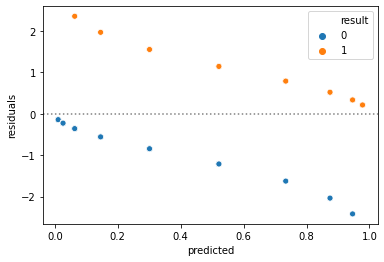

In [318]:
plot_df["residuals"] = mod_glm.resid_deviance

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=test_result['result'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [319]:
### Deviance statistic
# summaryÏùò Deviance Í∞íÍ≥º ÏùºÏπò
# logisticÏóêÏÑúÎäî cross-entropy Í∞úÎÖêÍ≥º ÎèôÏùº
np.sum(mod_glm.resid_deviance ** 2)

68.02788118117269

In [320]:
### Logit function Ïù¥Ïö©Ìïú Î∂ÑÏÑù
logit = sm.Logit(test_result['result'], test_result['hours']).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.636798
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.077   
Dependent Variable: result           AIC:              129.3595
Date:               2023-10-29 23:07 BIC:              131.9647
No. Observations:   100              Log-Likelihood:   -63.680 
Df Model:           0                LL-Null:          -68.994 
Df Residuals:       99               LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
-----------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
hours       0.1330     0.0419   3.1756   0.0015   0.0509   0.2151
===============================================================

"""

In [321]:
### Odds ratio
np.exp(logit.params)

hours    1.142245
dtype: float64

In [322]:
### Multiple Logistic - Cars data
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  mpg_sqrt  
Mazda RX4             4  4.582576  
Mazda RX4 Wag         4  4.582576  
Datsun 710            1  4.774935  
Hornet 4 Drive        1  4.626013  
Hornet Sportabout     2  4.324350

In [323]:
model = smf.glm(formula="vs ~ mpg + am", data=mtcars, family=sm.families.Binomial())
results = model.fit()

print(results.summary()) # coefÏóê ÎåÄÌï¥ÏÑúÎäî wald test Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§å

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     vs   No. Observations:                   32
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.323
Date:                Sun, 29 Oct 2023   Deviance:                       20.646
Time:                        23:07:25   Pearson chi2:                     20.2
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5159
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7051      4.625     -2.747      0.0

In [324]:
results.aic

26.64629286928622

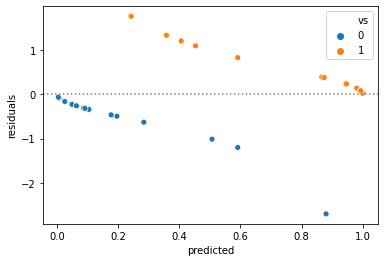

In [325]:
plot_df = pd.DataFrame()
plot_df["predicted"] = results.predict(mtcars.loc[:, ['mpg', 'am']])
plot_df["residuals"] = results.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=mtcars['vs'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [326]:
results.cov_params()

Intercept       mpg        am
Intercept  21.392589 -1.155050  4.406337
mpg        -1.155050  0.063693 -0.267584
am          4.406337 -0.267584  2.558336

### (4) Poisson Regression
- Statistics version
- Ïó∞ÏÜçÌòï Î≥ÄÏàòÍ∞Ä Ïπ¥Ïö¥Ìä∏(Í∞úÏàò, ÎπàÎèÑ) Î≥ÄÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ• ÌååÏïÖ
- Pearson chi-sq, deviance ÌÜµÍ≥ÑÎüâ Í≤ÄÏ†ïÏóêÏÑú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ ÏïäÏúºÎ©¥ Î™®Îç∏Ïù¥ Ïú†ÏùòÌï® (H0: ÌöåÍ∑ÄÎ™®Îç∏Ïù¥ Ïú†Ìö®ÌïòÎã§)

In [327]:
# Îß•Ï£º ÌåêÎß§ Í∞úÏàò ÏòàÏ∏°
beer = pd.read_csv("./stats_for_python/6-5-1-poisson-regression.csv")
beer.head(3)

beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0

In [328]:
# Modeling
mod_pois = smf.glm("beer_number ~ temperature", beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 29 Oct 2023   Deviance:                       5.1373
Time:                        23:07:25   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [329]:
### Pearson chi-sq test
pstats = ((beer['beer_number'] - mod_pois.fittedvalues)**2/mod_pois.fittedvalues).sum()
pval = 1 - stats.chi2.cdf(pstats, mod_pois.df_resid)
print('pstats:', pstats, ", p-value:", pval)

pstats: 5.4047036003047575 , p-value: 0.9999989639266061


In [330]:
### Deviance test
dstats = (np.log(beer['beer_number']/mod_pois.fittedvalues)*beer['beer_number']).sum()*2 - (beer['beer_number'] - mod_pois.fittedvalues).sum()*2
pval = (1 - stats.chi2.cdf(dstats, mod_pois.df_resid))**2
print('dstats:', dstats, ", p-value:", pval)

dstats: 5.1372626625991495 , p-value: 0.999998848203124


In [331]:
stats.chi2.cdf(pstats, mod_pois.df_resid)

1.036073393842833e-06

In [332]:
### NullÍ≥º AIC ÎπÑÍµê
# Null Model
mod_pois_null = smf.glm("beer_number ~ 1", data=beer, family=sm.families.Poisson()).fit()
print("Null Î™®Îç∏:", mod_pois_null.aic.round(3))
print("Î≥ÄÏàòÍ∞Ä ÏûàÎäî Î™®Îç∏:", mod_pois.aic.round(3))

Null Î™®Îç∏: 223.363
Î≥ÄÏàòÍ∞Ä ÏûàÎäî Î™®Îç∏: 119.343


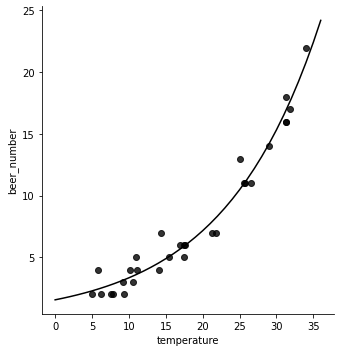

In [333]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(pd.DataFrame({"temperature": x_plot}))

sns.lmplot(y="beer_number", x="temperature", data=beer, fit_reg = False,
          scatter_kws = {"color":"black"})
sns.lineplot(x=x_plot, y=pred, color="black")
plt.show()

In [334]:
# Í∏∞Ïò®Ïù¥ 1ÎèÑÏùº Îïå ÌåêÎß§ Í∞úÏàò Í∏∞ÎåìÍ∞í
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# Í∏∞Ïò®Ïù¥ 2ÎèÑÏùº Îïå ÌåêÎß§ Í∞úÏàò Í∏∞ÎåìÍ∞í
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# ÎπÑÏú® ÌôïÏù∏
pred_2 / pred_1

0    1.079045
dtype: float64

In [335]:
np.exp(mod_pois.params["temperature"])

1.079045054586893

### (5) Probit Regression
- Dose-Response analysis
- Ï†ïÍ∑úÎ∂ÑÌè¨ ÎàÑÏ†ÅÌôïÎ•†Î≥ÄÏàòÎ•º Ïù¥Ïö©Ìïú Ïù¥ÏßÑ Î∂ÑÎ•ò
- Ïù¥ÏßÑ Î≥ÄÏàò yÎäî Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ï

In [336]:
hmda = pd.read_csv("./r_csv/AER/HMDA.csv", index_col="Unnamed: 0")
hmda.head()

deny  pirat  hirat     lvrat  chist  mhist phist  unemp selfemp insurance  \
1   no  0.221  0.221  0.800000      5      2    no    3.9      no        no   
2   no  0.265  0.265  0.921875      2      2    no    3.2      no        no   
3   no  0.372  0.248  0.920398      1      2    no    3.2      no        no   
4   no  0.320  0.250  0.860465      1      2    no    4.3      no        no   
5   no  0.360  0.350  0.600000      1      1    no    3.2      no        no   

  condomin afam single hschool  
1       no   no     no     yes  
2       no   no    yes     yes  
3       no   no     no     yes  
4       no   no     no     yes  
5       no   no     no     yes

In [337]:
hmda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 1 to 2380
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deny       2380 non-null   object 
 1   pirat      2380 non-null   float64
 2   hirat      2380 non-null   float64
 3   lvrat      2380 non-null   float64
 4   chist      2380 non-null   int64  
 5   mhist      2380 non-null   int64  
 6   phist      2380 non-null   object 
 7   unemp      2380 non-null   float64
 8   selfemp    2380 non-null   object 
 9   insurance  2380 non-null   object 
 10  condomin   2380 non-null   object 
 11  afam       2380 non-null   object 
 12  single     2380 non-null   object 
 13  hschool    2380 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 278.9+ KB


In [338]:
hmda["deny_binary"] = hmda["deny"].apply(lambda x: 1 if x=="yes" else 0)

In [339]:
from statsmodels.discrete.discrete_model import Probit

In [340]:
x = hmda["pirat"]
x = sm.add_constant(x)
y = hmda["deny_binary"]

probit = Probit(y, x).fit()
probit.summary()

Optimization terminated successfully.
         Current function value: 0.349493
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:            deny_binary   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2378
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                 0.04620
Time:                        23:07:25   Log-Likelihood:                -831.79
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.783e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1942      0.129    -17.010      0.000      -2.447      -1.941
pirat          2.9679      0.359      8.265      0.000       2.264       3.672
==============================================================================
"""

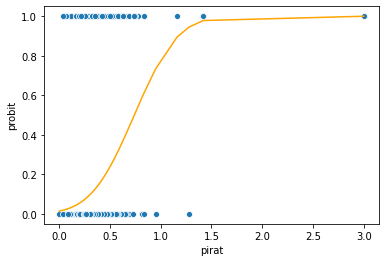

In [341]:
## ÏãúÍ∞ÅÌôî
hmda["probit"]= probit.predict(x)

plt.xlabel("pirat")
plt.ylabel("deny")
sns.scatterplot(x=hmda["pirat"], y=hmda["deny_binary"])
sns.lineplot(data=hmda, x="pirat", y="probit", color='orange')
plt.show()

In [342]:
## new_data
pirat = np.array([0.3, 0.4])
const = np.array([1, 1])

x_new = pd.DataFrame([const, pirat]).T
x_new.columns = ["const", "pirat"]
probit.predict(x_new).diff()[1] ### 0.3 -> 0.4Î°ú Í∞à ÎïåÏùò deny ÌôïÎ•† Î≥ÄÌôî

0.060815194105097836

In [343]:
### RaceÏùò deny ÏòÅÌñ•ÎèÑ
hmda["black"] = hmda["afam"].apply(lambda x :1 if x=="yes" else 0)

x2 = hmda[["pirat", "black"]]
x2 = sm.add_constant(x2)

probit2 = Probit(y, x2).fit()
probit2.summary()

Optimization terminated successfully.
         Current function value: 0.334931
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:            deny_binary   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                 0.08594
Time:                        23:07:27   Log-Likelihood:                -797.14
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.818e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2587      0.130    -17.391      0.000      -2.513      -2.004
pirat          2.7416      0.360      7.624      0.000       2.037       3.446
black          0.7082      0.083      8.488      0.000       0.545       0.872
==============================================================================
"""

In [344]:
## new_data
black =np.array([0, 1])
pirat =np.array([0.3, 0.3])
const = np.array([1, 1])

x_new = pd.DataFrame([const, pirat, black]).T
x_new.columns = ["const", "pirat", "black"]
probit2.predict(x_new).diff()[1] ### black Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌôïÎ•† Î≥ÄÌôî

0.15781349122942923

### (6) Isotonic Regression
- xÍ∞Ä Ïª§Ïßà Îïå yÎèÑ Í∞ôÏù¥ Ïª§ÏßÄÎäî(monotonous increase) Í≤ΩÏö∞

In [345]:
n = 20
x = np.arange(n)
print('Input:\n',x)
y = np.random.randint(0, 20, size=n) + 10 * np.log1p(np.arange(n))
print("Target :\n",y)

Input:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Target :
 [ 8.         21.93147181 20.98612289 27.86294361 26.09437912 24.91759469
 36.45910149 30.79441542 35.97224577 34.02585093 24.97895273 42.8490665
 44.64949357 33.3905733  35.08050201 41.72588722 38.33213344 47.90371758
 29.44438979 32.95732274]


In [346]:
from sklearn.isotonic import IsotonicRegression

In [347]:
ir = IsotonicRegression() 
  
# Fit isotonic regression model
y_ir = ir.fit_transform(x, y) # fit the model and transform the data
print('Isotonic Regression Predictions  :\n', y_ir)

Isotonic Regression Predictions  :
 [ 8.         21.45879735 21.45879735 26.29163914 26.29163914 26.29163914
 32.44611327 32.44611327 32.44611327 32.44611327 32.44611327 38.48145402
 38.48145402 38.48145402 38.48145402 38.48145402 38.48145402 38.48145402
 38.48145402 38.48145402]


In [348]:
from matplotlib.collections import LineCollection

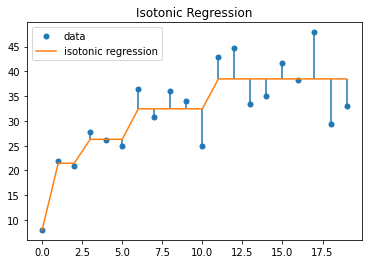

In [349]:
lines=[[[i,y[i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
# plt.figure(figsize=(10,4))
plt.plot(x, y, '.', markersize=10, label='data')
plt.plot(x, y_ir, '-', markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

### (7) Bayesian Regression
- Likeilhood (Í¥ÄÏ∏°Í∞íÏóêÏÑú Î™®Îç∏Ïù¥ Í∞ÄÏßÄÎäî Í∞ÄÎä•ÎèÑ)Î•º ÏµúÏÜåÌôîÌïòÎäî ÌöåÍ∑ÄÏãù ÎèÑÏ∂ú
- MCMC (Markov Chain Monte Carlo): Markov ChainÏùÑ Ïù¥Ïö©ÌïòÎäî ÌëúÎ≥∏ ÏÉùÏÑ± Î∞©Î≤ï
    - Ïñ¥Îñ§ ÏÉÅÌÉúÍ∞Ä ÎÅäÏûÑÏóÜÏù¥ ÏõÄÏßÅÏù¥Í≥† ÏûàÎäî Ï≤¥Ïù∏ ÏÉÅÌÉúÏùò ÏÉòÌîåÎßÅ
    - Markov ChainÏù∏Ïùò ÏàòÎ†¥Î∂ÑÌè¨Í∞Ä ÏõêÌïòÎäî Î∂ÑÌè¨ ùëù(ùë•)Í∞Ä ÎêòÎèÑÎ°ù ÌïòÎäî ÎßàÏΩîÌîÑ Ï≤¥Ïù∏ÏùÑ ÎßåÎì§Í≥† Ïù¥ ÎßàÏΩîÌîÑ Ï≤¥Ïù∏ÏùÑ ùë°‚Ä≤ÏãúÍ∞Ñ Ïù¥ÏÉÅ Í∞ÄÎèôÌïòÎ©¥ Í∑∏ Îã§ÏùåÎ∂ÄÌÑ∞Îäî ÏõêÌïòÎäî Î∂ÑÌè¨Ïùò ÌëúÎ≥∏ÏùÑ ÏñªÏùÑ Ïàò ÏûàÏùå
    - Metropolis-Hastings(MH) ÏïåÍ≥†Î¶¨Ï¶ò
        - ÏÇ¨Ï†ÑÎ∂ÑÌè¨Î•º Ï†úÏïàÌïòÍ≥†, ÌòÑÏû¨ ÏÉòÌîåÎßÅ ÌååÎùºÎØ∏ÌÑ∞ Œ∏tÍ∞Ä Îã§Ïùå ÏÉòÌîå Œ∏new Î°ú Ï†ÑÏù¥Îê† ÌôïÎ•†ÏùÑ ÏÇ¨ÌõÑÌôïÎ•†Ïùò ÎπÑÎ°ú Í≤∞Ï†ï
    - ÏàòÌñâ Îã®Í≥Ñ
        - ÌòÑÏû¨ ÏúÑÏπòÏóêÏÑú ÏãúÏûëÌïúÎã§
        - ÏÉàÎ°ú Ïù¥ÎèôÌï† ÏúÑÏπòÎ•º Ï°∞ÏÇ¨ÌïúÎã§ ‚Üí Ï£ºÎ≥ÄÏùò sampleÏùÑ Ï°∞ÏÇ¨
        - Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÇ¨Ï†ÑÌôïÎ•†Î∂ÑÌè¨Ïóê Îî∞Î•∏ ÏúÑÏπòÎ•º Î∞îÌÉïÏúºÎ°ú ÏÉàÎ°úÏö¥ ÏúÑÏπòÎ•º ÏàòÏö©ÌïòÍ±∞ÎÇò Í∏∞Í∞ÅÌïúÎã§ ‚Üí sampleÏù¥ Ìï¥Îãπ ÏÇ¨ÌõÑÌôïÎ•†Î∂ÑÌè¨ÏóêÏÑú ÎÇòÏò¨ Í∞ÄÎä•ÏÑ±ÏùÑ Ï°∞ÏÇ¨
        - ÏàòÏö©ÌïúÎã§Î©¥ ÏÉàÎ°úÏö¥ ÏúÑÏπòÎ°ú Ïù¥ÎèôÌïòÍ≥† 1Îã®Í≥ÑÎ°ú ÎèåÏïÑÍ∞ÑÎã§.

#### PyStan

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv")
df.head()

In [ ]:
import pystan

In [12]:
X1 = df['height']
X2 = df['waistline']
Y = df['weight']

data = {'N' : len(df), 'x1': X1, 'x2': X2, 'Y': Y}

# Stan ÏΩîÎìú
model_code = """
data {
  int<lower=0> N;
  vector[N] x1;
  vector[N] x2;
  vector[N] Y;
}

parameters {
  real a;
  real b1;
  real b2;
  real<lower=0> sigma;
}

model {
  Y ~ normal(a + b1 * x1 + b2 * x2, sigma);
  a ~ normal(0, 1000);
  b1 ~ normal(0, 1000);
  b2 ~ normal(0, 1000);
  sigma ~ gamma(0.005, 0.005);
}
"""

model = pystan.StanModel(model_code=model_code,verbose=True,)
fit = model.sampling(data=data, iter=10000, warmup=1000, chains=1, seed=1234)
fit.summary

<bound method StanFit4Model.summary of Inference for Stan model: anon_model_20749f6857fc9ffcabb643021d4bad8f.
1 chains, each with iter=10000; warmup=1000; thin=1; 
post-warmup draws per chain=9000, total post-warmup draws=9000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -124.5    1.08  30.21 -183.7 -144.7 -124.1 -104.5 -66.41    776    1.0
b1      1.04  1.8e-3   0.06   0.92    1.0   1.04   1.08   1.15   1123    1.0
b2      0.22    0.02   0.46  -0.65  -0.08   0.22   0.52   1.14    723    1.0
sigma   1.69  1.2e-3   0.06   1.58   1.65   1.68   1.73   1.81   2422    1.0
lp__  -420.3    0.03   1.44 -423.9 -421.0 -420.0 -419.2 -418.5   1976    1.0

Samples were drawn using NUTS at Mon Aug 28 03:32:59 2023.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).>

In [32]:
b1 = round(fit['b1'].mean(), 2)
b2 = round(fit['b2'].mean(), 2)
a = round(fit['a'].mean(), 2)

<Axes: xlabel='waistline', ylabel='pred'>

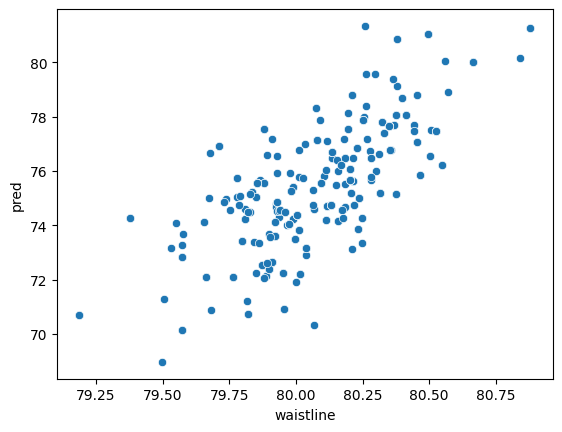

In [43]:
df['pred'] = df['height'] * b1 + df['waistline'] * b2  + a
sns.scatterplot(x=df['waistline'],y=df['pred'])

In [44]:
result = 180 * b1 + 85 * b2 + a
round(result, 2)

81.34


#### ARDRegression
- Automatic Relevance Determination Regression (ARD)
- Lasso RegressionÏùò Bayesian Î≤ÑÏ†Ñ

In [350]:
from sklearn.linear_model import ARDRegression

In [351]:
data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv")

In [352]:
x = data[["height", "weight"]]
y = data["waistline"]

In [353]:
# 1000Î≤àÏùò burn-in Ïù¥ÌõÑ 10,000Ïùò MCMCÎ•º ÏàòÌñâ
# ÌöåÍ∑ÄÍ≥ÑÏàòÏùò ÏÇ¨Ï†ÑÎ∂ÑÌè¨Îäî Î∂ÄÏ†ÅÏ†àÌïú Í∑†ÏùºÎ∂ÑÌè¨(inproper uniform prior distribution),
# Ïò§Ï∞®Ìï≠Ïùò Î∂ÑÏÇ∞Ïùò ÏÇ¨Ï†ÑÎ∂ÑÌè¨Îäî Ïó≠Í∞êÎßà Î∂ÑÌè¨Î°ú ÏßÄÏ†ï. ÌòïÏÉÅ(Shape)Î™®ÏàòÏôÄ Ï≤ôÎèÑ(Scale)Î™®ÏàòÎäî Í∞ÅÍ∞Å 0.005Î°ú ÏßÄÏ†ï.
ard = ARDRegression(threshold_lambda=10000, alpha_2=0.005, lambda_2=0.005, fit_intercept=False) ## Î∂ÄÏ†ÅÏ†àÌïú Í∑†ÏùºÎ∂ÑÌè¨, inverse gammaÎ•º 0.005Î°ú ÏßÄÏ†ï
ard.fit(x, y)

ARDRegression(alpha_2=0.005, fit_intercept=False, lambda_2=0.005,
              threshold_lambda=10000)

In [354]:
ard.coef_

array([ 0.54450434, -0.20484747])

In [355]:
ard.predict([[180, 85]])

array([80.59874677])

#### BayesianRidge

In [356]:
from sklearn.linear_model import BayesianRidge

In [357]:
# 1000Î≤àÏùò burn-in Ïù¥ÌõÑ 10,000Ïùò MCMCÎ•º ÏàòÌñâ
# ÌöåÍ∑ÄÍ≥ÑÏàòÏùò ÏÇ¨Ï†ÑÎ∂ÑÌè¨Îäî Î∂ÄÏ†ÅÏ†àÌïú Í∑†ÏùºÎ∂ÑÌè¨(inproper uniform prior distribution),
# Ïò§Ï∞®Ìï≠Ïùò Î∂ÑÏÇ∞Ïùò ÏÇ¨Ï†ÑÎ∂ÑÌè¨Îäî Ïó≠Í∞êÎßà Î∂ÑÌè¨Î°ú ÏßÄÏ†ï. ÌòïÏÉÅ(Shape)Î™®ÏàòÏôÄ Ï≤ôÎèÑ(Scale)Î™®ÏàòÎäî Í∞ÅÍ∞Å 0.005Î°ú ÏßÄÏ†ï.
bridge = BayesianRidge(alpha_2=0.005, lambda_2=0.005, fit_intercept=False) ## Î∂ÄÏ†ÅÏ†àÌïú Í∑†ÏùºÎ∂ÑÌè¨, inverse gammaÎ•º 0.005Î°ú ÏßÄÏ†ï
bridge.fit(x, y)

BayesianRidge(alpha_2=0.005, fit_intercept=False, lambda_2=0.005)

In [358]:
bridge.coef_

array([ 0.54469948, -0.20530278])

In [359]:
bridge.predict([[180, 85]])

array([80.59517033])

## Correlation Analysis
- Îëê Î≥ÄÏàòÏùò Í¥ÄÍ≥ÑÎ•º ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï®
- ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Íµ¨ÌïòÍ≥†, ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò Ïú†ÏùòÏÑ± Í≤ÄÏ†ï ÏßÑÌñâ
    - H0: Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÏóÜÎã§ (ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0Ïù¥Îã§)
    - Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâÏùÄ df n-2Ïù∏ TÎ∂ÑÌè¨
- ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï¢ÖÎ•ò
    - Covariance
    - Pearson correlation: ÏÑ†Ìòï Í¥ÄÍ≥Ñ Ï∏°Ï†ï. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©
    - Spearman correlation: Rank correlationÏúºÎ°ú, ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎèÑ Ï∏°Ï†ï Í∞ÄÎä•
    - Kendall's Tau
    - Cramer's V
    - Auto-correlation coef

In [360]:
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  mpg_sqrt  
Mazda RX4             4  4.582576  
Mazda RX4 Wag         4  4.582576  
Datsun 710            1  4.774935  
Hornet 4 Drive        1  4.626013  
Hornet Sportabout     2  4.324350

### (1) Covariance matrix

In [361]:
mtcars.cov()

mpg         cyl          disp           hp       drat  \
mpg        36.324103   -9.172379   -633.097208  -320.732056   2.195064   
cyl        -9.172379    3.189516    199.660282   101.931452  -0.668367   
disp     -633.097208  199.660282  15360.799829  6721.158669 -47.064019   
hp       -320.732056  101.931452   6721.158669  4700.866935 -16.451109   
drat        2.195064   -0.668367    -47.064019   -16.451109   0.285881   
wt         -5.116685    1.367371    107.684204    44.192661  -0.372721   
qsec        4.509149   -1.886855    -96.051681   -86.770081   0.087141   
vs          2.017137   -0.729839    -44.377621   -24.987903   0.118649   
am          1.803931   -0.465726    -36.564012    -8.320565   0.190151   
gear        2.135685   -0.649194    -50.802621    -6.358871   0.275988   
carb       -5.363105    1.520161     79.068750    83.036290  -0.078407   
mpg_sqrt    3.969323   -1.013710    -71.086270   -35.688275   0.240487   

                  wt       qsec         vs         am       gear       carb  \
mpg        -5.116685   4.509149   2.017137   1.803931   2.135685  -5.363105   
cyl         1.367371  -1.886855  -0.729839  -0.465726  -0.649194   1.520161   
disp      107.684204 -96.051681 -44.377621 -36.564012 -50.802621  79.068750   
hp         44.192661 -86.770081 -24.987903  -8.320565  -6.358871  83.036290   
drat       -0.372721   0.087141   0.118649   0.190151   0.275988  -0.078407   
wt          0.957379  -0.305482  -0.273661  -0.338105  -0.421081   0.675790   
qsec       -0.305482   3.193166   0.670565  -0.204960  -0.280403  -1.894113   
vs         -0.273661   0.670565   0.254032   0.042339   0.076613  -0.463710   
am         -0.338105  -0.204960   0.042339   0.248992   0.292339   0.046371   
gear       -0.421081  -0.280403   0.076613   0.292339   0.544355   0.326613   
carb        0.675790  -1.894113  -0.463710   0.046371   0.326613   2.608871   
mpg_sqrt   -0.571500   0.496569   0.223013   0.195682   0.237664  -0.591282   

           mpg_sqrt  
mpg        3.969323  
cyl       -1.013710  
disp     -71.086270  
hp       -35.688275  
drat       0.240487  
wt        -0.571500  
qsec       0.496569  
vs         0.223013  
am         0.195682  
gear       0.237664  
carb      -0.591282  
mpg_sqrt   0.437102

### (2) Correlation

#### Pearson
- scipy.stats ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©Ìï† Í≤ΩÏö∞, ÏÉÅÍ¥ÄÍ≥ÑÏàòÏóê ÎåÄÌïú Ïú†ÏùòÍ≤ÄÏ†ï p-value Ï∂îÏ∂ú Í∞ÄÎä•

In [362]:
mtcars.loc[:, ['drat', 'disp']].corr() # pearson corr

drat      disp
drat  1.000000 -0.710214
disp -0.710214  1.000000

In [363]:
stats.pearsonr(mtcars.drat, mtcars.disp) # 2Í∞ú column ÏÉÅÍ¥ÄÎ∂ÑÏÑù

(-0.7102139271692702, 5.282021688157183e-06)

In [364]:
mtcars.rcorr() # pingouin import ÌõÑÏóê ÏÇ¨Ïö© Í∞ÄÎä•. pearson correlation

mpg     cyl    disp      hp    drat      wt    qsec     vs  \
mpg            -     ***     ***     ***     ***     ***       *    ***   
cyl       -0.852       -     ***     ***     ***     ***     ***    ***   
disp      -0.848   0.902       -     ***     ***     ***       *    ***   
hp        -0.776   0.832   0.791       -      **     ***     ***    ***   
drat       0.681    -0.7   -0.71  -0.449       -     ***              *   
wt        -0.868   0.782   0.888   0.659  -0.712       -            ***   
qsec       0.419  -0.591  -0.434  -0.708   0.091  -0.175       -    ***   
vs         0.664  -0.811   -0.71  -0.723    0.44  -0.555   0.745      -   
am           0.6  -0.523  -0.591  -0.243   0.713  -0.692   -0.23  0.168   
gear        0.48  -0.493  -0.556  -0.126     0.7  -0.583  -0.213  0.206   
carb      -0.551   0.527   0.395    0.75  -0.091   0.428  -0.656  -0.57   
mpg_sqrt   0.996  -0.859  -0.868  -0.787    0.68  -0.883    0.42  0.669   

             am   gear    carb mpg_sqrt  
mpg         ***     **      **      ***  
cyl          **     **      **      ***  
disp        ***    ***       *      ***  
hp                         ***      ***  
drat        ***    ***              ***  
wt          ***    ***       *      ***  
qsec                       ***        *  
vs                         ***      ***  
am            -    ***              ***  
gear      0.794      -               **  
carb      0.058  0.274       -       **  
mpg_sqrt  0.593  0.487  -0.554        -

In [365]:
mtcars.corr()["mpg"].sort_values(ascending=False)

mpg         1.000000
mpg_sqrt    0.996157
drat        0.681172
vs          0.664039
am          0.599832
gear        0.480285
qsec        0.418684
carb       -0.550925
hp         -0.776168
disp       -0.847551
cyl        -0.852162
wt         -0.867659
Name: mpg, dtype: float64

#### Spearman
- Î≤îÏ£ºÌòï Î≤àÏàòÏùò Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [366]:
stats.spearmanr(mtcars.wt, mtcars.cyl)

SpearmanrResult(correlation=0.8577281622201577, pvalue=3.5741568243795586e-10)

In [367]:
mtcars.corr(method='spearman')

mpg       cyl      disp        hp      drat        wt  \
mpg       1.000000 -0.910801 -0.908882 -0.894665  0.651455 -0.886422   
cyl      -0.910801  1.000000  0.927652  0.901791 -0.678881  0.857728   
disp     -0.908882  0.927652  1.000000  0.851043 -0.683592  0.897706   
hp       -0.894665  0.901791  0.851043  1.000000 -0.520125  0.774677   
drat      0.651455 -0.678881 -0.683592 -0.520125  1.000000 -0.750390   
wt       -0.886422  0.857728  0.897706  0.774677 -0.750390  1.000000   
qsec      0.466936 -0.572351 -0.459782 -0.666606  0.091869 -0.225401   
vs        0.706597 -0.813789 -0.723664 -0.751593  0.447457 -0.587016   
am        0.562006 -0.522071 -0.624068 -0.362328  0.686571 -0.737713   
gear      0.542782 -0.564310 -0.594470 -0.331402  0.744816 -0.676128   
carb     -0.657498  0.580068  0.539778  0.733379 -0.125223  0.499812   
mpg_sqrt  1.000000 -0.910801 -0.908882 -0.894665  0.651455 -0.886422   

              qsec        vs        am      gear      carb  mpg_sqrt  
mpg       0.466936  0.706597  0.562006  0.542782 -0.657498  1.000000  
cyl      -0.572351 -0.813789 -0.522071 -0.564310  0.580068 -0.910801  
disp     -0.459782 -0.723664 -0.624068 -0.594470  0.539778 -0.908882  
hp       -0.666606 -0.751593 -0.362328 -0.331402  0.733379 -0.894665  
drat      0.091869  0.447457  0.686571  0.744816 -0.125223  0.651455  
wt       -0.225401 -0.587016 -0.737713 -0.676128  0.499812 -0.886422  
qsec      1.000000  0.791571 -0.203332 -0.148200 -0.658718  0.466936  
vs        0.791571  1.000000  0.168345  0.282662 -0.633695  0.706597  
am       -0.203332  0.168345  1.000000  0.807688 -0.064365  0.562006  
gear     -0.148200  0.282662  0.807688  1.000000  0.114887  0.542782  
carb     -0.658718 -0.633695 -0.064365  0.114887  1.000000 -0.657498  
mpg_sqrt  0.466936  0.706597  0.562006  0.542782 -0.657498  1.000000

In [368]:
mtcars.rcorr(method='spearman')

mpg     cyl    disp      hp    drat      wt    qsec      vs  \
mpg            -     ***     ***     ***     ***     ***      **     ***   
cyl       -0.911       -     ***     ***     ***     ***     ***     ***   
disp      -0.909   0.928       -     ***     ***     ***      **     ***   
hp        -0.895   0.902   0.851       -      **     ***     ***     ***   
drat       0.651  -0.679  -0.684   -0.52       -     ***               *   
wt        -0.886   0.858   0.898   0.775   -0.75       -             ***   
qsec       0.467  -0.572   -0.46  -0.667   0.092  -0.225       -     ***   
vs         0.707  -0.814  -0.724  -0.752   0.447  -0.587   0.792       -   
am         0.562  -0.522  -0.624  -0.362   0.687  -0.738  -0.203   0.168   
gear       0.543  -0.564  -0.594  -0.331   0.745  -0.676  -0.148   0.283   
carb      -0.657    0.58    0.54   0.733  -0.125     0.5  -0.659  -0.634   
mpg_sqrt     1.0  -0.911  -0.909  -0.895   0.651  -0.886   0.467   0.707   

              am   gear    carb mpg_sqrt  
mpg          ***     **     ***      ***  
cyl           **    ***     ***      ***  
disp         ***    ***      **      ***  
hp             *            ***      ***  
drat         ***    ***              ***  
wt           ***    ***      **      ***  
qsec                        ***       **  
vs                          ***      ***  
am             -    ***              ***  
gear       0.808      -               **  
carb      -0.064  0.115       -      ***  
mpg_sqrt   0.562  0.543  -0.657        -

#### Kendall's Tau
- Measure of the correspondence between two rankings
- ÏàúÏúÑ ÏùºÏπòÎèÑ
- ÏàúÏúÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [369]:
from scipy.stats import kendalltau

In [370]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 6, 2, 7, 4, 5]
  
# Calculating Kendall Rank correlation
kendalltau(x, y)

KendalltauResult(correlation=0.4285714285714286, pvalue=0.2388888888888889)

#### Kendall's W
- Kendall's coefficient of concordance
- Non-parametric statistic for rank correlation
- ÏÑ∏ ÏßëÎã® Ïù¥ÏÉÅÏùò ÏÉÅÍ¥ÄÏÑ± Í≥ÑÏÇ∞ Í∞ÄÎä•

In [371]:
# !pip install kendall-w
import kendall_w.kendall_w as kw

In [372]:
annotations = [[1, 1, 1, 2], [2, 2, 2, 3], [3, 3, 3, 1]]

m = len(annotations)
n = len(annotations[0]) 
W = kw.compute_w(annotations)

statistic = m*(n-1)*W
p = stats.chi2.cdf(statistic, df=n-1)
2*p if p<=0.5 else 2*(1-p) # two-sided

0.5365851395296919

#### Cramer's V
- Î™ÖÎ™©Ìòï (Î≤îÏ£ºÌòï) Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
- 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎ©∞, 0.2 Ïù¥ÌïòÏù¥Î©¥ Ïó∞Í¥ÄÏÑ±Ïù¥ ÏïΩÌïòÍ≥†, 0.6 Ïù¥ÏÉÅÏù¥Î©¥ Ïó∞Í¥ÄÏÑ±Ïù¥ ÎÜíÎã§Í≥† ÌåêÎã®Ìï®
- Contingency table ÌòïÏãùÏúºÎ°ú input ÏÉùÏÑ±Ìï¥Ïïº Ìï®

In [373]:
dataset = np.array([[13, 17, 11], [4, 6, 9], [20, 31, 42]])
dataset

array([[13, 17, 11],
       [ 4,  6,  9],
       [20, 31, 42]])

In [374]:
# Finding Chi-squared test statistic, sample size, and minimum of rows and columns
chi_2 = stats.chi2_contingency(dataset, correction=False)[0]
n = np.sum(dataset)
minimum_dimension = min(dataset.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((chi_2/n) / minimum_dimension)
  
# Print the result
print(result)

0.12181939439334678


In [375]:
stats.contingency.association(dataset, method='cramer')

0.12181939439334678

### (3) Partial Correlation
- ÏùºÎ∞òÏ†ÅÏù∏ Îã§Ï§ë ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÌÜµÌïú Î≥ÄÏàòÍ∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÌäπÏ†ï Îëê Î≥ÄÏàòÍ∞ÑÏùò ÏàúÏàòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§Í≥† Ìï† Ïàò ÏóÜÏùå
- ÌäπÏ†ï Î≥ÄÏàòÏùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìïú ÏÉÅÌÉúÏóêÏÑúÏùò Îëê Î≥ÄÏàòÍ∞ÑÏùò ÏàúÏàòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† Ìé∏(Î∂ÄÎ∂Ñ) ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏù¥ÎùºÎäî Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï®
- Îëê Î≥ÄÏàò x, y Í∞ÅÍ∞ÅÏóêÏÑú Ï†ú 3Ïùò Î≥ÄÏàò zÏóê ÏùòÌï¥ ÏÑ†ÌòïÏ†ÅÏúºÎ°ú ÏÑ§Î™ÖÎêòÎäî Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞ÌïòÍ≥† ÎÇ®ÏùÄ ÏûîÏ∞®Îì§Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Íµ¨Ìï¥Ïïº Ìï®

In [376]:
from pingouin import partial_corr

In [377]:
# Pearson
partial_corr(data=mtcars, x='mpg', y='cyl', covar='wt', method='pearson') # covar -> ÌÜµÏ†úÌïòÍ≥†Ïûê ÌïòÎäî Í≥µÎ≥ÄÎüâ

n         r           CI95%        r2    adj_r2     p-val    BF10  \
pearson  32 -0.559577  [-0.76, -0.26]  0.313126  0.265756  0.000869  44.102   

            power  
pearson  0.931768

In [378]:
# Spearman
partial_corr(data=mtcars, x='mpg', y='cyl', covar='wt', method='spearman') # covar -> ÌÜµÏ†úÌïòÍ≥†Ïûê ÌïòÎäî Í≥µÎ≥ÄÎüâ

n         r          CI95%        r2    adj_r2     p-val     power
spearman  32 -0.583685  [-0.77, -0.3]  0.340688  0.295218  0.000454  0.953915

### (4) Auto Correlation
- ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÏÑ±
- ÌäπÏ†ï ÏãúÏ†ê(t)Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ t+nÏùò Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌååÏïÖ
- ACF function

#### ACF

In [379]:
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
arima_data.head()

day  price
0  2013-01-01   3794
1  2013-02-01   3863
2  2013-03-01   5190
3  2013-04-01   5783
4  2013-05-01   6298

In [380]:
from statsmodels.tsa.stattools import acf

In [381]:
acf(arima_data['price'], nlags=20, fft=False)

array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
       -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
        0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
        0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
       -0.16477475])

In [382]:
acf(arima_data['price'], nlags=20, qstat=True) # Ljung-Box q statistic & p-value Ï∂îÍ∞Ä. ÏûîÏ∞®Í∞Ä white noiseÎ•º Îî∞Î•¥Îäî ÏßÄ ÌôïÏù∏ -> H0: ÏûîÏ∞®Í∞Ä white noiseÎ•º Îî∞Î•∏Îã§.

(array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
        -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
         0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
         0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
        -0.16477475]),
 array([ 37.94401844,  52.50037174,  54.34180767,  54.85465569,
         63.18445145,  75.24867676,  83.17693947,  83.96614588,
         84.64021172,  94.08551774, 120.40031253, 158.8424724 ,
        180.63576012, 187.07373436, 187.17730135, 189.65693865,
        201.79850112, 217.46466365, 228.38742506, 230.91244191]),
 array([7.28039383e-10, 3.97822304e-12, 9.48671046e-12, 3.48496886e-11,
        2.66598267e-12, 3.41146236e-14, 3.09359282e-15, 7.75246413e-15,
        1.92493244e-14, 8.26131919e-16, 1.50616176e-20, 9.03974065e-28,
        1.25875615e-31, 2.36853084e-32, 8.44659679e-32, 9.67338596e-32,
        1.24496569e-33, 3.13582644e-36, 7.12714627e-38, 7.85057907e-38]))

In [383]:
acf(arima_data['price'], nlags=20, alpha=0.05) # Confidence Interval

(array([ 1.        ,  0.77575788,  0.47639678,  0.16797485, -0.0878652 ,
        -0.3509353 , -0.41848041, -0.33608992, -0.10503294,  0.09613129,
         0.3563047 ,  0.58874409,  0.70429246,  0.52473355,  0.2821513 ,
         0.03539529, -0.17125724, -0.37462784, -0.42056632, -0.34696581,
        -0.16477475]), array([[ 1.        ,  1.        ],
        [ 0.52272762,  1.02878815],
        [ 0.10078526,  0.85200831],
        [-0.24451169,  0.5804614 ],
        [-0.50470823,  0.32897783],
        [-0.76896243,  0.06709184],
        [-0.85496247,  0.01800165],
        [-0.79754545,  0.12536562],
        [-0.58190307,  0.3718372 ],
        [-0.38221769,  0.57448028],
        [-0.12327958,  0.83588897],
        [ 0.09250097,  1.08498722],
        [ 0.16518078,  1.24340414],
        [-0.07037744,  1.11984454],
        [-0.34187969,  0.9061823 ],
        [-0.5967507 ,  0.66754128],
        [-0.80353011,  0.46101562],
        [-1.00986363,  0.26060796],
        [-1.06979327,  0.22866063],
  

In [384]:
from statsmodels.graphics.tsaplots import plot_acf

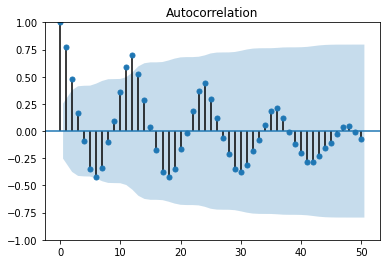

In [385]:
plot_acf(x=arima_data['price'], lags=50)
plt.show()

#### Partial ACF
- ÌäπÏ†ï ÏãúÏ†ê(t)Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ t+nÏùò Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌååÏïÖÌïòÎêò, Í∑∏ ÏÇ¨Ïù¥Ïóê ÏûàÎäî ÏãúÏ†ê Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•ÎèÑ Ï†úÍ±∞

In [386]:
from statsmodels.tsa.stattools import pacf

In [387]:
pacf(arima_data['price'], nlags=20)

array([ 1.        ,  0.78890632, -0.34306071, -0.22423997, -0.1232589 ,
       -0.39768343,  0.30771301,  0.13977001,  0.35822355, -0.02132234,
        0.41418364,  0.4704723 ,  0.23373142, -0.65603062, -0.59451517,
       -0.34472427,  0.29950263,  0.57985284, -0.04939371, -1.34571401,
        0.33253078])

In [388]:
pacf(arima_data['price'], nlags=20, alpha=0.05)

(array([ 1.        ,  0.78890632, -0.34306071, -0.22423997, -0.1232589 ,
        -0.39768343,  0.30771301,  0.13977001,  0.35822355, -0.02132234,
         0.41418364,  0.4704723 ,  0.23373142, -0.65603062, -0.59451517,
        -0.34472427,  0.29950263,  0.57985284, -0.04939371, -1.34571401,
         0.33253078]), array([[ 1.        ,  1.        ],
        [ 0.53587606,  1.04193658],
        [-0.59609098, -0.09003045],
        [-0.47727023,  0.02879029],
        [-0.37628916,  0.12977137],
        [-0.65071369, -0.14465316],
        [ 0.05468275,  0.56074328],
        [-0.11326026,  0.39280027],
        [ 0.10519328,  0.61125381],
        [-0.2743526 ,  0.23170792],
        [ 0.16115338,  0.6672139 ],
        [ 0.21744204,  0.72350257],
        [-0.01929885,  0.48676168],
        [-0.90906088, -0.40300035],
        [-0.84754543, -0.3414849 ],
        [-0.59775453, -0.09169401],
        [ 0.04647237,  0.5525329 ],
        [ 0.32682258,  0.8328831 ],
        [-0.30242398,  0.20363655],
  

In [389]:
from statsmodels.graphics.tsaplots import plot_pacf

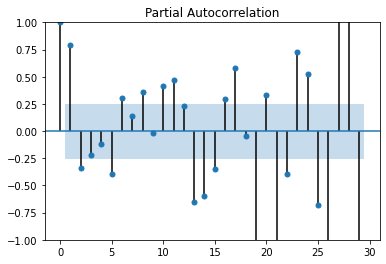

In [390]:
plot_pacf(x=arima_data['price'], lags=29)
plt.show()

### (5) CCA
- Canonical Correlation Analysis (Ï†ïÏ§ÄÏÉÅÍ¥ÄÎ∂ÑÏÑù)
- Í∞Å ÏßëÎã®Ïùò Îëê ÏÑ†Ìòï Í≤∞Ìï©Ïóê ÎåÄÌïú ÏÉÅÍ¥ÄÎ∂ÑÏÑù. ÏöîÏù∏Î∂ÑÏÑùÍ≥º Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Ïó≠Ìï†ÏùÑ Í≤∞Ìï©Ìïú Î∂ÑÏÑùÎ∞©Î≤ïÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏùå
- Î™®Îì† Î≥ÄÏàòÎì§ÏùÄ ÏõêÏπôÏ†ÅÏúºÎ°ú Ïó∞ÏÜçÌòïÏù¥Ïñ¥Ïïº ÌïòÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùº Í≤ΩÏö∞ ÎçîÎØ∏ Î≥ÄÏàòÌôîÌïòÏó¨ Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå
- Í∞ÅÍ∞Å p, q Í∞úÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îëê Î≥ÄÏàò Í∑∏Î£π XÏôÄ YÍ∞Ä ÏûàÏùÑ Îïå, XÏôÄ YÎ•º ÏÜåÏÜçÎêú Í∞úÎ≥Ñ Î≥ÄÏàòÎì§Í∞ÑÏùò ÏÑ†ÌòïÍ≤∞Ìï©ÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Ï†ïÏ§ÄÎ≥ÄÏàòÎùº ÌïòÍ≥†, Ï†ïÏ§ÄÎ≥ÄÏàò XÏôÄ Y ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò pÎ•º Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàòÎùºÍ≥† Ìï®
- Í∞ÄÎä•Ìïú Î™®Îì† ÏÑ†ÌòïÍ≤∞Ìï© Ï§ë Îëê Î≥ÄÏàò X,Y Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÏµúÎåÄÌôî ÏãúÌÇ§Îäî ÏÑ†ÌòïÍ≤∞Ìï© X,YÎ•º Ï∞æÏúºÎ©∞ Ïù¥Îïå, ÏÑ†ÌòïÍ≤∞Ìï©ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í∞úÎ≥Ñ Î≥ÄÏàòÎì§Ïùò Í≥ÑÏàòÎì§ÏùÑ Ï†ïÏ§ÄÍ≥ÑÏàòÎùºÍ≥† Ìï®
- Ï†ïÏ§ÄÎ≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÏµúÎåÄÏùº ÎïåÎäî Ï†ú1 Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàòÎùºÍ≥† ÌïòÍ≥† Ïù¥Ïóê ÎåÄÏùëÎêòÎäî Ï†ïÏ§ÄÎ≥ÄÏàòÎäî Ï†ú1 Ï†ïÏ§ÄÎ≥ÄÏàòÎùº Ìï®
- XÏôÄ YÏùò Í∞ÄÎä•Ìïú Î™®Îì† ÏÑ†ÌòïÍ≤∞Ìï© Ï§ëÏóêÏÑú Ï†ú1 Ï†ïÏ§ÄÎ≥ÄÏàò ÏåçÍ≥ºÎäî ÏÑúÎ°ú ÏÉÅÍ¥Ä ÏóÜÏúºÎ©¥ÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏû• ÌÅ¨Í≤å Ìï¥Ï£ºÎäî Îòê Îã§Î•∏ ÏÑ†ÌòïÍ≤∞Ìï© XÏôÄ YÍ∞Ä Ï†ú2 Ï†ïÏ§ÄÎ≥ÄÏàò
- Ï†ïÏ§ÄÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùò Î™©Ï†ÅÏùÄ Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ Ï†ïÏ§ÄÎ≥ÄÏàòÎ•º Ï∂îÏ†ïÌïòÎäî Í≤É Ïô∏ÏóêÎèÑ Ï†ïÏ§ÄÏ†ÅÏû¨ÎüâÍ≥º ÍµêÏ∞®Ï†ÅÏû¨ÎüâÏùÑ ÌÜµÌï¥ Îëê Î≥ÄÏàò Í∑∏Î£πÍ∞ÑÏùò Í¥ÄÍ≥ÑÏóê ÎåÄÌïú Í∞Å Î≥ÄÏàòÏùò ÏÉÅÎåÄÏ†Å ÏòÅÌñ•Î†•ÏùÑ ÌôïÏù∏ÌïòÎäî Í≤É
    - Ï†ïÏ§ÄÏ†ÅÏû¨Îüâ (canonical loadings): Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ìï¥Îãπ Ï†ïÏ§ÄÎ≥ÄÏàòÎ•º Íµ¨ÏÑ±ÌïòÎäî Ï∏°Ï†ïÎ≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò
    - ÍµêÏ∞®Ï†ÅÏû¨Îüâ (cross loadings): Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ ÎåÄÎ¶ΩÌïòÎäî Ï†ïÏ§ÄÎ≥ÄÏàòÏùò Ï∏°Ï†ï Î≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò
    - Ïù¥Î•º ÌÜµÌï¥ Î≥ÄÏàò Í∑∏Î£πÎì§ ÏÇ¨Ïù¥Ïóê ÎÇ¥Ìè¨Îêú ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÏùò ÏùòÎØ∏Î•º ÌååÏïÖÌï† Ïàò ÏûàÏùå
- Ï∞®ÏõêÏ∂ïÏÜå Î∞©Î≤ïÏúºÎ°úÎèÑ ÏÇ¨Ïö©

In [391]:
from sklearn.cross_decomposition import CCA

In [392]:
cca_data = pd.read_excel('./data/cca_data.xlsx')

x = cca_data[['Weight', 'Waist', 'Pulse']].values ## ÏÑ§Î™Ö Î≥ÄÏàò ÏßëÎã®: ÏÉùÎ¶¨Ï†Å Î≥ÄÏàò
y = cca_data[['Chins', 'Situps', 'Jumps']].values ## Ï¢ÖÏÜç Î≥ÄÏàò ÏßëÎã®: Ïö¥ÎèôÎüâ Î≥ÄÏàò

In [393]:
# Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏÉùÎ¶¨Ï†Å Î≥ÄÏàòÎäî Ïö¥ÎèôÎüâÍ≥º Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎã§
# Ïó∞Íµ¨Í∞ÄÏÑ§: ÏÉùÎ¶¨Ï†Å Î≥ÄÏàòÎäî Ïö¥ÎèôÎüâÍ≥º Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.

# Ï†ïÏ§ÄÎ≥ÄÏàò Íµ¨ÌïòÍ∏∞
cca = CCA(n_components=1).fit(x, y)
x_c, y_c = cca.transform(x, y)

In [394]:
x_c1 = pd.DataFrame(x_c)[0]
y_c1 = pd.DataFrame(x_c)[0]
print(x_c)
print('\n', y_c)

[[-0.02468003]
 [ 0.28186932]
 [ 0.46275646]
 [ 0.15657182]
 [-0.25055945]
 [ 0.10792552]
 [ 0.15097223]
 [-0.203494  ]
 [-1.2698048 ]
 [-0.23314634]
 [-0.19259852]
 [-0.42858299]
 [ 0.00978148]
 [ 1.77820899]
 [-0.04172843]
 [ 0.00339145]
 [ 0.50445943]
 [-0.54821989]
 [-0.25950936]
 [-0.00361289]]

 [[-0.095968  ]
 [ 0.71700988]
 [ 0.76491769]
 [ 0.03728794]
 [-0.42811337]
 [ 0.54137737]
 [ 0.2989697 ]
 [ 0.11422451]
 [-1.29213118]
 [ 0.1778875 ]
 [-0.39350495]
 [-0.52661561]
 [-0.74610916]
 [ 1.42618716]
 [ 0.72020543]
 [-0.4237238 ]
 [ 0.88430825]
 [-1.05155077]
 [-1.26193648]
 [ 0.53727785]]


In [395]:
# Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨ÌïòÍ∏∞
cc_1 = stats.pearsonr(x_c1, y_c1)
print('Ï†ú1Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò:', cc_1)

# Ï†ïÏ§ÄÏ†ÅÏû¨Îüâ, ÍµêÏ∞®Ï†ÅÏû¨Îüâ
print('ÏÉùÎ¶¨Ï†Å Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ìï¥Îãπ Î≥ÄÏàòÎì§Í∞Ñ Ï†ïÏ§ÄÏ†ÅÏû¨Îüâ:', np.corrcoef(x_c1.T, x.T)[0, 1:])
print('ÏÉùÎ¶¨Ï†Å Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ïö¥ÎèôÎüâ Î≥ÄÏàòÎì§Í∞Ñ ÍµêÏ∞®Ï†ÅÏû¨Îüâ:', np.corrcoef(x_c1.T, y.T)[0, 1:])
print('Ïö¥ÎèôÎüâ Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ìï¥Îãπ Î≥ÄÏàòÎì§Í∞Ñ Ï†ïÏ§ÄÏ†ÅÏû¨Îüâ:', np.corrcoef(y_c1.T, y.T)[0, 1:])
print('Ïö¥ÎèôÎüâ Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ ÏÉùÎ¶¨Ï†Å Î≥ÄÏàòÎì§Í∞Ñ ÍµêÏ∞®Ï†ÅÏû¨Îüâ:', np.corrcoef(y_c1.T, x.T)[0, 1:])

Ï†ú1Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò: (1.0, 0.0)
ÏÉùÎ¶¨Ï†Å Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ìï¥Îãπ Î≥ÄÏàòÎì§Í∞Ñ Ï†ïÏ§ÄÏ†ÅÏû¨Îüâ: [ 0.62065861  0.92543282 -0.33284891]
ÏÉùÎ¶¨Ï†Å Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ïö¥ÎèôÎüâ Î≥ÄÏàòÎì§Í∞Ñ ÍµêÏ∞®Ï†ÅÏû¨Îüâ: [-0.57890573 -0.65059385 -0.12904413]
Ïö¥ÎèôÎüâ Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ Ìï¥Îãπ Î≥ÄÏàòÎì§Í∞Ñ Ï†ïÏ§ÄÏ†ÅÏû¨Îüâ: [-0.57890573 -0.65059385 -0.12904413]
Ïö¥ÎèôÎüâ Ï†ïÏ§ÄÎ≥ÄÏàòÏôÄ ÏÉùÎ¶¨Ï†Å Î≥ÄÏàòÎì§Í∞Ñ ÍµêÏ∞®Ï†ÅÏû¨Îüâ: [ 0.62065861  0.92543282 -0.33284891]


In [396]:
print(cca.coef_)

[[  2.23882453  29.77930328   4.84091049]
 [ -4.56024769 -60.65727657  -9.86042029]
 [  0.17069351   2.2704476    0.36908297]]


## Survival Analysis
- Í¥ÄÏã¨ ÏûàÎäî ÏÇ¨Í±¥Ïù¥ Î∞úÏÉùÌï† ÎïåÍπåÏßÄ ÏòàÏÉÅÎêòÎäî Í∏∞Í∞Ñ Ï°∞ÏÇ¨
    - Event: Í¥ÄÏã¨ Í≤ΩÌóò (ÏÉùÏ°¥/ÏÇ¨Îßù ÎòêÎäî Ï≤¥Î•ò/ÏÇ¨Ìá¥)
    - Survival time: eventÍ∞Ä Î∞úÏÉùÌï† Îïå ÍπåÏßÄÏùò Í∏∞Í∞Ñ
- Survival Function: TÎäî ÏÇ¨Í±¥Ïù¥ Î∞úÏÉùÌïòÍ≥† tÍ∞Ä Í¥ÄÏ∏° Ï§ëÏù∏ ÏûÑÏùòÏùò ÏãúÏ†êÏùº Îïå ÏÉùÏ°¥ S(t)Îäî TÍ∞Ä tÎ≥¥Îã§ ÌÅ¥ ÌôïÎ•†
- Censorship Problem(Ï†àÎã® Î¨∏Ï†ú): Í¥ÄÏ∏° Ï§ëÎã® Í¥ÄÏ∏°Ïπò(Censored observations)Îäî ÏÇ¨Í±¥Ïù¥ ÏùºÎ∂Ä Í∞úÏù∏Ïóê ÎåÄÌï¥ Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ ÏÇ¨Í±¥ Î∞úÏÉù ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∞úÏÉùÌï®
    - Ïù¥Î≤§Ìä∏Í∞Ä ÏïÑÏßÅ Î∞úÏÉùÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞(Ï¶â, ÏÉùÏ°¥ ÏãúÍ∞ÑÏùÑ Ïïå Ïàò ÏóÜÏùå/ÏïÑÏßÅ ÏÇ¨ÏûÑÌïòÏßÄ ÏïäÏùÄ ÏÇ¨ÎûåÏùò Í≤ΩÏö∞ Ïò§Ìï¥Ïùò ÏÜåÏßÄÍ∞Ä ÏûàÏùå)
    - Îç∞Ïù¥ÌÑ∞Í∞Ä ÎàÑÎùΩÎêòÍ±∞ÎÇò(Ï¶â, ÎìúÎ°≠ÏïÑÏõÉ) contact ÌïòÎäî Ìè¨Ïù∏Ìä∏Î•º ÏûÉÍ≤å Îêú Í≤É Í≤ΩÏö∞
- Censorship Problem Type
    - Ï¢åÏ∏° Í¥ÄÏ∏° Ï§ëÎã®(Left-Censored): ÏÉùÏ°¥ Í∏∞Í∞ÑÏù¥ Í¥ÄÏ∞∞Îêú Í∏∞Í∞ÑÎ≥¥Îã§ ÏûëÏùå
    - Ïö∞Ï∏° Í¥ÄÏ∏° Ï§ëÎã®(Right-Censored): ÏÉùÏ°¥ Í∏∞Í∞ÑÏù¥ Í¥ÄÏ∞∞Îêú Í∏∞Í∞ÑÎ≥¥Îã§ ÌÅº
    - Íµ¨Í∞Ñ Í¥ÄÏ∏° Ï§ëÎã®Îê®(Interval-Censored): ÏÉùÏ°¥ Í∏∞Í∞ÑÏùÑ Ï†ïÌôïÌûà Ï†ïÏùòÌï† Ïàò ÏóÜÏùå
- Hazard Function
    - ÏúÑÌóò Ìï®Ïàò ÎòêÎäî ÏúÑÌóòÎ•† h(t)Îäî Í∞úÏù∏Ïù¥ ÏãúÍ∞Ñ tÍπåÏßÄ ÏÉùÏ°¥ÌïòÍ≥† Ï†ïÌôïÌûà ÏãúÍ∞Ñ tÏóê Í¥ÄÏã¨ ÏûàÎäî ÏÇ¨Í±¥ÏùÑ Í≤ΩÌóòÌï† ÌôïÎ•†
    - Ï°∞ÏúÑÌóòÌï®ÏàòÎäî Ï°∞Í±¥Î∂Ä ÌôïÎ•†Î°ú Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§. Ï¶â, Î™®Îì† Í∞úÏ≤¥Ïóê ÎåÄÌïú ÏÇ¨Í±¥Ïù¥ ÏïÑÎãàÎùº ÏãúÍ∞Ñ tÍπåÏßÄ ÏÇ¥ÏïÑÏûàÎäî Í∞úÏ≤¥Îì§Ïóê ÎåÄÌïú ÏúÑÌóòÏú®
    - ÏúÑÌóòÌï®ÏàòÎäî ÏïÑÏ£º ÏßßÏùÄ ÏãúÍ∞ÑÏóê ÏùºÏïÑÎÇ† ÏÇ¨Í±¥Ïùò ÌôïÎ•†Î°úÏÑú ÏàúÍ∞ÑÏ†ÅÏù∏(instantaneous)Ïù∏ ÏùòÎØ∏Î•º Í∞ÄÏßÄÎ©∞, ÏïÑÏ£º ÏßßÏùÄ ÏãúÍ∞ÑÏóê ÏùºÏñ¥ÎÇòÎäî Í∑πÌïúÏùò ÏùòÎØ∏ÏûÑ
    - ÏúÑÌóòÌï®ÏàòÎäî ÌôïÎ•†Î°úÏÑú Ï†ïÏùòÎêòÏßÄÎßå Î∞úÏÉùÎ•†(rate)Î°ú Ïù¥Ìï¥Ìï† Ïàò ÏûàÏùå Î∂ÑÎ™®Îäî ÌôïÎ•†Ïù¥Í≥† Î∂ÑÏûêÎäî ÏãúÍ∞ÑÏúºÎ°ú ÌëúÏãúÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Îã®ÏúÑ ÏãúÍ∞ÑÎãπ ÏùºÏñ¥ÎÇòÎäî Î∞úÏÉùÎ•†Î°ú Ïù¥Ìï¥Ìï† Ïàò ÏûàÏùå

### (1) Kaplan-Meier Estimator
- Ïö∞Ï∏° Í¥ÄÏ∏° Ï§ëÎã® Í¥ÄÏ∏°Ïπò Ï≤òÎ¶¨
- ÎπÑÎ™®ÏàòÏ†Å Î∞©Î≤ïÏúºÎ°ú Î∂ÑÌè¨ Í∞ÄÏ†ïÏù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏùå

In [397]:
df = pd.read_csv('./data/HR-Employee-Attrition.csv')
df[['YearsAtCompany', 'Attrition']].head()

YearsAtCompany Attrition
0               6       Yes
1              10        No
2               0       Yes
3               8        No
4               2        No

In [398]:
# !pip install lifelines
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [399]:
# Convert the Attrition into binary variable
encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])

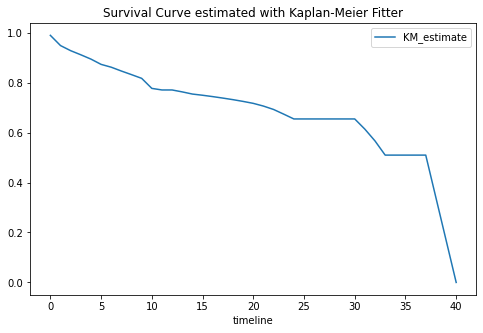

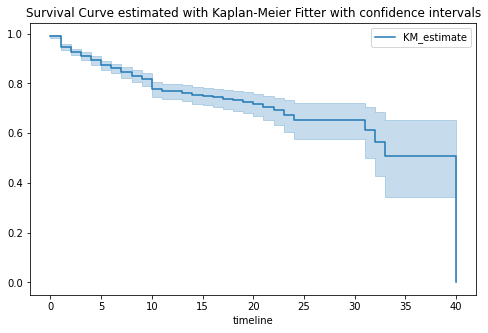

In [400]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])

kmf.survival_function_.plot(figsize=(8, 5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8, 5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

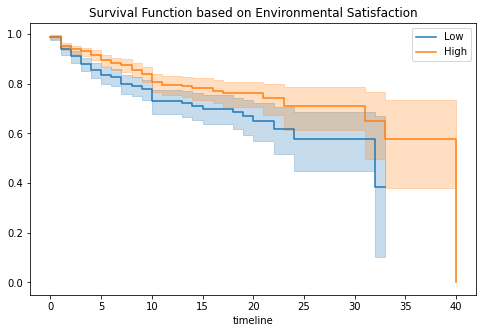

In [401]:
EnvironmentalLow = ((df['EnvironmentSatisfaction']==1) | (df['EnvironmentSatisfaction']==2))
EnvironmentalHigh = ((df['EnvironmentSatisfaction']==3) | (df['EnvironmentSatisfaction']==4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[EnvironmentalLow]['YearsAtCompany'], 
        event_observed=df[EnvironmentalLow]['Attrition'], 
        label='Low')
kmf.plot_survival_function(figsize=(8, 5), ax=ax)

kmf.fit(durations=df[EnvironmentalHigh]['YearsAtCompany'], 
        event_observed=df[EnvironmentalHigh]['Attrition'], 
        label='High')
kmf.plot_survival_function(figsize=(8, 5), ax=ax)
plt.title('Survival Function based on Environmental Satisfaction')
plt.show();

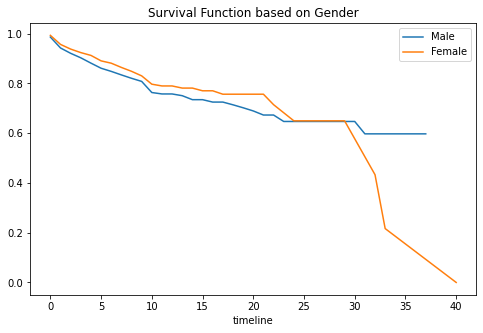

In [402]:
male = (df['Gender']=='Male')
female = (df['Gender']=='Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[male]['YearsAtCompany'], event_observed=df[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8, 5), ax=ax)
kmf.fit(durations=df[female]['YearsAtCompany'], event_observed=df[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8, 5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show();

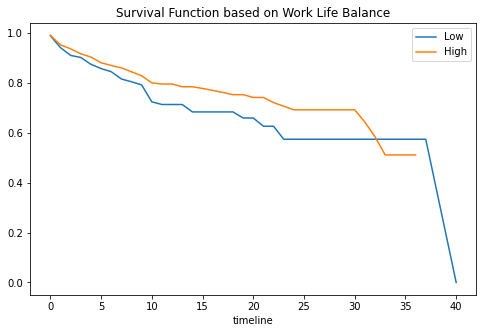

In [403]:
worklifelow = ((df['WorkLifeBalance'] == 1) | (df['WorkLifeBalance'] == 2))
worklifehigh = ((df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[worklifelow]['YearsAtCompany'], 
        event_observed=df[worklifelow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[worklifehigh]['YearsAtCompany'], 
        event_observed=df[worklifehigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Work Life Balance')
plt.show();

In [404]:
### Log rank test
# H0: both groups have the same distribution curve
# H1: the two groups are different
output = logrank_test(durations_A = df[worklifelow]['YearsAtCompany'],
                      durations_B = df[worklifehigh]['YearsAtCompany'],
                      event_observed_A = df[worklifelow]['Attrition'],
                      event_observed_B = df[worklifehigh]['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.40 0.04      4.80>

In [405]:
### Probability predict
kmf.predict(6)

0.8689826396104314

BusinessTravel ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department ['Sales', 'Research & Development', 'Human Resources']
EducationField ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Gender ['Female', 'Male']
JobRole ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
MaritalStatus ['Single', 'Married', 'Divorced']
Over18 ['Y']
OverTime ['Yes', 'No']


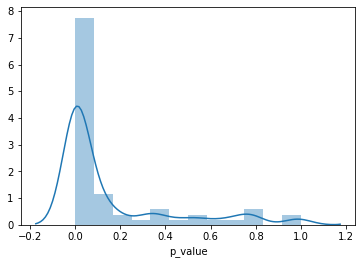

In [406]:
group_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
results = []
for col in group_cols:
    choices = list(df[col].unique())
    print(col, choices)
    candidates = list(itertools.combinations(choices, 2))
    for a_group, b_group in candidates:
        A_GROUP = df.query(f"{col}=='{a_group}'")
        B_GROUP = df.query(f"{col}=='{b_group}'")

        output = logrank_test(durations_A = A_GROUP['YearsAtCompany'],
                            durations_B = B_GROUP['YearsAtCompany'],
                            event_observed_A = A_GROUP['Attrition'],
                            event_observed_B = B_GROUP['Attrition'])
        p_value = output.p_value
        results.append([col,a_group,b_group,p_value])
result_table = pd.DataFrame(results,columns=['column', "a_group", "b_group", "p_value"])
sns.distplot(result_table['p_value'])
plt.show()

### (2) Cox Proportional-Hazards Model
- ÏÉùÏ°¥ Í∏∞Í∞ÑÍ≥º ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ïó¨Îü¨ Í∞ÄÏßÄ ÏöîÏù∏Îì§ÏùÑ ÏïåÏïÑÎ≥¥Îäî Î∂ÑÏÑù Î∞©Î≤ï
- hazrad assumptionÏù¥ Ïú†ÏßÄÎêúÎã§Îäî Í∞ÄÏ†ï
    - ÏÉòÌîå Í∞Ñ ÏÉùÏ°¥ ÏãúÍ∞ÑÏùÄ ÎèÖÎ¶ΩÏ†Å
    - ÏòàÏ∏° Î≥ÄÏàòÏôÄ hazard ÏÇ¨Ïù¥Ïóê Í≥±ÏÖà Í¥ÄÍ≥Ñ
    - ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº ÏùºÏ†ïÌïú ÏúÑÌóò ÎπÑÏú®
- ÏúÑÌóò(Hazard)ÏùÄ ÏÉùÏ°¥ Í≥°ÏÑ†Ïùò Í∏∞Ïö∏Í∏∞Î°ú Ï†ïÏùòÎê®. ÌîºÌóòÏûêÍ∞Ä ÏñºÎßàÎÇò Îπ®Î¶¨ Ï£ΩÏñ¥Í∞ÄÎäîÏßÄÎ•º Ï∏°Ï†ï
- ÏúÑÌóò ÎπÑÏú®ÏùÄ Îëê Í∑∏Î£π ÎπÑÍµê. ÏúÑÌóòÎπÑÍ∞Ä 2.0Ïù¥Î©¥ Ìïú Í∑∏Î£πÏùò ÏÇ¨ÎßùÎ•†ÏùÄ Îã§Î•∏ Í∑∏Î£πÏùò ÏÇ¨ÎßùÎ•†Ïùò Îëê Î∞∞

In [407]:
from lifelines import CoxPHFitter

In [408]:
columns_selected = ['Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                    'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany']
df = df[columns_selected]

In [409]:
coxph = CoxPHFitter()
coxph.fit(df, duration_col='YearsAtCompany', event_col='Attrition')

# Current employees
df_new = df.loc[df['Attrition'] == 0]

# Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new, conditional_after=df_new_obs)
pd.DataFrame(predictions).head(11).iloc[:, :5]

1         3         4         5         6
0.0   1.000000  1.000000  1.000000  1.000000  1.000000
1.0   0.986432  0.954723  0.960284  0.962204  0.988253
2.0   0.986432  0.832633  0.916395  0.921246  0.978083
3.0   0.967805  0.809508  0.861182  0.810189  0.966473
4.0   0.945323  0.809508  0.827520  0.789045  0.951264
5.0   0.932830  0.778306  0.780170  0.789045  0.941632
6.0   0.915764  0.741487  0.733267  0.760458  0.927576
7.0   0.896696  0.721424  0.683692  0.726633  0.913012
8.0   0.873145  0.694475  0.556009  0.708160  0.896843
9.0   0.842240  0.664989  0.532844  0.683295  0.850746
10.0  0.805808  0.629479  0.532844  0.656022  0.841555

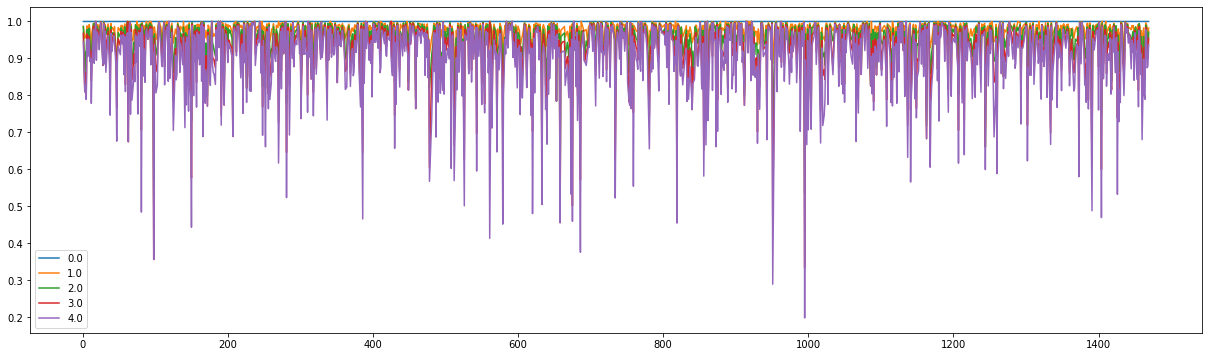

In [410]:
pd.DataFrame(predictions).head().T.plot(figsize=(21, 6))

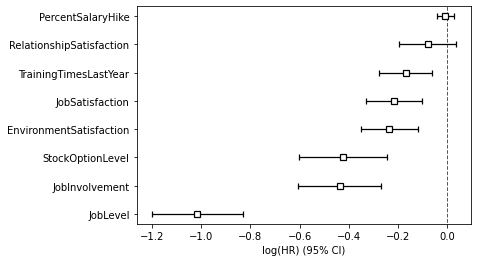

In [411]:
coxph.plot()

In [412]:
coxph.check_assumptions(df)

Proportional hazard assumption looks okay.


[]

### (3) Accelerated Failure Time (AFT) Model
- Cox-PH Î™®Îç∏Ïùò ÎπÑÎ°Ä ÏúÑÌóò Í∞ÄÏ†ï Í∏∞Ï§ÄÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞ÏóêÎäî ÌååÎùºÎ©îÌä∏Î¶≠ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî ÎÇòÏùÄ Ï†ëÍ∑º Î∞©ÏãùÏù¥Î©∞, AFTÎäî ÌååÎùºÎ©îÌä∏Î¶≠ Î™®Îç∏ Ï§ë ÌïòÎÇò
- ÏÉùÏ°¥ Ìï®ÏàòÍ∞Ä Î™®ÏàòÏ†Å Ïó∞ÏÜç Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ï (Weibull Î∂ÑÌè¨ ÎòêÎäî Î°úÍ∑∏ Ï†ïÍ∑ú Î∂ÑÌè¨ Îì±)
- Îëê Î™®ÏßëÎã®(Ïòà: P Î∞è Q)ÏóêÏÑú ÌååÏÉùÎêú ÏÉùÏ°¥ Ìï®ÏàòÍ∞Ä Í≥µÎ≥ÄÎüâÏùò Ìï®ÏàòÎ°ú Î™®Îç∏ÎßÅÌï† Ïàò ÏûàÎäî acceleration Í≥ÑÏàò ÎûåÎã§(Œª)ÏôÄ Í¥ÄÎ†®Ïù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï
- Í≥µÎ≥ÄÎüâÏùÑ Í∏∞Î∞òÏúºÎ°ú Í≥†Ïû• ÏãúÍ∞ÑÏùÑ Í∞ÄÏÜçÌôîÌïòÍ±∞ÎÇò Í∞êÏÜç

In [413]:
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter

In [414]:
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

# Fit to data
for model in [wb, ex, log, loglogis]:
    model.fit(durations = df["YearsAtCompany"].replace(0 , 0.000001), event_observed=df["Attrition"])
    # Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 2138.2708129525727
The AIC value for ExponentialFitter is 2263.9437336059136
The AIC value for LogNormalFitter is 2276.8859677966007
The AIC value for LogLogisticFitter is 2151.579769001517


In [415]:
LogLogistic_aft = LogLogisticFitter() # best model
LogLogistic_aft.fit(durations=df['YearsAtCompany'].replace(0 , 0.000001), event_observed=df['Attrition'])
LogLogistic_aft.summary

coef   se(coef)  coef lower 95%  coef upper 95%  cmp to  \
alpha_  123.012803  26.194356       71.672809      174.352796     1.0   
beta_     0.580608   0.034575        0.512843        0.648373     1.0   

                z             p    -log2(p)  
alpha_   4.657981  3.193261e-06   18.256538  
beta_  -12.130000  7.324924e-34  110.072741

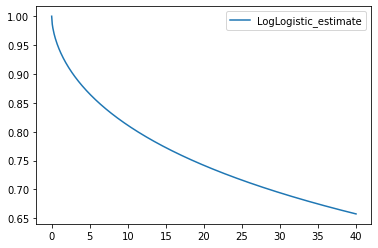

In [416]:
LogLogistic_aft.survival_function_.plot()
plt.show()

In [417]:
# Í≥µÎ≥ÄÎüâÏùò Îã®ÏúÑ Ï¶ùÍ∞ÄÎäî ÌèâÍ∑†/Ï§ëÍ∞Ñ ÏÉùÏ°¥ ÏãúÍ∞ÑÏù¥ exp(Í≥ÑÏàò)ÎßåÌÅº Î≥ÄÍ≤ΩÎê®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
# Í≥ÑÏàòÍ∞Ä ÏñëÏàòÏù¥Î©¥ exp(Í≥ÑÏàò)Í∞Ä >1Ïù¥ ÎêòÏñ¥ ÏÇ¨Í±¥/Ïù¥Î≤§Ìä∏ ÏãúÍ∞ÑÏù¥ ÎäêÎ†§ÏßÄÎ©∞, ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏùåÏùò Í≥ÑÏàòÎäî ÌèâÍ∑†/Ï§ëÍ∞Ñ ÏÉùÏ°¥ ÏãúÍ∞ÑÏùÑ Ï§ÑÏûÖÎãàÎã§.
LogLogistic_aft.median_survival_time_

123.01280287855722

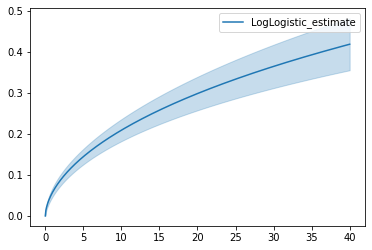

In [418]:
LogLogistic_aft.plot()

## Association Analysis
- ÏÇ¨Í±¥Ïùò Ïó∞Í¥ÄÍ∑úÏπôÏùÑ Ï∞æÎäî Î∞©Î≤ï
- A -> B

### (1) Run test
#### One sample
- ÏÉòÌîåÏùò Î¨¥ÏûëÏúÑ Ï∂îÏ∂ú Ïó¨Î∂Ä Í≤ÄÏ†ï
- ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ Ï§ëÏïôÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏßÑÌôîÌïú Îã§Ïùå Í≤ÄÏ†ï

In [419]:
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']

test_df = pd.DataFrame(data, columns=["product"])
test_df.head()

product
0       a
1       a
2       b
3       b
4       a

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) <br>
Ïó∞ÏÜçÏ†ÅÏù∏ Í¥ÄÏ∏°Í∞íÏù¥ ÏûÑÏùòÏ†ÅÏù¥Îã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)<br>
Ïó∞ÏÜçÏ†ÅÏù∏ Í¥ÄÏ∏°Í∞íÏù¥ ÏûÑÏùòÏ†ÅÏù¥ÏßÄ ÏïäÎã§ (Ïó∞Í¥ÄÏù¥ ÏûàÎã§).<br>

In [420]:
from statsmodels.sandbox.stats.runs import runstest_1samp

In [421]:
# Run-testÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò 
test_df.loc[test_df['product']=='a', 'product']=1
test_df.loc[test_df['product']=='b', 'product']=0

# Perform Runs test
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

[Í≤∞Í≥ºÌï¥ÏÑù]
P-valueÍ∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ ÏïäÎäîÎã§. Ï¶â, ÏÉÅÌíà aÏôÄ bÏùò Íµ¨Îß§ÏóêÎäî Ïó∞Í¥ÄÏù¥ ÏóÜÎã§.

#### Two sample
- Îëê ÌëúÎ≥∏Ïù¥ Í∞ôÏùÄ Î∂ÑÌè¨ÏóêÏÑú ÎÇòÏôîÎäîÏßÄ ÌÖåÏä§Ìä∏
- Wald‚ÄìWolfowitz Run test

H0: The two populations have the same distribution. <br>
H1: The two populations have different distributions. 

In [422]:
from statsmodels.sandbox.stats.runs import runstest_2samp

In [423]:
x = [31.8, 32.8, 39.2, 36, 30, 34.5, 37.4]
y = [35.5, 27.6, 21.3, 24.8, 36.7, 30]

res = runstest_2samp(x, y)
res

ties detected


(0.022428065200812752, 0.9821064931864921)

[Í≤∞Í≥ºÌï¥ÏÑù]
P-valueÍ∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ ÏïäÎäîÎã§. Ï¶â, xÏôÄ yÎäî Í∞ôÏùÄ Î∂ÑÌè¨ÏóêÏÑú Ïò® Í≤ÉÏúºÎ°ú Î≥º Ïàò ÏûàÎã§.

### (2) Association rules
- Ï°∞Í±¥-Í≤∞Í≥º ÏãùÏúºÎ°ú ÌëúÌòÑÎêòÎäî Ïú†Ïö©Ìïú Ìå®ÌÑ¥ÏùÑ Î∞úÍ≤¨Ìï¥ ÎÇ¥Îäî Í≤É
- Ïû•Î∞îÍµ¨ÎãàÎ∂ÑÏÑù, ÏÑúÏó¥Î∂ÑÏÑù
- Íµ¨ÌòÑÍ≥º Ïù¥Ìï¥Í∞Ä ÏâΩÍ≥† Í∞ÑÎã®ÌïòÏßÄÎßå, ÌíàÎ™©ÏàòÍ∞Ä ÎßéÏúºÎ©¥ Í≥ÑÏÇ∞ÎüâÏù¥ Í∏∞ÌïòÍ∏âÏàòÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎØÄÎ°ú, Ï†ÅÏ†àÌïú ÌíàÎ™© Í≤∞Ï†ï ÌïÑÏöî
- Í±∞ÎûòÎüâÏù¥ Ï†ÅÏùÄ Í≤ΩÏö∞ Í∑úÏπô Î∞úÍ≤¨ Ïãú Ï†úÏô∏ÎêòÍ∏∞ Ïâ¨ÏõÄ -> Ïú†ÏÇ¨ ÌíàÎ™©Í≥º Ìï®Íªò Î¨∂Îäî Í≤ÉÏúºÎ°ú Ìï¥Í≤∞ Í∞ÄÎä•
- Ï∏°Ï†ï ÏßÄÌëú
    - ÏßÄÏßÄÎèÑ (Support): Ï†ÑÏ≤¥ Í±∞Îûò Ï§ë ÌíàÎ™© A, BÍ∞Ä ÎèôÏãúÏóê Ìè¨Ìï®ÎêòÎäî Í±∞ÎûòÏùò ÎπÑÏú®. Ï†ÑÏ≤¥ Íµ¨Îß§ Í≤ΩÌñ• ÌååÏïÖ
    - Ïã†Î¢∞ÎèÑ (Confidence): ÌíàÎ™© AÍ∞Ä Ìè¨Ìï®Îêú Í±∞Îûò Ï§ë A, BÍ∞Ä ÎèôÏãúÏóê Ìè¨Ìï®ÎêòÎäî Í±∞ÎûòÏùò ÎπÑÏú®. A -> B Ïó∞Í¥ÄÏÑ± Ï†ïÎèÑ
    - Ìñ•ÏÉÅÎèÑ (Lift): ÌíàÎ™© BÎ•º Íµ¨Îß§Ìïú Í≥†Í∞ù Ï§ë, AÎ•º Íµ¨Îß§Ìïú ÌõÑ BÎ•º Íµ¨Îß§Ìï† ÌôïÎ•†. 1Ïù¥Î©¥ A, BÍ∞Ä ÎèÖÎ¶Ω, 1Î≥¥Îã§ ÌÅ¨Î©¥ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- ÌååÏÉù Ï∏°Ï†ï ÏßÄÌëú
    - Î†àÎ≤ÑÎ¶¨ÏßÄ (Leverage): AÏôÄ BÍ∞Ä ÎèôÏãúÏóê Ìè¨Ìï®Îêú ÎπàÎèÑÏôÄ AÏôÄ BÍ∞Ä ÎèÖÎ¶ΩÏù∏ Í≤ΩÏö∞ ÏòàÏÉÅÎêòÎäî ÎπàÎèÑÏùò Ï∞®Ïù¥. A & BÏùò ÏßÄÏßÄÎèÑ - AÏùò ÏßÄÏßÄÎèÑ * BÏùò ÏßÄÏßÄÎèÑ
    - ÌôïÏã† (Conviction): Í≤∞Í≥ºÏ†àÏù¥ Ï°∞Í±¥Ï†àÏóê ÏùòÏßÄÌïòÎäî Ï†ïÎèÑÎ°ú 1Ïùº Í≤ΩÏö∞ AÏôÄ BÎäî ÎèÖÎ¶ΩÏù¥Í≥†, 1Î≥¥Îã§ ÌÅ¨Î©¥ Ïú†ÏùòÎØ∏Ìïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÎã§Í≥† ÌåêÎã®Ìï®. (1 - BÏùò ÏßÄÏßÄÎèÑ)/(1 - (A -> BÏùò Ïã†Î¢∞ÎèÑ))
- Ïó∞Í¥ÄÍ∑úÏπô ÏÉùÏÑ± ÏïåÍ≥†Î¶¨Ï¶ò
    - Apriori
        - Í≥ÑÏÇ∞ÎüâÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥, ÎπàÎ∞úÏßëÌï©(Frequent Item Sets)ÎßåÏùÑ Í≥†Î†§Ìï¥ÏÑú Ïó∞Í¥Ä Í∑úÏπô ÏÉùÏÑ±
        - Frequent Item set: ÏµúÏÜåÏßÄÏßÄÎèÑ Ïù¥ÏÉÅÏùò ÏßÄÏßÄÎèÑ Í∞íÏùÑ Í∞ñÎäî item
    - FP-Growth
        - FP-Tree (Frequency Pattern Tree) ÏÉùÏÑ±ÌïòÍ≥†, Î∂ÑÌï†Ï†ïÎ≥µ Î∞©Ïãù ÏÇ¨Ïö©
        - AprioriÎ≥¥Îã§ Îπ†Î•∏ ÌÉêÏÉâ Í∞ÄÎä•

In [424]:
df = pd.read_csv('./ADP_book_ver01/data/groceries.csv')
df

citrus fruit,semi-finished bread,margarine,ready soups
0                          tropical fruit,yogurt,coffee    
1                                            whole milk    
2            pip fruit,yogurt,cream cheese,meat spreads    
3     other vegetables,whole milk,condensed milk,lon...    
4        whole milk,butter,yogurt,rice,abrasive cleaner    
...                                                 ...    
9829  sausage,chicken,beef,hamburger meat,citrus fru...    
9830                                  cooking chocolate    
9831  chicken,citrus fruit,other vegetables,butter,y...    
9832  semi-finished bread,bottled water,soda,bottled...    
9833  chicken,tropical fruit,other vegetables,vinega...    

[9834 rows x 1 columns]

In [425]:
### CommaÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
df_split = df.iloc[:, 0].str.split(',', expand=True)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [426]:
### None Ï†úÍ±∞
df_split_ary = df_split.values
groceries = []
for i in range(len(df_split_ary)) : 
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)

In [427]:
from mlxtend.preprocessing import TransactionEncoder

In [428]:
te = TransactionEncoder()
groceries_tr = te.fit_transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False              True             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False    True     False  
1       False        True   False     False  
2       False       False    True     False  
3       False        True   False     False  
4       False        True    True     False  

[5 rows x 169 columns]

In [429]:
# !pip install mlxtend
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

In [430]:
### ÏßÄÏßÄÎèÑÍ∞Ä 5% Ïù¥ÏÉÅÏù∏ ÎπàÎ≤à Ìï≠Î™© ÏßëÌï© ÌÉêÏÉâ
# apriori
groceries_ap = apriori(groceries_tr, min_support=0.05, use_colnames=True)
groceries_ap[:10]

support         itemsets
0  0.052471           (beef)
1  0.080537   (bottled beer)
2  0.110535  (bottled water)
3  0.064877    (brown bread)
4  0.055420         (butter)
5  0.077690    (canned beer)
6  0.082672   (citrus fruit)
7  0.058064         (coffee)
8  0.053285           (curd)
9  0.063453  (domestic eggs)

In [431]:
# fp-growth
groceries_fset = fpgrowth(groceries_tr, min_support=0.05, use_colnames=True)
groceries_fset[:10]

support            itemsets
0  0.139516            (yogurt)
1  0.104942    (tropical fruit)
2  0.058064            (coffee)
3  0.255542        (whole milk)
4  0.075656         (pip fruit)
5  0.193512  (other vegetables)
6  0.055420            (butter)
7  0.183954        (rolls/buns)
8  0.080537      (bottled beer)
9  0.110535     (bottled water)

In [432]:
# Ïã†Î¢∞ÎèÑÍ∞Ä 0.3 Ïù¥ÏÉÅÏù∏ ÎπàÎ≤à Ìï≠Î™© ÏßëÌï© ÌÉêÏÉâ
association_rules(groceries_ap, metric="confidence", min_threshold=0.3)

antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.193512            0.255542   
1        (rolls/buns)  (whole milk)            0.183954            0.255542   
2            (yogurt)  (whole milk)            0.139516            0.255542   

    support  confidence      lift  leverage  conviction  
0  0.074842    0.386758  1.513480  0.025392    1.213971  
1  0.056640    0.307905  1.204909  0.009632    1.075659  
2  0.056030    0.401603  1.571575  0.020378    1.244088

In [433]:
rules = association_rules(groceries_ap, metric="lift", min_threshold=1)

# Í∑úÏπôÏùò Í∏∏Ïù¥ Ïª¨Îüº ÏÉùÏÑ± 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

antecedents         consequents  antecedent support  \
0        (whole milk)  (other vegetables)            0.255542   
1  (other vegetables)        (whole milk)            0.193512   
2        (rolls/buns)        (whole milk)            0.183954   
3        (whole milk)        (rolls/buns)            0.255542   
4        (whole milk)            (yogurt)            0.255542   
5            (yogurt)        (whole milk)            0.139516   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.193512  0.074842    0.292877  1.513480  0.025392    1.140520   
1            0.255542  0.074842    0.386758  1.513480  0.025392    1.213971   
2            0.255542  0.056640    0.307905  1.204909  0.009632    1.075659   
3            0.183954  0.056640    0.221647  1.204909  0.009632    1.048428   
4            0.139516  0.056030    0.219260  1.571575  0.020378    1.102139   
5            0.255542  0.056030    0.401603  1.571575  0.020378    1.244088   

   antecedent_len  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1

In [434]:
rules[(rules['antecedent_len'] >=1) & (rules['confidence'] >=0.4) & (rules['lift'] >=1)]

antecedents   consequents  antecedent support  consequent support  support  \
5    (yogurt)  (whole milk)            0.139516            0.255542  0.05603   

   confidence      lift  leverage  conviction  antecedent_len  
5    0.401603  1.571575  0.020378    1.244088               1

In [435]:
# ÌäπÏ†ï consequents Ï∞æÍ∏∞
rules[(rules.consequents == frozenset({'whole milk'})) | (rules.consequents == frozenset({'yogurt'}))]

antecedents   consequents  antecedent support  consequent support  \
1  (other vegetables)  (whole milk)            0.193512            0.255542   
2        (rolls/buns)  (whole milk)            0.183954            0.255542   
4        (whole milk)      (yogurt)            0.255542            0.139516   
5            (yogurt)  (whole milk)            0.139516            0.255542   

    support  confidence      lift  leverage  conviction  antecedent_len  
1  0.074842    0.386758  1.513480  0.025392    1.213971               1  
2  0.056640    0.307905  1.204909  0.009632    1.075659               1  
4  0.056030    0.219260  1.571575  0.020378    1.102139               1  
5  0.056030    0.401603  1.571575  0.020378    1.244088               1

In [436]:
### sample: frozenset data extract
[i for i in rules.consequents[0]]

['other vegetables']

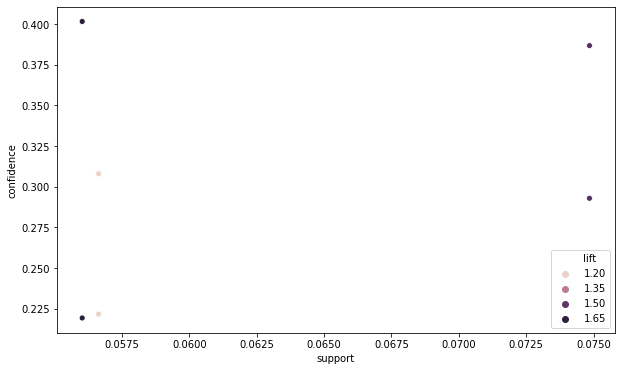

In [437]:
# ÏÑ±Îä•Î≥ÄÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rules['support'], y=rules['confidence'], hue=rules['lift'])
plt.show()

In [438]:
import networkx as nx

In [439]:
### Visualize network
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map = []
    colors = np.random.rand(rules_to_show)    
    strs = ["R"+str(i+1) for i in range(rules_to_show + 2)]
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight=2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

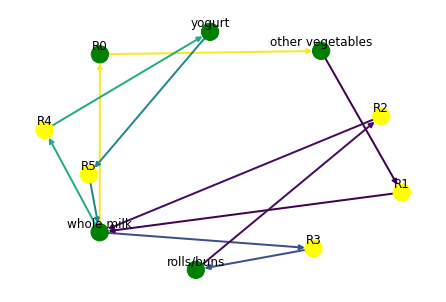

In [440]:
draw_graph(rules, 6)

## Time-Series Analysis
- ÏãúÍ∞ÑÏóê ÌùêÎ¶ÑÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
- ÎØ∏ÎûòÏùò Î≥ÄÌôîÏóê ÎåÄÌïú Ï∂îÏÑ∏ Î∂ÑÏÑù

### (1) Time-Series EDA
- Ï†ïÏÉÅÏÑ± ÌôïÏù∏
    - Ï†ïÏÉÅÏÑ± Ï†ïÏùò
        - ÌèâÍ∑†Ïù¥ ÏùºÏ†ï
        - Î∂ÑÏÇ∞Ïù¥ ÏãúÏ†êÍ≥º ÎèÖÎ¶Ω
        - Í≥µÎ∂ÑÏÇ∞ÏùÄ ÏãúÏ∞®ÏóêÎßå ÏùòÏ°¥
    - ACF Í∑∏ÎûòÌîÑ
    - ADF(Augmented Dickey Fuller), KPSS(Kwiatowski-Philips-Schmidt-Shin) test
    - Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥Î°ú Î≥ÄÌôò
        - Log/Box-cox Transformation(Î∂ÑÏÇ∞ Î≥ÄÎèôÌè≠ Ï†úÍ±∞), Differencing(Ï∂îÏÑ∏ÏôÄ Í≥ÑÏ†àÏÑ± Ï†úÍ±∞)
- ÏûêÍ∏∞ÏÉÅÍ¥Ä ÌôïÏù∏
    - ACF, PACF Í∑∏ÎûòÌîÑ
    - Ljung-box, Drubin-watson test
- Decomposition -> preprocessing Î∂ÄÎ∂Ñ Ï∞∏Í≥†

In [441]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

In [442]:
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
arima_data.head()

arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)
arima_data.head(3)

price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190

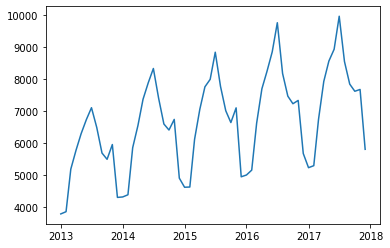

In [443]:
plt.plot(arima_data.index, arima_data['price'])
plt.show()

In [444]:
# Train, Test Îç∞Ïù¥ÌÑ∞ Íµ¨Î∂Ñ
training = arima_data[:"2016-12-01"]
test = arima_data.drop(training.index)

In [445]:
### Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï
# ADF test
# H0: Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ñÏßÄ ÏïäÎäîÎã§
# H1: Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ñÎäîÎã§
adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1])) # ÎπÑÏ†ïÏÉÅ ÏãúÍ≥ÑÏó¥

ADF Statistic: -1.9997199341327319
p-value : 0.6015863303794438


In [446]:
# KPSS test
# H0: Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏãúÍ≥ÑÏó¥Í≥º Ï∞®Ïù¥Í∞Ä ÏóÜÎã§ (Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥)
# H1 Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏãúÍ≥ÑÏó¥Í≥º Ï∞®Ïù¥Í∞Ä ÏûàÎã§
adf = kpss(training, regression='ct')
print('KPSS Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1])) # Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥Î°ú ÌåêÎã®ÎêòÎÇò, p-valueÍ∞Ä ÍΩ§ ÎÇÆÏùå

KPSS Statistic: 0.03220767562835514
p-value : 0.1


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [447]:
### ÏûêÍ∏∞ÏÉÅÍ¥Ä ÌôïÏù∏
# Ljung-box test
# H0: Îç∞Ïù¥ÌÑ∞Í∞Ä ÏùºÎ†®Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥ÏßÄ ÏïäÎäîÎã§ (ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§)
# H1: Îç∞Ïù¥ÌÑ∞Í∞Ä ÏùºÎ†®Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§
acorr_ljungbox(training, return_df=True, auto_lag=True).head(3) # ÏûêÍ∏∞ÏÉÅÍ¥Ä ÏûàÏùå

lb_stat     lb_pvalue
1  29.583761  5.355171e-08
2  40.293075  1.780205e-09
3  41.296580  5.657406e-09

In [448]:
# Durbin-Watson test
# ÌÜµÍ≥ÑÎüâÏù¥ 2Ïóê Í∞ÄÍπåÏö∞Î©¥ ÏûêÍ∏∞ÏÉÅÍ¥Ä ÏóÜÏùå
# ÌÜµÍ≥ÑÎüâÏù¥ 0 ÎòêÎäî 4Ïóê Í∞ÄÍπåÏö∞Î©¥ ÏûêÍ∏∞ÏÉÅÍ¥Ä ÏûàÏùå
durbin_watson(training)

array([0.0176216])

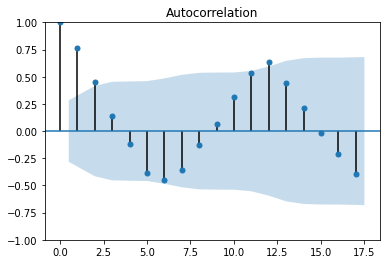

In [449]:
# ACF Í∑∏ÎûòÌîÑ ÌôïÏù∏
# ÏãúÏ∞®Ïóê Îî∞Îùº Í∞íÏù¥ Í∞íÏù¥ Îπ†Î•¥Í≤å Îñ®Ïñ¥ÏßÄÏßÄ ÏïäÏúºÎ©¥ ÎπÑÏ†ïÏÉÅ
# Í∑∏ÎûòÌîÑÏùò ÏûÑÍ≥ÑÏòÅÏó≠ÏùÑ Î≤óÏñ¥ÎÇòÎäî Í∞íÎì§Ïù¥ ÏûàÏúºÎØÄÎ°ú, ÏûêÍ∏∞ ÏÉÅÍ¥Ä ÏûàÏùå
plot_acf(training)
plt.show()

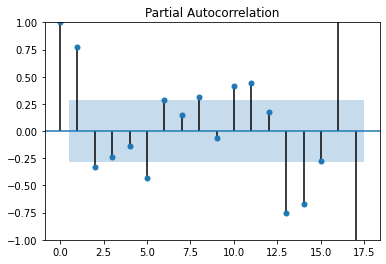

In [450]:
# PACF Í∑∏ÎûòÌîÑ ÌôïÏù∏
# PACF Í∑∏ÎûòÌîÑÏùò ÏûÑÍ≥ÑÏòÅÏó≠ÏùÑ Î≤óÏñ¥ÎÇòÎäî ÏãúÏ∞® 1, 2, 7 .. Îì±Ïù¥ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ ÏûàÏùå
plot_pacf(training)
plt.show()

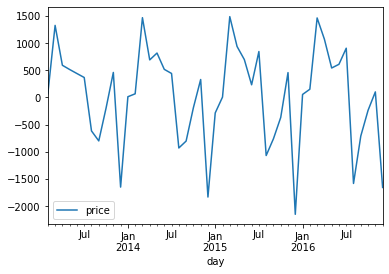

In [451]:
### Îç∞Ïù¥ÌÑ∞ Ï†ïÏÉÅÌôî
# Ï∞®Î∂Ñ Ïã§Ìñâ
diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

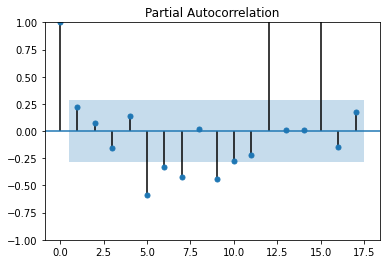

In [452]:
plot_pacf(diff_data) # AR(p)Ïùò Í∞í ÌôïÏù∏ Í∞ÄÎä•?
plt.show()

In [453]:
### J&J data
data = pd.read_csv('./data/jj.csv')
data.head()

date  data
0  1960-01-01  0.71
1  1960-04-01  0.63
2  1960-07-02  0.85
3  1960-10-01  0.44
4  1961-01-01  0.61

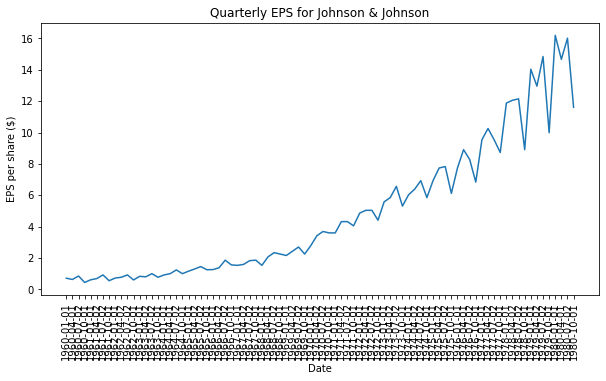

In [454]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
sns.lineplot(x=data['date'], y=data['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

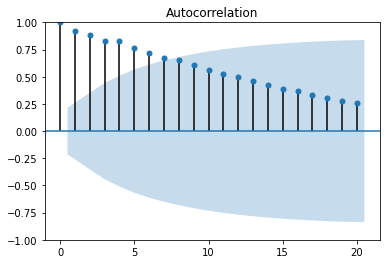

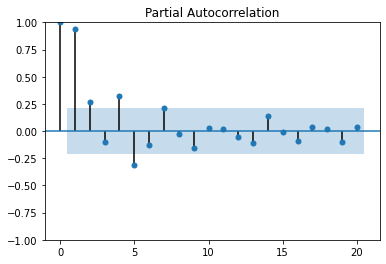

In [455]:
plot_acf(data['data']); # ÏûêÍ∏∞ÏÉÅÍ¥Ä ÏûàÏùå
plot_pacf(data['data']);

In [456]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}') 
print(f'p-value: {ad_fuller_result[1]}') # Ï†ïÏÉÅÏÑ± ÏóÜÏùå

ADF Statistic: 2.7420165734574726
p-value: 1.0


In [457]:
# Ljung-Box test
acorr_ljungbox(data['data'], return_df=True, auto_lag=True).head(3) # ÏûêÍ∏∞ÏÉÅÍ¥Ä ÏûàÏùå

lb_stat     lb_pvalue
1   74.486740  6.104694e-18
2  143.996707  5.389051e-32
3  205.858742  2.286448e-44

In [458]:
### Îç∞Ïù¥ÌÑ∞ Ï†ïÏÉÅÌôî
# Ï∞®Î∂Ñ, Î°úÍ∑∏Î≥ÄÌôò
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

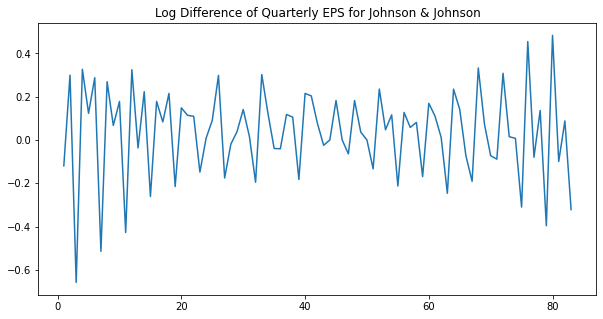

In [459]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
sns.lineplot(data=data['data'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [460]:
# Seasonal differencing
data['data'] = data['data'].diff(4)
data = data.drop([1, 2, 3, 4], axis=0).reset_index(drop=True)
data.head()

date      data
0  1961-04-02  0.242778
1  1961-07-02 -0.011834
2  1961-10-01  0.144006
3  1962-01-01 -0.057351
4  1962-04-02 -0.056093

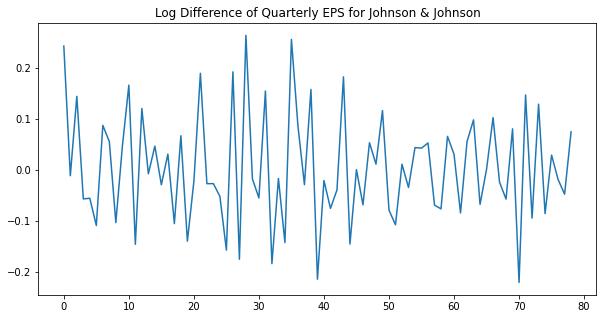

In [461]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [462]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.630805109914272
p-value: 5.721578695135916e-09


### (1) ARIMA
- AR(Autoregressive): ÌòÑ ÏãúÏ†êÏùò ÏûêÎ£åÍ∞Ä p ÏãúÏ†ê Ï†ÑÏùò Ïú†ÌïúÍ∞úÏùò Í≥ºÍ±∞ ÏûêÎ£åÎ°ú ÏÑ§Î™ÖÎê®. AR(p)
- MA(Moving Average): ÌòÑ ÏãúÏ†êÏùò ÏûêÎ£åÎ•º Î∞±ÏÉâÏû°ÏùåÏùò ÏÑ†ÌòïÍ≤∞Ìï®ÏúºÎ°ú ÌëúÌòÑÌïòÎ©∞, Ìï≠ÏÉÅ Ï†ïÏÉÅÏÑ±Ïù¥ ÎßåÏ°±Îê®. MA(q)
- AR Î™®ÌòïÏùÄ ACFÍ∞Ä Ïó∞ÏÜçÏ†ÅÏù∏ (Í∞êÏÜå) ÌòïÌÉú, PACFÍ∞Ä p+1 ÏãúÏ∞®ÏóêÏÑú Ï†àÎã®Îêú ÌòïÌÉú
- MA Î™®ÌòïÏùÄ PACFÍ∞Ä Ïó∞ÏÜçÏ†ÅÏù∏ ÌòïÌÉú, ACFÍ∞Ä p+1 ÏãúÏ∞®ÏóêÏÑú Ï†àÎã®Îêú ÌòïÌÉú
- IÎäî Ï∞®Î∂Ñ ÌöüÏàòÎ•º ÏùòÎØ∏Ìï®

In [463]:
from statsmodels.tsa.arima.model import ARIMA

In [464]:
model = ARIMA(training, order=(2, 1, 2))
res = model.fit()
res.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sun, 29 Oct 2023   AIC                            761.750
Time:                        23:07:33   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3164      0.189     -6.952      0.000      -1.688      -0.945
ar.L2         -0.3188      0.190     -1.677      0.094      -0.691       0.054
ma.L1          1.9698      0.242      8.129      0.000       1.495       2.445
ma.L2          0.9947      0.241      4.129      0.000       0.523       1.467
sigma2      4.441e+05   1.14e-06   3.91e+11      0.000    4.44e+05    4.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.82e+27. Standard errors may be unstable.
"""

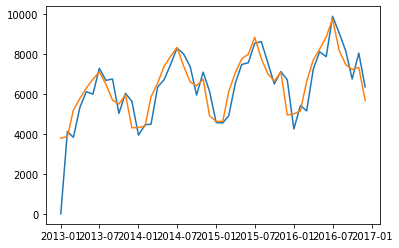

In [465]:
plt.plot(res.predict())
plt.plot(training)

In [466]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°úÎ∂ÄÌÑ∞ test Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ÎßåÌÅº ÏòàÏ∏°Ìï©ÎãàÎã§.
forecast_data = res.forecast(steps=len(test), alpha=0.05) 

pred_y = forecast_data
pred_y

2017-01-01    5830.379461
2017-02-01    5508.176679
2017-03-01    5883.751666
2017-04-01    5492.053875
2017-05-01    5887.961699
2017-06-01    5491.651433
2017-07-01    5887.149389
2017-08-01    5492.849059
2017-09-01    5885.831773
2017-10-01    5494.201798
2017-11-01    5884.471047
2017-12-01    5495.561841
Freq: MS, Name: predicted_mean, dtype: float64

In [467]:
test_y = test # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞
test_y

price
day              
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809

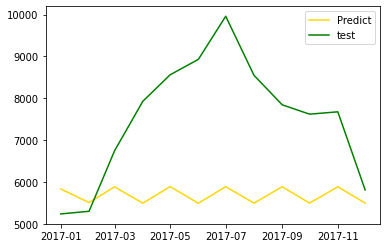

In [468]:
plt.plot(pred_y, color="gold", label='Predict') # Î™®Îç∏Ïù¥ ÏòàÏÉÅÌïú Í∞ÄÍ≤© Í∑∏ÎûòÌîÑ
plt.plot(test_y, color="green" , label='test') # Ïã§Ï†ú Í∞ÄÍ≤© Í∑∏ÎûòÌîÑ
plt.legend()
plt.show()

In [469]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [470]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

In [471]:
print("r2_score: ", r2_score(test_y, pred_y))
print("RMSE: ", mean_squared_error(test_y, pred_y, squared=False))
print("MAPE: ", MAPE(test_y, pred_y))

r2_score:  -1.6433699941173576
RMSE:  2302.404731847706
MAPE:  2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
price                 NaN
dtype: float64


In [472]:
# Parameter search
print('Examples of parameter combinations for ARIMA...')
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))
pdq

Examples of parameter combinations for ARIMA...


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [473]:
aic = list()
for i in pdq:
    model = ARIMA(training.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic, 2))

# Search optimal parameters
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

ARIMA: (0, 1, 0) >> AIC : 773.75
ARIMA: (0, 1, 1) >> AIC : 774.05
ARIMA: (0, 1, 2) >> AIC : 774.59
ARIMA: (1, 1, 0) >> AIC : 773.47
ARIMA: (1, 1, 1) >> AIC : 775.15
ARIMA: (1, 1, 2) >> AIC : 762.05
ARIMA: (2, 1, 0) >> AIC : 774.7
ARIMA: (2, 1, 1) >> AIC : 765.81
ARIMA: (2, 1, 2) >> AIC : 761.75


/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[((2, 1, 2), 761.75)]

In [474]:
# ÏúÑ ÏµúÏ†Å Í∞íÏúºÎ°ú ÎßåÎì† Î™®Îç∏ Îã§Ïãú Summary
# ÎèôÏùºÌïú Î™®Îç∏Ïù¥ ÏÑ†Ï†ïÎê®
model_opt = ARIMA(training.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sun, 29 Oct 2023   AIC                            761.750
Time:                        23:07:33   BIC                            771.001
Sample:                             0   HQIC                           765.231
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3164      0.189     -6.952      0.000      -1.688      -0.945
ar.L2         -0.3188      0.190     -1.677      0.094      -0.691       0.054
ma.L1          1.9698      0.242      8.129      0.000       1.495       2.445
ma.L2          0.9947      0.241      4.129      0.000       0.523       1.467
sigma2      4.441e+05   1.14e-06   3.91e+11      0.000    4.44e+05    4.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.82e+27. Standard errors may be unstable.
"""

### (2) SARIMA
- Seasonal ARIMA
- Ï¥ù 7Í∞úÏùò ÌååÎùºÎØ∏ÌÑ∞ Ï°¥Ïû¨. trendÏóê ÎåÄÌïú Î∂ÄÎ∂Ñ(p, d, q)Í≥º seasonalÏóê ÎåÄÌïú Î∂ÄÎ∂Ñ(P, D, Q, m)
    - trend ÌååÎùºÎØ∏ÌÑ∞Îäî ARIMAÏôÄ ÎèôÏùº
    - P: pacfÏóêÏÑú Í≥ÑÏ†àÏÑ±Ïù¥ Ï£ºÍ∏∞Í∞Ä Î™á Î≤à Î∞òÎ≥µ ÎêêÎäîÏßÄ ÌôïÏù∏
    - D: Í≥ÑÏ†àÏÑ±Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Í≥ÑÏ†àÏÑ± Ï∞®Î∂ÑÏùò ÌïÑÏöîÏÑ±Ïóê Îî∞Îùº 1 or 0
    - Q: acfÍ∏∞Ï§Ä Í≥ÑÏ†àÏÑ± Ï£ºÍ∏∞Í∞Ä Î™á Î≤à Î∞òÎ≥µ ÎêêÎäîÏßÄ ÌôïÏù∏
    - m: Í≥ÑÏ†àÏÑ± Ï£ºÍ∏∞
- Î™®Îç∏ Í≤ÄÏ¶ù
    - Ljung-Box(L1): ÏûîÏ∞®Í∞Ä white noiseÎ•º Îî∞Î•¥ÎäîÏßÄ ÌôïÏù∏
        - Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏûîÏ∞®Í∞Ä white noiseÎ•º Îî∞Î•∏Îã§
        - p-valueÍ∞Ä ÎÇÆÏúºÎ©¥ white noiseÎ•º Îî∞Î•¥ÏßÄ ÏïäÍ≥† ÏãúÍ∞ÑÎåÄ Î≥Ñ ÏûîÏ∞®Í∞Ä corrleated ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®
    - Jarque-Bera : ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± ÌåêÎã®
        - Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏûîÏ∞®Í∞Ä normal distributionÏùÑ Îî∞Î•∏Îã§
    - Heteroskedasticity: Í∞Å ÏãúÍ∞ÑÎåÄ Î≥Ñ ÏûîÏ∞®Ïùò Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïúÏßÄ ÌôïÏù∏
        - Í∑ÄÎ¨¥Í∞ÄÏÑ§: ÏûîÏ∞®Ïùò Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÎã§

In [475]:
# !pip install pmdarima
from pmdarima import auto_arima

In [476]:
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [477]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sun, 29 Oct 2023   AIC                            480.687
Time:                                     23:07:34   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [478]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°úÎ∂ÄÌÑ∞ test Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ÎßåÌÅº ÏòàÏ∏°
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)), index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y

predicted_price
day                        
2017-01-01      5609.436979
2017-02-01      5761.436979
2017-03-01      7225.436979
2017-04-01      8298.436979
2017-05-01      8841.436979
2017-06-01      9452.436979
2017-07-01     10359.436979
2017-08-01      8777.436979
2017-09-01      8068.436979
2017-10-01      7832.436979
2017-11-01      7935.436979
2017-12-01      6279.436979

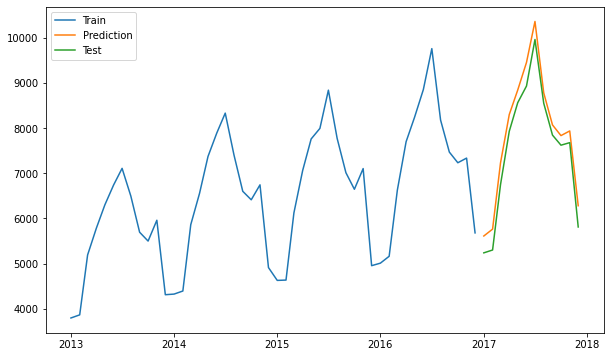

In [479]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train Îç∞Ïù¥ÌÑ∞ 
plt.plot(auto_pred_y, label="Prediction") # Î™®Îç∏Ïù¥ ÏòàÏÉÅÌïú Í∑∏ÎûòÌîÑ 
plt.plot(test, label="Test") # Ïã§Ï†ú Í∞ÄÍ≤© Í∑∏ÎûòÌîÑ 
plt.legend(loc='upper left')
plt.show()

In [480]:
print("r2_score: ", r2_score(test_y, auto_pred_y))
print("RMSE: ", mean_squared_error(test_y, auto_pred_y, squared=False))
print("MAPE: ", MAPE(test_y, auto_pred_y))

r2_score:  0.9305467058853065
RMSE:  373.2064282752658
MAPE:  predicted_price   NaN
price             NaN
dtype: float64


In [481]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [482]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    results = []
    
    for param in parameters_list:
        model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [483]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4

parameters = itertools.product(p, q, P, Q)
parameters_list = list(parameters)

In [ ]:
result_df = optimize_SARIMA(parameters_list, d, D, s, data['data'])

In [485]:
result_df[result_df.AIC==result_df.AIC.min()]

(p,q)x(P,Q)         AIC
0  (0, 2, 0, 2) -114.464416

In [486]:
best_model = SARIMAX(data['data'], order=(0, 2, 0), seasonal_order=(0, 2, 0, 2)).fit(dis=-1)
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              data   No. Observations:                   79
Model:             SARIMAX(0, 2, 0)x(0, 2, 0, 2)   Log Likelihood                 -61.375
Date:                           Sun, 29 Oct 2023   AIC                            124.750
Time:                                   23:08:26   BIC                            127.040
Sample:                                        0   HQIC                           125.662
                                            - 79                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3146      0.063      4.997      0.000       0.191       0.438
===================================================================================
Ljung-Box (L1) (Q):                  14.89   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.00   Prob(JB):                         0.46
Heteroskedasticity (H):               0.64   Skew:                             0.17
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

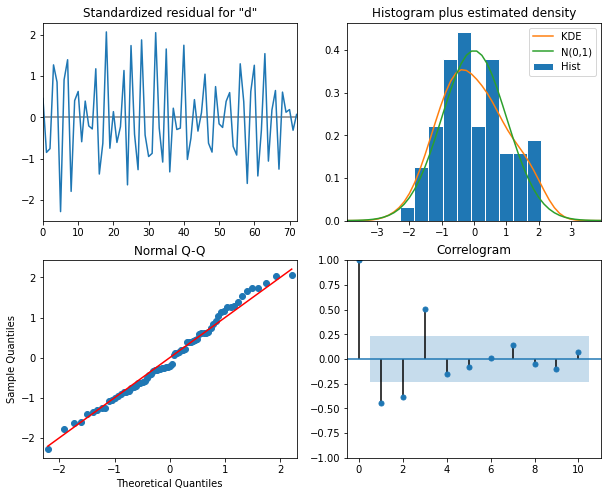

In [487]:
best_model.plot_diagnostics(figsize=(10, 8));

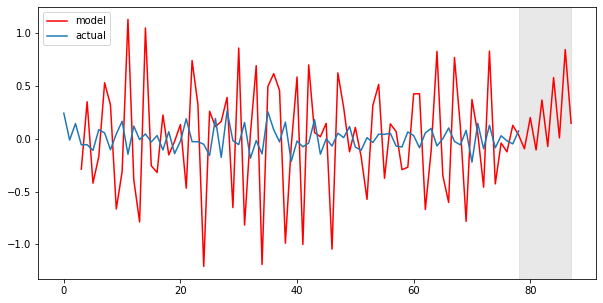

In [488]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:2 + 1] = np.NaN # Ï≤´ Ï£ºÍ∏∞ÍπåÏßÄ(Ïó¨Í∏∞ÏÑúÎäî 2)Îäî NaNÏúºÎ°ú Ï≤òÎ¶¨ÌïòÎäî ÎìØ

forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 8)
forecast = data['arima_model'].append(forecast)

plt.figure(figsize=(10, 5))
sns.lineplot(data=forecast, color='red', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
sns.lineplot(data=data['data'], label='actual')
plt.legend()
plt.show()

### (3) MARIMA
- Multi-variate ARIMA
- VAR (Vector AR)

In [489]:
air_quality = pd.read_excel('./data/AirQualityUCI.xlsx')
air_quality.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [490]:
air_quality['Date_Time'] = air_quality['Date'].astype(str) + ' ' + air_quality['Time'].astype(str)
air_quality['Date_Time'] = pd.to_datetime(air_quality.Date_Time , format = '%Y-%m-%d %H:%M:%S')
air_quality.index = air_quality.Date_Time
air_quality = air_quality.drop(['Date_Time', 'Date', 'Time'], axis=1)

In [491]:
air_quality = air_quality.dropna()
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [492]:
air_quality.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Date_Time                                                                      
2004-03-10 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25        51   6.518224         835.50   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Date_Time                                                           
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
2004-03-10 19:00:00    103.0       1173.75     92.0       1558.75   
2004-03-10 20:00:00    131.0       1140.00    114.0       1554.50   
2004-03-10 21:00:00    172.0       1092.00    122.0       1583.75   
2004-03-10 22:00:00    131.0       1205.00    116.0       1490.00   

                     PT08.S5(O3)      T         RH        AH  
Date_Time                                                     
2004-03-10 18:00:00      1267.50  13.60  48.875001  0.757754  
2004-03-10 19:00:00       972.25  13.30  47.700000  0.725487  
2004-03-10 20:00:00      1074.00  11.90  53.975000  0.750239  
2004-03-10 21:00:00      1203.25  11.00  60.000000  0.786713  
2004-03-10 22:00:00      1110.00  11.15  59.575001  0.788794

In [493]:
### Granger Ïù∏Í≥ºÍ≤ÄÏ†ï
# VAR ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ∏∞ Ï†ÑÏóê Ìï¥Îãπ Î≥ÄÏàòÎì§Ïù¥ Î™®Îëê ÏÉÅÌò∏Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÎäîÍ∞ÄÎ•º ÌôïÏù∏Ìï¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÎã§.
# Granger Ïù∏Í≥ºÍ≤ÄÏ†ïÏùò ÏòÅÍ∞ÄÏÑ§ÏùÄ XÍ∞Ä YÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäîÎã§ Ïù¥Îã§. Ï¶â, Í≤ÄÏ†ï Í≤∞Í≥º p_valueÍ∞Ä Ïú†ÏùòÏàòÏ§Ä 0.05 Ïù¥ÌïòÎùºÎ©¥ ÏòÅÍ∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† Ìï¥Îãπ Î≥ÄÏàòÎ•º ÏòàÏ∏°Î™®Îç∏Ïùò Ïù∏ÏûêÎ°ú ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïúÎã§.
df_pairs = pd.DataFrame(data=np.zeros((len(air_quality.columns), len(air_quality.columns))),
                        columns = ['X_'+ x for x in air_quality.columns],
                        index = ['Y_'+ x for x in air_quality.columns])

In [494]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
maxlag = 14
for col_i, col in enumerate(air_quality.columns):
    for idx_i, idx in enumerate(air_quality.columns):
        outs = grangercausalitytests(air_quality[[col,idx]], maxlag=maxlag)
        pval_min = np.min([round(outs[x][0]['ssr_chi2test'][1],2) for x in range(1, maxlag + 1)])
        df_pairs.iloc[idx_i, col_i] = pval_min

In [496]:
df_pairs

X_CO(GT)  X_PT08.S1(CO)  X_NMHC(GT)  X_C6H6(GT)  \
Y_CO(GT)             1.00            0.0        0.00         0.0   
Y_PT08.S1(CO)        0.00            1.0        0.00         0.0   
Y_NMHC(GT)           0.00            0.0        1.00         0.0   
Y_C6H6(GT)           0.00            0.0        0.01         1.0   
Y_PT08.S2(NMHC)      0.00            0.0        0.00         0.0   
Y_NOx(GT)            0.00            0.0        0.00         0.0   
Y_PT08.S3(NOx)       0.00            0.0        0.00         0.0   
Y_NO2(GT)            0.00            0.0        0.00         0.0   
Y_PT08.S4(NO2)       0.00            0.0        0.00         0.0   
Y_PT08.S5(O3)        0.00            0.0        0.00         0.0   
Y_T                  0.02            0.0        0.22         0.0   
Y_RH                 0.13            0.0        0.13         0.0   
Y_AH                 0.08            0.0        0.17         0.0   

                 X_PT08.S2(NMHC)  X_NOx(GT)  X_PT08.S3(NOx)  X_NO2(GT)  \
Y_CO(GT)                    0.00       0.00             0.0        0.0   
Y_PT08.S1(CO)               0.00       0.00             0.0        0.0   
Y_NMHC(GT)                  0.01       0.00             0.0        0.0   
Y_C6H6(GT)                  0.00       0.00             0.0        0.0   
Y_PT08.S2(NMHC)             1.00       0.00             0.0        0.0   
Y_NOx(GT)                   0.00       1.00             0.0        0.0   
Y_PT08.S3(NOx)              0.00       0.00             1.0        0.0   
Y_NO2(GT)                   0.00       0.00             0.0        1.0   
Y_PT08.S4(NO2)              0.00       0.00             0.0        0.0   
Y_PT08.S5(O3)               0.00       0.00             0.0        0.0   
Y_T                         0.00       0.00             0.0        0.0   
Y_RH                        0.00       0.00             0.0        0.0   
Y_AH                        0.00       0.08             0.0        0.1   

                 X_PT08.S4(NO2)  X_PT08.S5(O3)   X_T  X_RH  X_AH  
Y_CO(GT)                    0.0           0.00  0.00   0.0  0.11  
Y_PT08.S1(CO)               0.0           0.00  0.00   0.0  0.25  
Y_NMHC(GT)                  0.0           0.01  0.00   0.0  0.00  
Y_C6H6(GT)                  0.0           0.00  0.00   0.0  0.09  
Y_PT08.S2(NMHC)             0.0           0.00  0.00   0.0  0.13  
Y_NOx(GT)                   0.0           0.00  0.00   0.0  0.06  
Y_PT08.S3(NOx)              0.0           0.00  0.00   0.0  0.21  
Y_NO2(GT)                   0.0           0.00  0.00   0.0  0.21  
Y_PT08.S4(NO2)              1.0           0.00  0.01   0.0  0.44  
Y_PT08.S5(O3)               0.0           1.00  0.00   0.0  0.12  
Y_T                         0.0           0.00  1.00   0.0  0.09  
Y_RH                        0.0           0.00  0.00   1.0  0.10  
Y_AH                        0.0           0.00  0.00   0.0  1.00

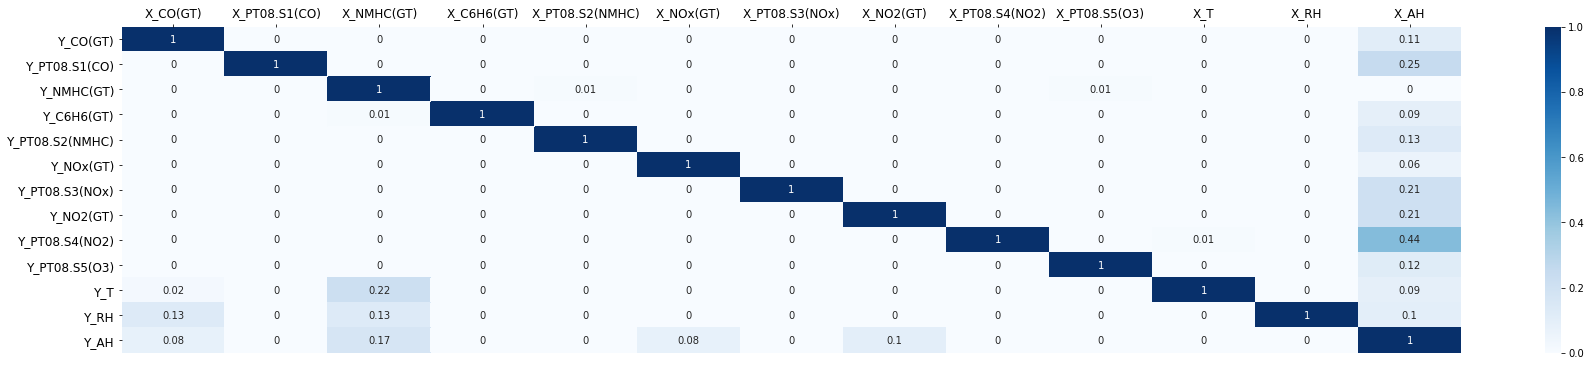

In [497]:
plt.figure(figsize=(30, 6))
ax = sns.heatmap(df_pairs, annot=True, cmap='Blues')
ax.xaxis.tick_top()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [498]:
# ÏÉÅÌò∏ ÏòÅÌñ•Ïù¥ ÏùºÎ∂Ä ÏóÜÎäî Î≥ÄÏàò Ï†úÍ±∞ -> AH, T, RH
air_quality = air_quality.drop(['AH', 'T', 'RH'], axis=1)

In [499]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [500]:
### Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï(ÌòπÏùÄ ÏöîÌïúÏä® Í≤ÄÏ†ï)ÏùÄ Îã§Ï§ë ÏãúÍ≥ÑÏó¥ Í∞Ñ Ï†ÅÎ∂ÑÏÉÅ Í∑†ÌòïÍ¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÍ∞ÄÎ•º ÌåêÎã®ÌïúÎã§.
# Ï¶â, Granger Í≤ÄÏ†ïÏù¥ Îã®Ïùº ÏãúÍ≥ÑÏó¥Î≥¥Îã§ Îã§Ï§ë ÏãúÍ≥ÑÏó¥Î°ú ÏÑ§Î™ÖÎ†•ÏùÑ Îçî ÏñªÏùÑÏàò ÏûàÎäîÍ∞Ä? Î•º ÌôïÏù∏Ìï¥Ï£ºÏóàÎã§Î©¥, 
# Cointegration Í≤ÄÏ†ïÏùÄ Îã§Ï§ë ÏãúÍ≥ÑÏó¥Ïù¥ Ïû•Í∏∞Ï†Å Í∏∞Í∞ÑÏùÑ ÎëêÍ≥† ÏïàÏ†ïÏ†ÅÏù∏ Ïó∞Í¥ÄÏÑ±ÏùÑ Î≥¥Ïù¥ÎäîÍ∞Ä? Î•º ÌôïÏù∏Ìï¥Ï§ÄÎã§.
def calc_sig_dist(cols):
    out = coint_johansen(air_quality[cols], 1, 1)
    stats = [round(x,2) for x in out.lr1]
    sigs = [round(x,2) for x in out.cvt[:, 1]]
    yns = [x>y for x,y in zip(stats,sigs)]
    dist = np.mean(np.array(stats) - np.array(sigs))
    
    print('stats: ',stats)
    print('sig-level: ',sigs)
    print('significant_yn: ',[x>y for x,y in zip(stats,sigs)])
    print('dist: ', round(dist,2))

In [501]:
calc_sig_dist(air_quality.columns)

stats:  [6270.43, 4851.05, 3769.61, 2837.98, 1950.93, 1366.9, 856.81, 548.68, 294.68, 122.83]
sig-level:  [259.03, 215.13, 175.16, 139.28, 107.34, 79.34, 55.25, 35.01, 18.4, 3.84]
significant_yn:  [True, True, True, True, True, True, True, True, True, True]
dist:  2178.21


In [502]:
target_lag = 30

df_train = air_quality.iloc[:-target_lag, :]
df_test = air_quality.iloc[-target_lag:, :]

print(df_train.shape, df_test.shape)

(9327, 10) (30, 10)


In [503]:
### Ï†ïÏÉÅÏÑ± ÌôïÏù∏
# Î™®Îì† Î≥ÄÏàòÍ∞Ä Ï†ïÏÉÅÏÑ± ÎßåÏ°±
for col in air_quality.columns:
    adf_sample = adfuller(df_train[col], autolag='AIC') # AICÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ lag(ÏãúÏ∞®)Î•º ÏûêÎèô ÏÑ†ÌÉù
    print(col, adf_sample)

CO(GT) (-9.541198717012888, 2.723730091309626e-16, 28, 9298, {'1%': -3.43105349604789, '5%': -2.8618509008205946, '10%': -2.566935487428262}, 91943.79062877542)
PT08.S1(CO) (-10.661045851202163, 4.406450662947555e-19, 36, 9290, {'1%': -3.431054102024705, '5%': -2.8618511685923385, '10%': -2.5669356299642776}, 115233.89909366149)
NMHC(GT) (-6.381669321613697, 2.2145261745632626e-08, 37, 9289, {'1%': -3.4310541778452177, '5%': -2.8618512020962417, '10%': -2.5669356477985454}, 95619.85423085194)
C6H6(GT) (-11.015559368025045, 6.169575429367305e-20, 25, 9301, {'1%': -3.4310532690754094, '5%': -2.8618508005249668, '10%': -2.5669354340404835}, 73997.24810777948)
PT08.S2(NMHC) (-10.527067029232294, 9.357807899766219e-19, 37, 9289, {'1%': -3.4310541778452177, '5%': -2.8618512020962417, '10%': -2.5669356477985454}, 117134.87743098623)
NOx(GT) (-7.7186466795971285, 1.2091274634059625e-11, 30, 9296, {'1%': -3.4310536474442865, '5%': -2.8618509677203163, '10%': -2.5669355230392616}, 111961.4859666

In [504]:
from statsmodels.tsa.api import VAR

In [505]:
# Ï≤´ Îç∞Ïù¥ÌÑ∞Î•º 0ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, Ï≤´ ÎÇ† ÎåÄÎπÑ Î≥ÄÌôîÎüâÏùÑ Î≥¥Ïó¨Ï£ºÎäî Ï†ïÍ∑úÌôî
df_train_norm = (df_train / df_train.iloc[0]) - 1
df_train_norm

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Date_Time                                                                       
2004-03-10 18:00:00  0.000000     0.000000  0.000000  0.000000       0.000000   
2004-03-10 19:00:00 -0.230769    -0.049816 -0.253333 -0.209108      -0.086801   
2004-03-10 20:00:00 -0.153846     0.030882 -0.413333 -0.242718      -0.101626   
2004-03-10 21:00:00 -0.153846     0.011397 -0.466667 -0.223278      -0.093018   
2004-03-10 22:00:00 -0.384615    -0.064522 -0.660000 -0.451408      -0.200861   
...                       ...          ...       ...       ...            ...   
2005-04-03 04:00:00 -0.807692    -0.375184 -2.333333 -0.832635      -0.442133   
2005-04-03 05:00:00 -0.884615    -0.404044 -2.333333 -0.919813      -0.527260   
2005-04-03 06:00:00 -0.846154    -0.376654 -2.333333 -0.887815      -0.492826   
2005-04-03 07:00:00 -0.769231    -0.351838 -2.333333 -0.855088      -0.461741   
2005-04-03 08:00:00 -0.730769    -0.312132 -2.333333 -0.800378      -0.415830   

                      NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
Date_Time                                                             
2004-03-10 18:00:00  0.000000      0.000000  0.000000      0.000000   
2004-03-10 19:00:00 -0.379518      0.111243 -0.185841     -0.078753   
2004-03-10 20:00:00 -0.210843      0.079290  0.008850     -0.081265   
2004-03-10 21:00:00  0.036145      0.033846  0.079646     -0.063978   
2004-03-10 22:00:00 -0.210843      0.140828  0.026549     -0.119385   
...                       ...           ...       ...           ...   
2005-04-03 04:00:00 -0.501807     -0.095621 -0.436283     -0.459663   
2005-04-03 05:00:00 -0.638554      0.058462 -0.590265     -0.484781   
2005-04-03 06:00:00 -0.550000      0.015148 -0.515044     -0.467346   
2005-04-03 07:00:00 -0.237349     -0.074320 -0.253097     -0.446956   
2005-04-03 08:00:00 -0.192771     -0.137751 -0.214159     -0.439273   

                     PT08.S5(O3)  
Date_Time                         
2004-03-10 18:00:00     0.000000  
2004-03-10 19:00:00    -0.232939  
2004-03-10 20:00:00    -0.152663  
2004-03-10 21:00:00    -0.050690  
2004-03-10 22:00:00    -0.124260  
...                          ...  
2005-04-03 04:00:00    -0.535108  
2005-04-03 05:00:00    -0.629389  
2005-04-03 06:00:00    -0.587377  
2005-04-03 07:00:00    -0.479487  
2005-04-03 08:00:00    -0.415582  

[9327 rows x 10 columns]

In [506]:
# AICÍ∞Ä 10 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Î≥¥ÌÜµ Î™®Îç∏ÎßÅ Í≤∞Í≥ºÍ∞Ä Ï¢ãÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú ÌåêÎã®Ìï®
var = VAR(df_train_norm)
var.select_order(maxlags=30).summary()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
model = var.fit(26)
model.summary()

In [508]:
model.resid.corr()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.048186  0.081251  0.032604       0.047160   
PT08.S1(CO)    0.048186     1.000000  0.156689  0.840820       0.938663   
NMHC(GT)       0.081251     0.156689  1.000000  0.043950       0.149014   
C6H6(GT)       0.032604     0.840820  0.043950  1.000000       0.763051   
PT08.S2(NMHC)  0.047160     0.938663  0.149014  0.763051       1.000000   
NOx(GT)        0.212156     0.343308  0.117977  0.103726       0.379361   
PT08.S3(NOx)  -0.023262    -0.032725 -0.114423  0.410100      -0.183702   
NO2(GT)        0.266068     0.152269  0.130405  0.046415       0.175823   
PT08.S4(NO2)   0.035551     0.947824  0.163198  0.808988       0.949612   
PT08.S5(O3)    0.046328     0.893718  0.147755  0.668918       0.903320   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
CO(GT)         0.212156     -0.023262  0.266068      0.035551     0.046328  
PT08.S1(CO)    0.343308     -0.032725  0.152269      0.947824     0.893718  
NMHC(GT)       0.117977     -0.114423  0.130405      0.163198     0.147755  
C6H6(GT)       0.103726      0.410100  0.046415      0.808988     0.668918  
PT08.S2(NMHC)  0.379361     -0.183702  0.175823      0.949612     0.903320  
NOx(GT)        1.000000     -0.302086  0.754268      0.323775     0.394075  
PT08.S3(NOx)  -0.302086      1.000000 -0.171382     -0.062444    -0.237575  
NO2(GT)        0.754268     -0.171382  1.000000      0.137777     0.204388  
PT08.S4(NO2)   0.323775     -0.062444  0.137777      1.000000     0.861668  
PT08.S5(O3)    0.394075     -0.237575  0.204388      0.861668     1.000000

In [509]:
from statsmodels.stats.stattools import durbin_watson

In [510]:
durbin_res = pd.DataFrame([model.resid.columns, [round(x, 2) for x in durbin_watson(model.resid)]]).T
durbin_res.set_index([0])

1
0                  
CO(GT)            2
PT08.S1(CO)       2
NMHC(GT)          2
C6H6(GT)          2
PT08.S2(NMHC)     2
NOx(GT)        2.01
PT08.S3(NOx)      2
NO2(GT)        2.01
PT08.S4(NO2)      2
PT08.S5(O3)    2.01

In [511]:
# modelÏùò lag
model.k_ar

26

In [512]:
ins = df_train_norm.values[-model.k_ar:] # train dataÏùò ÎßàÏßÄÎßâ 26Í∞ú

f = model.forecast(y=ins, steps=7)
df_f = pd.DataFrame(f, columns=df_train_norm.columns)

df_f_denom = (df_f +1).mul(df_train.iloc[0].to_numpy()) # Ïó≠Ï†ïÍ∑úÌôî. ÎßåÏïΩ Ï∞®Î∂ÑÏùÑ ÏßÑÌñâÌñàÏùÑ Í≤ΩÏö∞, Ï∞®Î∂Ñ Í≤∞Í≥ºÎèÑ ÏõêÎûò Í∞íÏúºÎ°ú ÎèåÎ†§Ï§òÏïº Ìï®
df_f_denom.index = df_test.index[:7]

df_f_denom

CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
Date_Time                                                          
2005-04-03 09:00:00  0.790922   980.163994 -189.856805  4.456266   
2005-04-03 10:00:00 -4.842594  1011.119754 -184.136858  6.132346   
2005-04-03 11:00:00 -1.658371  1018.032456 -181.903579  6.490988   
2005-04-03 12:00:00 -4.343543   999.296569 -180.407351  4.999279   
2005-04-03 13:00:00 -2.230294   992.511135 -179.264861  4.072201   
2005-04-03 14:00:00 -2.560825   996.546109 -178.171619  3.925700   
2005-04-03 15:00:00 -2.004831   989.947622 -183.747604  3.526707   

                     PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)    NO2(GT)  \
Date_Time                                                                 
2005-04-03 09:00:00     685.096777  146.179926    875.355128  85.012979   
2005-04-03 10:00:00     738.930692  169.147408    856.953761  88.634318   
2005-04-03 11:00:00     758.431230  187.296992    851.855466  93.829822   
2005-04-03 12:00:00     741.625478  190.797065    853.659934  94.288850   
2005-04-03 13:00:00     740.872152  193.948209    846.067443  98.672193   
2005-04-03 14:00:00     752.267591  185.909872    837.006544  94.890493   
2005-04-03 15:00:00     750.392467  182.010419    837.626352  96.915496   

                     PT08.S4(NO2)  PT08.S5(O3)  
Date_Time                                       
2005-04-03 09:00:00   1013.667117   777.308265  
2005-04-03 10:00:00   1048.168987   799.592220  
2005-04-03 11:00:00   1050.080061   794.476436  
2005-04-03 12:00:00   1016.701322   759.362404  
2005-04-03 13:00:00   1006.003043   738.989279  
2005-04-03 14:00:00   1014.275428   740.648207  
2005-04-03 15:00:00   1003.904757   734.446734

In [513]:
from sklearn.metrics import mean_squared_error

In [514]:
#check rmse
for i in air_quality.columns:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(df_f_denom[i], df_test.iloc[:7][i])))

rmse value for CO(GT) is :  4.029034237000921
rmse value for PT08.S1(CO) is :  43.376681458869854
rmse value for NMHC(GT) is :  17.87432570853698
rmse value for C6H6(GT) is :  1.3488230502510987
rmse value for PT08.S2(NMHC) is :  38.51733541838972
rmse value for NOx(GT) is :  44.849994690447005
rmse value for PT08.S3(NOx) is :  54.49048936852103
rmse value for NO2(GT) is :  21.51949701636663
rmse value for PT08.S4(NO2) is :  88.99462674286139
rmse value for PT08.S5(O3) is :  203.9728845586682


In [515]:
def draw_subplot(axes, ax_i, col):
    d_test = df_test[col].iloc[:7]
    d_pred = df_f_denom[col]
    
    d_test.diff() > 0
    
    axes[ax_i].plot(d_test, label='real')
    axes[ax_i].plot(d_pred, label='pred')
    
    hits = (d_test.diff() < 0) == (d_pred.diff() < 0)
    for i, hit in enumerate(hits):
        if hit:
            if i==0:
                pass
            if i+1==len(hits):
                i==None
            axes[ax_i].fill_between(x=d_test.index[i-1:i+1], 
                                    y1=d_pred[i-1:i+1],
                                    y2=d_test[i-1:i+1], 
                                    color='lightpink', 
                                    alpha=0.1)       
    axes[ax_i].set_title(col)
    axes[ax_i].legend(loc=(1, 1))

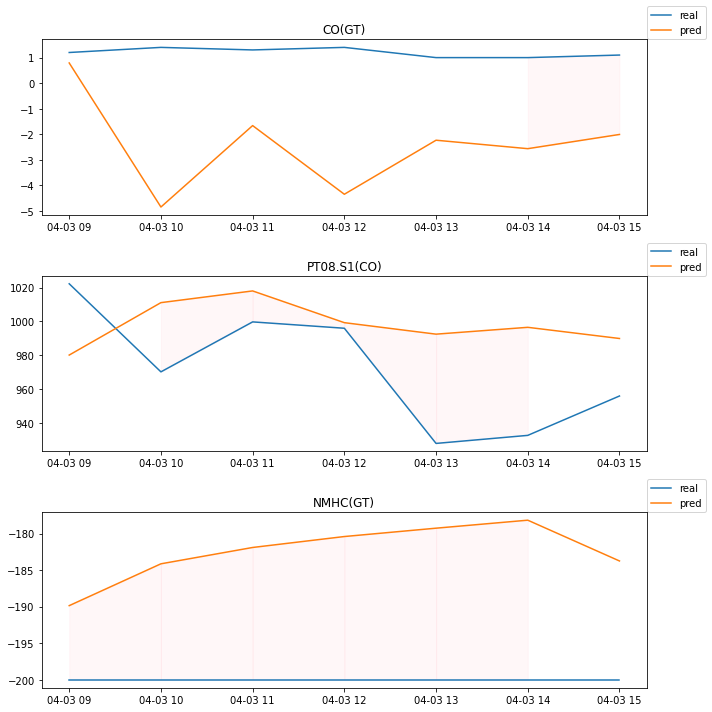

In [516]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

draw_subplot(axes, 0, 'CO(GT)')
draw_subplot(axes, 1, 'PT08.S1(CO)')
draw_subplot(axes, 2, 'NMHC(GT)')

plt.tight_layout()
plt.show()

### (4) Exponential Smoothing
- ÏßÅÍ¥ÄÏ†ÅÏù¥Ïñ¥ÏÑú Ïù¥Ìï¥ÌïòÍ∏∞ ÏâΩÍ≥† (ARIMA ÎåÄÎπÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú), Îòê ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÏùò Íµ¨ÏÑ±ÏöîÏÜåÍ∞Ä Î≥ÄÎèôÏù¥ ÎäêÎ¶¨Í±∞ÎÇò Îß§Ïö∞ Í∑úÏπôÏ†Å(periodic)Ïùº Îïå ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏùå
- ÏµúÍ∑º Í¥ÄÏ∏°Ìïú Í∞íÏóê ÎÜíÏùÄ Í∞ÄÏ§ëÏπòÎ•º Ï£ºÍ≥†, Î®º Í≥ºÍ±∞Ïùò Í¥ÄÏ∏°ÏπòÏóêÎäî ÎÇÆÏùÄ Í¥ÄÏ∏°ÏπòÎ•º Ï£ºÏñ¥ Í∞ÄÏ§ë ÌèâÍ∑†Í∞íÏùÑ Íµ¨Ìï®
    - Í∞ÄÏ§ëÏπòÎäî ÌòÑÏû¨Î°ú Î∂ÄÌÑ∞ Í≥ºÍ±∞Î°ú Í∞à ÏàòÎ°ù ÏßÄÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜå(exponential decay)ÏãúÏºúÏÑú Ï∞®Îì±Ï†ÅÏúºÎ°ú Ï£ºÎäî ÌèâÌôú Ìï®Ïàò(smoothing function) ÏÇ¨Ïö©
    - Ïó¨Îü¨Í∞úÏùò Í¥ÄÏ∏°ÏπòÎ•º Î™®ÏïÑÏÑú Í∞ÄÏ§ë ÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê "ÌèâÌôú(smoothing)"ÎêòÎäî Ìö®Í≥ºÍ∞Ä ÏûàÏùå

- Î™®Îç∏Ïùò Ï¢ÖÎ•ò
    - ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÏóê Ï∂îÏÑ∏(Trend)Í∞Ä ÏûàÎäîÏßÄ, Ï∂îÏÑ∏Í∞Ä ÏûàÎã§Î©¥ 1Ï∞® ÏÑ†ÌòïÏù∏ÏßÄ ÏïÑÎãàÎ©¥ ÎπÑÏÑ†Ìòï Ïù∏Í∞Ä? 
        - Ï∂îÏÑ∏ ÏóÜÏùå (No Trend)             --> Simple Exponential Smoothing
        - 1Ï∞® ÏÑ†Ìòï Ï∂îÏÑ∏ (Linear Trend)     --> Two Parameter Exponential Smoothing
        - 2Ï∞® ÎπÑÏÑ†Ìòï Ï∂îÏÑ∏ (Quadratic Trend) --> Three Parameter Smoothing
    - ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÏóê Í≥ÑÏ†àÏÑ±(Seasonality)Ïù¥ ÏûàÎäîÍ∞Ä? 
        - Í≥ÑÏ†àÏÑ± ÏóÜÏùå (No Seasonality)
        - Í≥ÑÏ†àÏÑ± ÏûàÏùå (with Seasonality)  --> Winters' Method
    - ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÏùò Í≥ÑÏ†àÏÑ±Ïù¥ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº Í≥†Ï†ï(fixed)ÎêòÏñ¥ ÏûàÎäîÏßÄ ÏïÑÎãàÎ©¥ ÌôïÏÇ∞(increasing)ÎêòÎäîÍ∞Ä? 
        - Í≥†Ï†ï(ÏÉÅÏàò) Í≥ÑÏ†à Î≥ÄÎèô (fixed seasonal variation) --> Additive Model
        - ÌôïÏÇ∞ Í≥ÑÏ†à Î≥ÄÎèô (increasing seasonal variation) --> Multiplicative Model

In [517]:
data = pd.read_csv('./data/jj.csv')
train, test = data.iloc[:75,:], data.iloc[75:,:]

In [518]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [519]:
# Simple Exponential Smoothing
model_1 = SimpleExpSmoothing(train['data'], initialization_method="estimated").fit()
pred_1 = model_1.predict(start=test['data'].index[0], end=test['data'].index[-1])
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                   data   No. Observations:                   75
Model:             SimpleExpSmoothing   SSE                             37.006
Optimized:                       True   AIC                            -48.980
Trend:                           None   BIC                            -44.345
Seasonal:                        None   AICC                           -48.409
Seasonal Periods:                None   Date:                 Sun, 29 Oct 2023
Box-Cox:                        False   Time:                         23:09:04
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6392432                alpha                 True
initial_level              0.6940527                  l.0                 True
------------------------------------------------------------------------------
"""

In [520]:
# Trend
model_2 = Holt(train['data'], initialization_method="estimated").fit()
pred_2 = model_2.predict(start=test.index[0], end=test.index[-1])
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                   data   No. Observations:                   75
Model:                           Holt   SSE                             26.162
Optimized:                       True   AIC                            -70.990
Trend:                       Additive   BIC                            -61.720
Seasonal:                        None   AICC                           -69.755
Seasonal Periods:                None   Date:                 Sun, 29 Oct 2023
Box-Cox:                        False   Time:                         23:09:05
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2673964                alpha                 True
smoothing_trend            0.2673964                 beta                 True
initial_level              0.6447661                  l.0                 True
initial_trend              0.0004073                  b.0                 True
------------------------------------------------------------------------------
"""

In [521]:
# Multiplicative damped trend
model_3 = Holt(train['data'], exponential=True, damped_trend=True, initialization_method="estimated").fit()
pred_3 = model_3.predict(start=test.index[0], end=test.index[-1])
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                   data   No. Observations:                   75
Model:                           Holt   SSE                             20.811
Optimized:                       True   AIC                            -86.152
Trend:                 Multiplicative   BIC                            -74.565
Seasonal:                        None   AICC                           -84.480
Seasonal Periods:                None   Date:                 Sun, 29 Oct 2023
Box-Cox:                        False   Time:                         23:09:05
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
smoothing_trend            3.545e-09                 beta                 True
initial_level              0.4037308                  l.0                 True
initial_trend              1.0572182                  b.0                 True
damping_trend              0.9938831                  phi                 True
------------------------------------------------------------------------------
"""

In [522]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [523]:
# additive model for fixed seasonal variation
model_4 = ExponentialSmoothing(train['data'], seasonal_periods=4, trend='add', seasonal='add').fit()
pred_4 = model_4.predict(start=test.index[0], end=test.index[-1])
model_4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                     data   No. Observations:                   75
Model:             ExponentialSmoothing   SSE                              8.157
Optimized:                         True   AIC                           -150.396
Trend:                         Additive   BIC                           -131.857
Seasonal:                      Additive   AICC                          -146.959
Seasonal Periods:                     4   Date:                 Sun, 29 Oct 2023
Box-Cox:                          False   Time:                         23:09:05
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4209202                alpha                 True
smoothing_trend               0.2303728                 beta                 True
smoothing_seasonal            0.5790798                gamma                 True
initial_level                 0.6740586                  l.0                 True
initial_trend                 0.0028868                  b.0                 True
initial_seasons.0             0.0330836                  s.0                 True
initial_seasons.1             0.0014013                  s.1                 True
initial_seasons.2             0.2170389                  s.2                 True
initial_seasons.3            -0.1937147                  s.3                 True
---------------------------------------------------------------------------------
"""

In [524]:
# multiplicative model for increasing seasonal variation
# ÏãúÍ∞ÑÏù¥ ÌùêÎ¶ÑÏóê Îî∞Îùº Î∂ÑÏÇ∞Ïù¥ Ï†êÏ†ê Ïª§ÏßÄÎäî Í≤ΩÏö∞
model_5 = ExponentialSmoothing(train['data'], seasonal='mul', seasonal_periods=4).fit()
pred_5 = model_5.predict(start=test.index[0], end=test.index[-1])
model_5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                     data   No. Observations:                   75
Model:             ExponentialSmoothing   SSE                             12.588
Optimized:                         True   AIC                           -121.856
Trend:                             None   BIC                           -107.952
Seasonal:                Multiplicative   AICC                          -119.675
Seasonal Periods:                     4   Date:                 Sun, 29 Oct 2023
Box-Cox:                          False   Time:                         23:09:05
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6440684                alpha                 True
smoothing_seasonal            0.3559316                gamma                 True
initial_level                 0.7223409                  l.0                 True
initial_seasons.0             0.9824570                  s.0                 True
initial_seasons.1             0.9908841                  s.1                 True
initial_seasons.2             1.3160924                  s.2                 True
initial_seasons.3             0.7429791                  s.3                 True
---------------------------------------------------------------------------------
"""

In [525]:
## forecasting for seasons
forecast_1 = model_1.forecast(9)
forecast_2 = model_2.forecast(9)
forecast_3 = model_3.forecast(9)
forecast_4 = model_4.forecast(9)
forecast_5 = model_5.forecast(9)

t_p = pd.DataFrame({'test': test['data'], 'f1': forecast_1, 'f2': forecast_2, 'f3': forecast_3, 'f4': forecast_4, 'f5': forecast_5})
t_p

test         f1         f2         f3         f4         f5
75   8.91  11.961016  12.283881  17.011425  11.006146  10.062659
76  14.04  11.961016  12.819286  17.679422  13.917321  12.782084
77  12.96  11.961016  13.354690  18.369321  14.162288  12.782200
78  14.85  11.961016  13.890094  19.081673  13.675764  11.782636
79   9.99  11.961016  14.425499  19.817037  12.901613  10.062659
80  16.20  11.961016  14.960903  20.575981  15.812788  12.782084
81  14.67  11.961016  15.496308  21.359079  16.057755  12.782200
82  16.02  11.961016  16.031712  22.166916  15.571231  11.782636
83  11.61  11.961016  16.567117  23.000084  14.797080  10.062659

In [526]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)
    

## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [527]:
T = train.shape[0]

eval_all_df = pd.DataFrame(
    {'SES': eval_all(test['data'], forecast_1, T, model_1), 
    "Trend": eval_all(test['data'], forecast_2, T, model_2), 
    'Multiplicative T': eval_all(test['data'], forecast_3, T, model_3), 
    'Addictive S': eval_all(test['data'], forecast_4, T, model_4), 
    'Multiplicative S': eval_all(test['data'], forecast_5, T, model_5)}, 
    index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2']
)
eval_all_df

SES      Trend  Multiplicative T  Addictive S  Multiplicative S
SSE     68.766127  60.415353        454.028518    28.145361         47.952044
MSE      7.640681   6.712817         50.447613     3.127262          5.328005
RMSE     2.764178   2.590910          7.102648     1.768407          2.308247
ME       1.288984  -1.175499         -6.645660    -0.961332          1.596465
MAE      2.482995   1.935436          6.645660     1.435309          1.868758
MPE      6.104896 -12.322940        -54.948402    -9.431815         10.118652
MAPE    18.770646  17.391230         54.948402    12.536836         13.155099
AIC     -2.508262  -8.218364        145.050392   -55.507916        -19.546502
SBC      2.126714   1.051588        156.637833   -34.650523         -3.324085
APC      0.967122   0.896303          6.918530     0.477618          0.770994
Adj_R2  -0.295382  -0.170133         -7.919309     0.413580          0.030285

In [528]:
from matplotlib.ticker import MultipleLocator

No handles with labels found to put in legend.


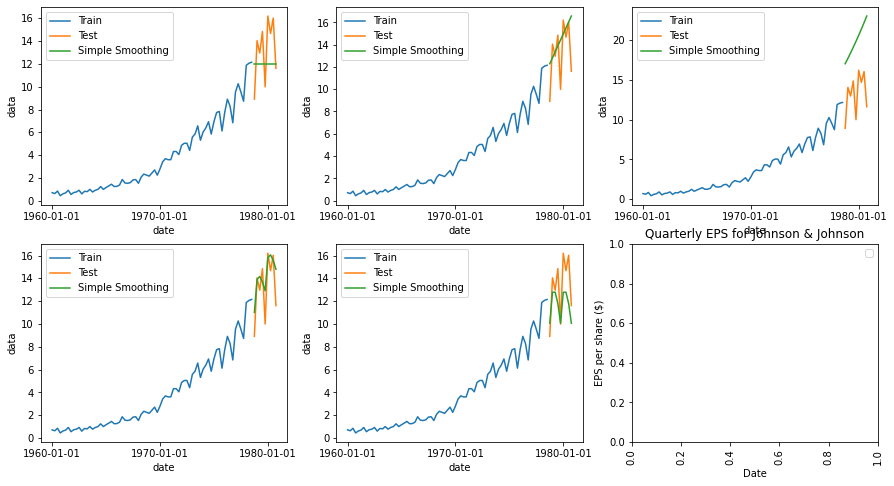

In [529]:
nrows = 2
ncols = 3
pred_idx = {1: pred_1, 2: pred_2, 3: pred_3, 4: pred_4, 5: pred_5}
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8))
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()

for i in range(5):
    row = i // 3
    col = i % 3
    sns.lineplot(x=train['date'], y=train['data'], label='Train', ax=axes[row][col])
    sns.lineplot(x=test['date'], y=test['data'], label='Test', ax=axes[row][col])
    axes[row][col].xaxis.set_major_locator(MultipleLocator(40))
    sns.lineplot(x=pred_idx[i + 1].index, y=pred_idx[i + 1], label='Simple Smoothing', ax=axes[row][col])

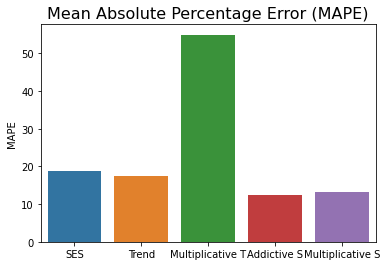

In [530]:
# horizontal bar chart
sns.barplot(x=eval_all_df.columns, y=eval_all_df.loc['MAPE', :])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()